# Analysis
Jeffrey Zhao

-------------

This notebook corresponds with Section 6: Analysis.

In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.max_columns = None
matplotlib.rcParams['figure.dpi']= 300

In [2]:
salaries = pd.concat([pd.read_csv(f"salaries/p_{yr}.csv") for yr in range(2018,2010,-1)])
salaries = salaries.groupby("name").first()
salaries.head()

title     salary  benefits
name                                                       
A. Tupling                   Professor  180567.92    519.72
A.Russell Tupling            Professor  166933.16    578.96
Abigail Scholer    Associate Professor  132597.73    373.00
Achim Kempf                  Professor  187834.44    395.88
Ada Barlatt        Assistant Professor  102159.48    359.08

In [3]:
evals = pd.read_csv("averages_enrol.csv")
evals[["term"]]=pd.Categorical(evals.term)
evals[["section"]]=pd.Categorical(evals.section)
evals["response_rate"] = evals.num_resp / evals.enrolled
evals.head()

term          ccode section      instructor       org  expl_lvl   q_treat  \
0  1131  ['ACTSC 231']       1     Anne Mackay  1.600000  2.873239  1.536232   
1  1131  ['ACTSC 231']      51  Carole Bernard  1.727273  2.909091  2.090909   
2  1131  ['ACTSC 232']       1    James Adcock  1.360825  2.804124  1.453608   
3  1131  ['ACTSC 331']       1       Rocky Cui  1.851064  2.744681  2.043478   
4  1131  ['ACTSC 371']       1  Brent Matheson  2.221053  2.821053  2.000000   

     visual      oral      help  interest   overall    attend    assign  \
0  1.591549  1.676056  1.526316  1.776119  1.647887  1.225352  1.588235   
1  1.700000  2.000000  1.444444  1.700000  1.818182  1.000000  1.300000   
2  1.567010  1.268041  2.000000  1.641304  1.391753  1.154639  1.604167   
3  1.978723  2.108696  1.515152  1.866667  1.936170  1.297872  1.500000   
4  2.452632  2.242105  2.565217  2.070588  2.333333  1.329787  1.741935   

      notes  textbook   new_mat  assign_amt   outside  num_resp  enrolled  \
0  1.358209  2.036364  2.782609    2.901639  2.279412        71       184   
1  1.625000  1.333333  2.545455    2.818182  2.000000        11        18   
2  1.516129  1.865169  2.659794    2.927835  2.000000        97       143   
3  1.586207  1.878049  2.659574    2.755556  2.021277        47        95   
4  1.909091  2.271429  2.851064    3.021277  1.903226        95       236   

   resp_rate  response_rate  
0   0.385870       0.385870  
1   0.611111       0.611111  
2   0.678322       0.678322  
3   0.494737       0.494737  
4   0.402542       0.402542

In [4]:
df = evals
df = df[evals.num_resp>10] # only surveys with >10 responses
df = df.groupby("instructor").filter(lambda x:len(x)>2) # only teachers with >=3 classes
df = pd.merge(df, salaries, how='left', left_on=["instructor"], right_on=['name'])
df = df.drop(['benefits',"section"], axis=1)
df.head()

term                       ccode      instructor       org  expl_lvl  \
0  1131               ['ACTSC 232']    James Adcock  1.360825  2.804124   
1  1131               ['ACTSC 371']  Brent Matheson  2.221053  2.821053   
2  1131               ['ACTSC 372']      Peter Wood  1.435644  2.623762   
3  1131  ['ACTSC 433', 'ACTSC 833']         Jun Cai  1.723077  2.859375   
4  1131  ['ACTSC 446', 'ACTSC 846']      Ruodo Wang  2.308411  2.557692   

    q_treat    visual      oral      help  interest   overall    attend  \
0  1.453608  1.567010  1.268041  2.000000  1.641304  1.391753  1.154639   
1  2.000000  2.452632  2.242105  2.565217  2.070588  2.333333  1.329787   
2  1.400000  1.574257  1.386139  1.712121  1.590000  1.455446  1.227723   
3  2.262295  1.923077  2.476923  2.352941  1.833333  1.984375  1.138462   
4  1.990566  2.644860  2.679245  2.000000  2.031250  2.262136  1.457944   

     assign     notes  textbook   new_mat  assign_amt   outside  num_resp  \
0  1.604167  1.516129  1.865169  2.659794    2.927835  2.000000        97   
1  1.741935  1.909091  2.271429  2.851064    3.021277  1.903226        95   
2  1.666667  1.785714  2.103896  2.762376    2.891089  1.930000       101   
3  1.415385  1.578947  2.166667  2.907692    2.707692  1.968750        65   
4  1.775701  1.819444  2.370968  2.538462    2.844660  2.038095       107   

   enrolled  resp_rate  response_rate                title     salary  
0       143   0.678322       0.678322             Lecturer  136295.28  
1       236   0.402542       0.402542             Lecturer  128478.60  
2       174   0.580460       0.580460             Lecturer  162561.88  
3       107   0.607477       0.607477            Professor  161277.18  
4       178   0.601124       0.601124  Associate Professor  141182.60

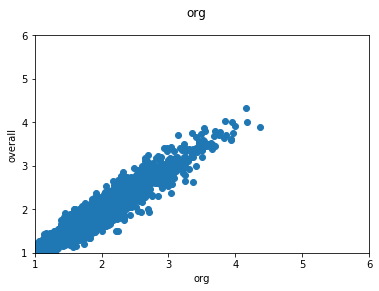

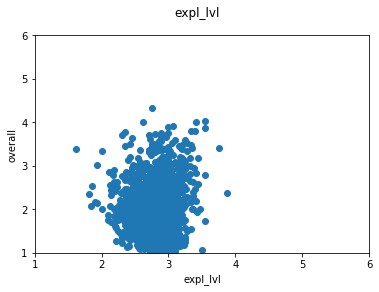

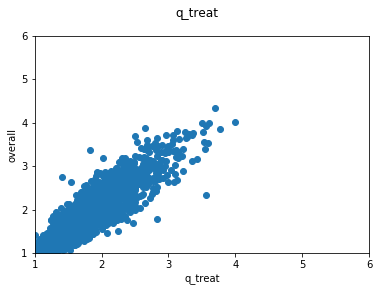

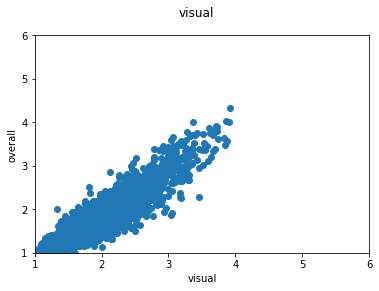

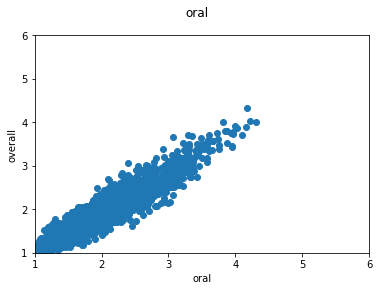

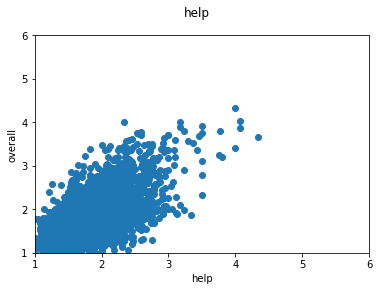

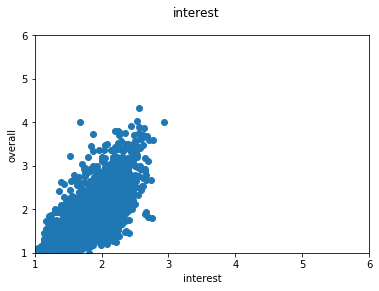

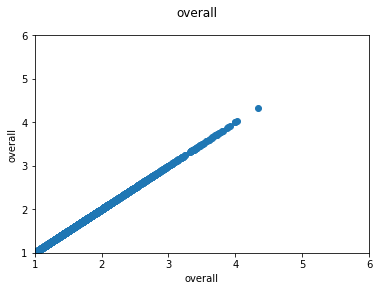

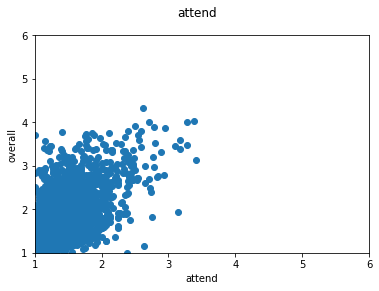

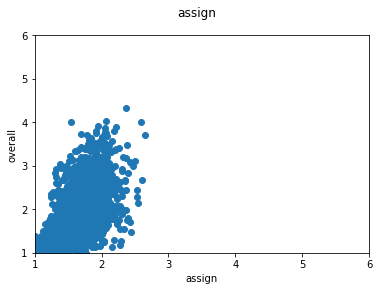

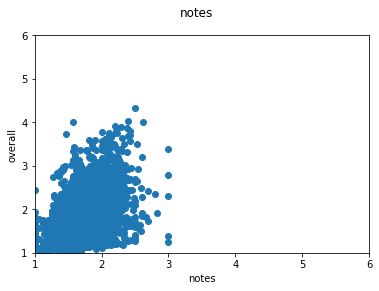

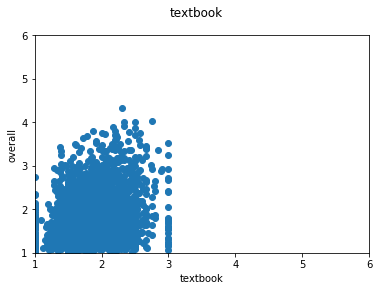

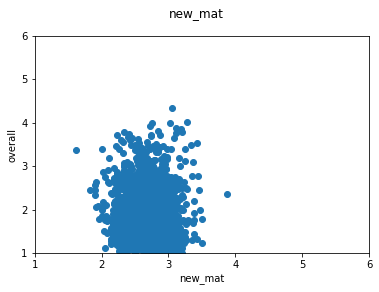

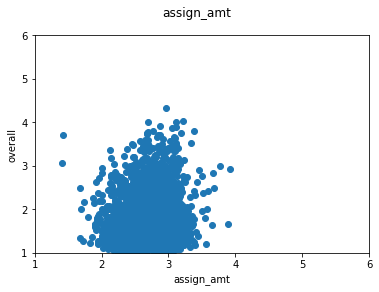

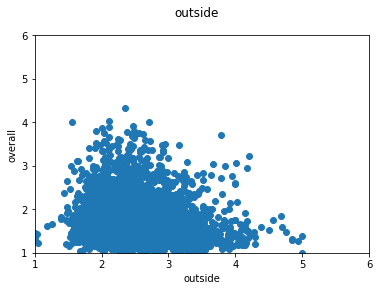

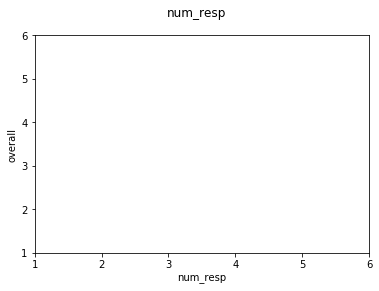

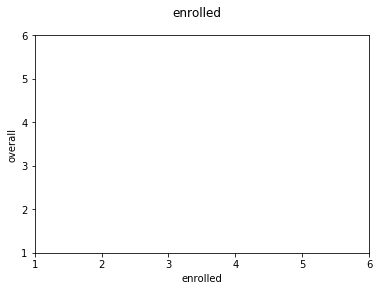

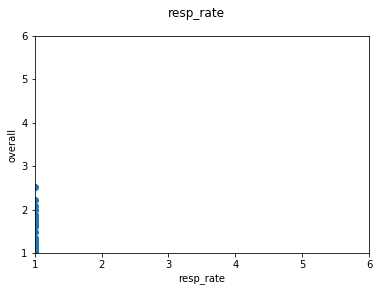

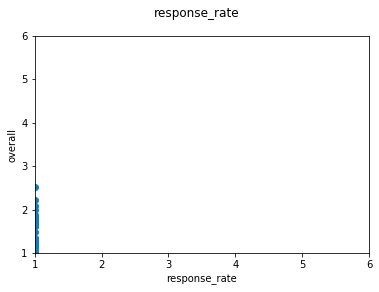

In [5]:
for col in df.columns[3:-2]:
    fig, ax = plt.subplots()
    ax.scatter(df[col], df['overall'])
    fig.suptitle(col)
    plt.xlabel(col)
    plt.ylabel("overall")
    # Note: bad for non-survey graphs
    plt.xlim(1, 6)
    plt.ylim(1, 6)

Students really care about oral, organization. Students care less about assign_amount, hours_outside.

Graph for latex:

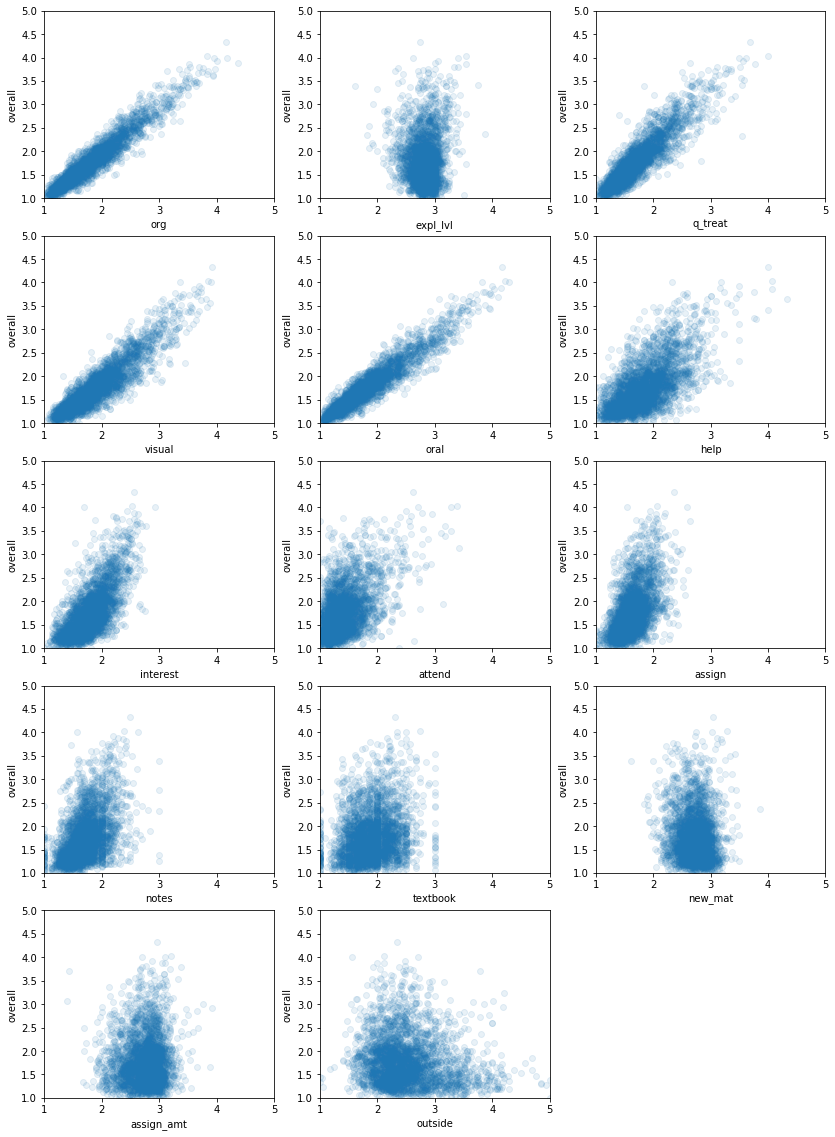

In [6]:
fig = plt.figure(figsize=(14, 20))
for i, col in enumerate(['org', 'expl_lvl', 'q_treat', 'visual', 'oral', 'help',
            'interest', 'attend', 'assign', 'notes', 'textbook',
            'new_mat', 'assign_amt', 'outside']):
    plt.subplot(5, 3, i+1)
    plt.scatter(df[col], df['overall'], alpha=0.1)
    plt.xlim(1, 5)
    plt.ylim(1, 5)
    plt.xlabel(col)
    plt.ylabel("overall")
plt.savefig("img/analysis-lattice.png")

Text(0, 0.5, 'overall')

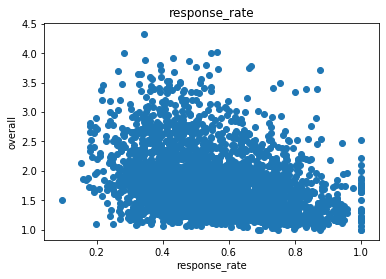

In [7]:
plt.scatter(df["response_rate"], df["overall"])
plt.title("response_rate")
plt.xlabel("response_rate")
plt.ylabel("overall")

Seems very little correlation in response rate and overall (disproves one of Peijun's questions)

# Average Course Metrics

In [8]:
# Remove courses with less than 10 recorded offerings
courses = df
courses = courses.groupby("ccode").filter(lambda x: len(x) >= 5)
courses = courses.groupby("ccode").mean()
courses.head()

org  expl_lvl   q_treat    visual      oral      help  \
ccode                                                                       
['ACTSC 221']  1.783567  2.971104  1.763304  2.065661  1.857502  1.829612   
['ACTSC 231']  1.884200  2.842654  1.907730  1.999128  1.965824  2.044250   
['ACTSC 232']  1.433347  2.815046  1.649639  1.569341  1.414704  2.069302   
['ACTSC 331']  1.725756  2.815170  1.973191  1.939091  2.090707  2.073972   
['ACTSC 371']  2.185535  2.838205  1.973223  2.354624  2.140812  2.067162   

               interest   overall    attend    assign     notes  textbook  \
ccode                                                                       
['ACTSC 221']  1.773712  1.773262  1.504529  1.547468  1.634819  1.665751   
['ACTSC 231']  1.896880  1.990628  1.589730  1.737295  1.651877  1.752846   
['ACTSC 232']  1.622572  1.496144  1.223817  1.562608  1.619603  1.907960   
['ACTSC 331']  1.835941  1.852819  1.245801  1.559469  1.551193  1.985983   
['ACTSC 371']  1.881763  2.159556  1.711760  1.812607  1.738235  1.960419   

                new_mat  assign_amt   outside   num_resp    enrolled  \
ccode                                                                  
['ACTSC 221']  2.938886    2.913864  1.969716  28.166667   84.250000   
['ACTSC 231']  2.680103    2.948863  2.175934  68.650000  168.850000   
['ACTSC 232']  2.678719    2.838079  2.271997  49.937500  107.125000   
['ACTSC 331']  2.744373    2.948365  2.144544  45.142857   78.285714   
['ACTSC 371']  2.756681    3.067520  2.042104  69.000000  159.130435   

               resp_rate  response_rate         salary  
ccode                                                   
['ACTSC 221']   0.339564       0.339564  125098.626667  
['ACTSC 231']   0.411397       0.411397  130314.781818  
['ACTSC 232']   0.456646       0.456646  133983.236250  
['ACTSC 331']   0.578400       0.578400  163741.270909  
['ACTSC 371']   0.428214       0.428214  124283.510476

Best 5 courses by overall score

In [9]:
courses.sort_values("overall")[["overall"]].head(5)

overall
ccode                         
['CO 485', 'CO 685']  1.233196
['CS 452', 'CS 652']  1.251795
['PMATH 348']         1.264713
['CS 444', 'CS 644']  1.288268
['MATH 147']          1.292071

In [10]:
courses.sort_values("overall", ascending=False)[["overall"]].head(5)

overall
ccode                 
['CS 348']    3.025190
['CS 247']    2.492612
['CS 245']    2.492039
['MATH 106']  2.456756
['COMM 421']  2.408181

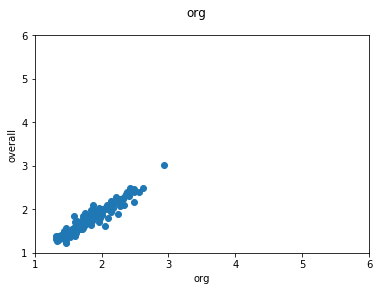

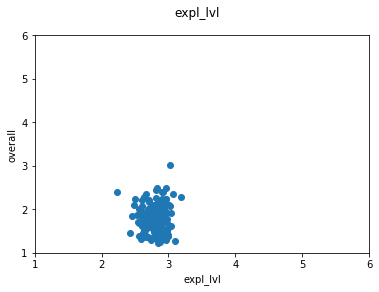

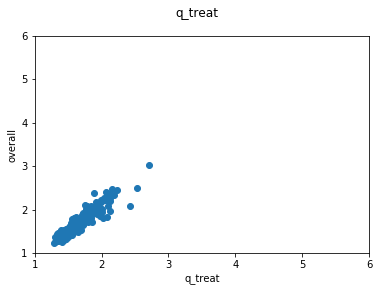

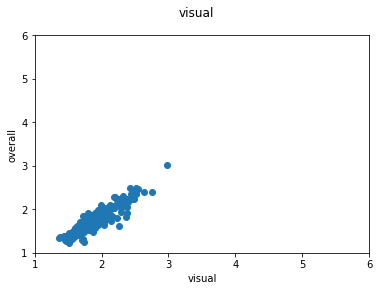

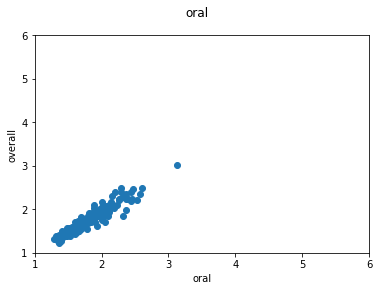

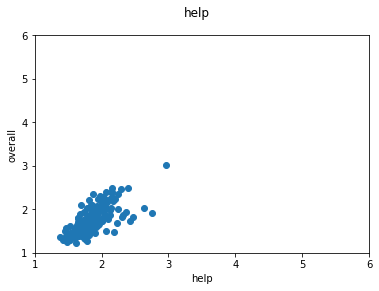

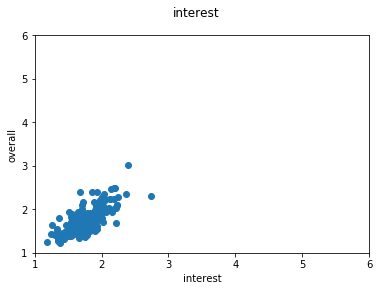

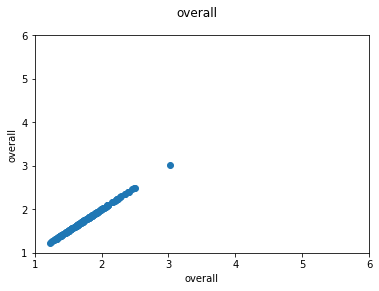

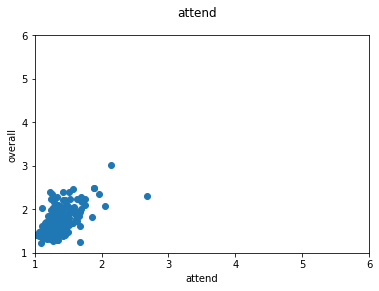

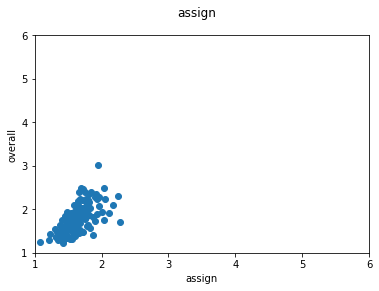

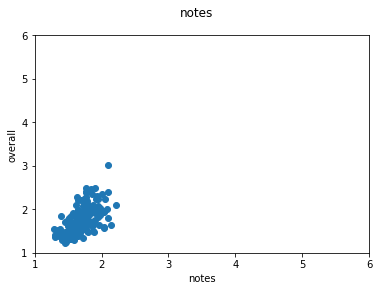

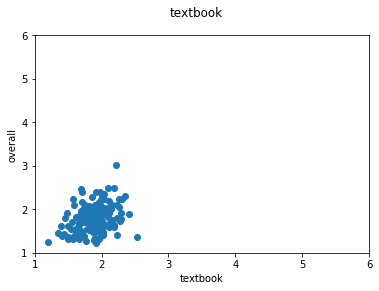

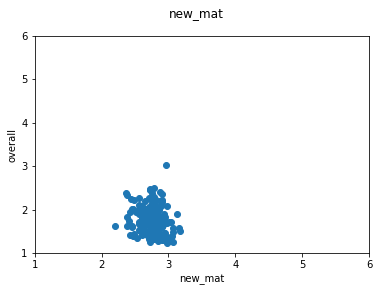

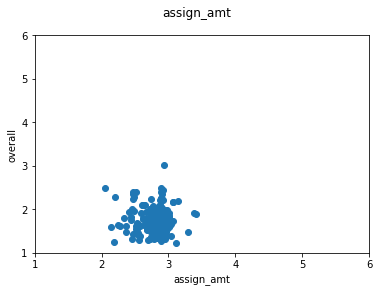

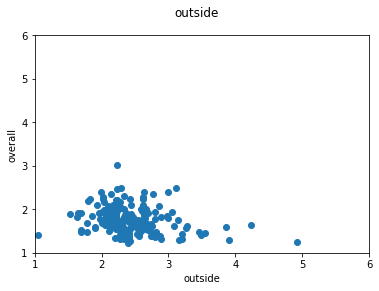

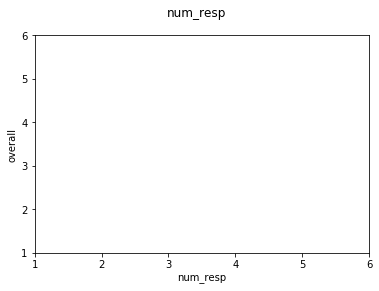

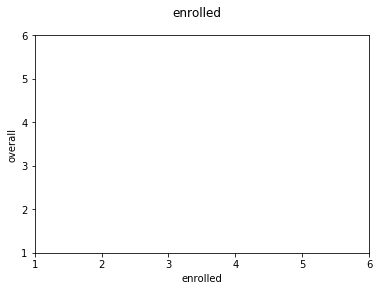

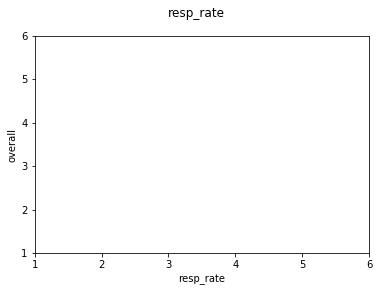

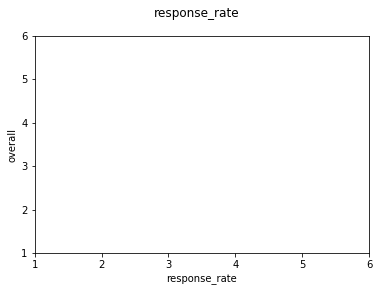

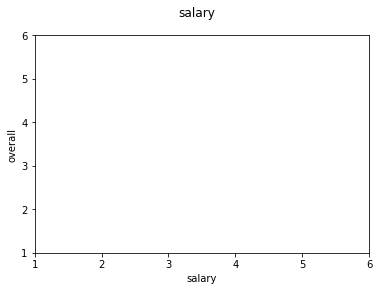

In [11]:
for col in courses.columns:
    fig, ax = plt.subplots()
    ax.scatter(courses[col], courses['overall'])
    fig.suptitle(col)
    plt.xlabel(col)
    plt.ylabel("overall")
    # Note: bad for non-survey graphs
    plt.xlim(1, 6)
    plt.ylim(1, 6)

In [12]:
# for dept in ['AMATH', 'ACTSC', 'CO', 'CS', 'MATH', 'PMATH', 'STAT']:
    

# Average Instructor Metrics

In [13]:
# TODO: Weighted mean?
# Remove instructors with less than three evals
instructors = df
instructors = instructors.groupby("instructor").filter(lambda x: len(x) >= 3)
instructors = instructors.groupby("instructor").mean()

# We lose title due to mean I think?
# Merge back most recent salary, title
instructors = instructors.drop("salary", axis=1)
instructors = instructors.join(salaries, how='left')
instructors = instructors.drop(["benefits"], axis=1)

instructors.head()

org  expl_lvl   q_treat    visual      oral  \
instructor                                                              
Adam Kolkiewicz      1.691446  2.429451  1.510890  1.950600  1.885041   
Adam Roegiest        1.862390  2.794451  1.832141  2.112739  1.795893   
Adriel Dean-Hall     2.314286  3.033968  2.013506  2.449048  2.227879   
Ahmad Alrefai        3.056345  3.086275  2.738697  3.266667  3.419231   
Ahmed Ayaz Ataullah  2.038713  2.891438  1.781366  2.207169  2.030823   

                         help  interest   overall    attend    assign  \
instructor                                                              
Adam Kolkiewicz      1.362193  1.635859  1.561237  1.243845  1.470170   
Adam Roegiest        2.033704  1.717994  1.856250  1.278992  1.531858   
Adriel Dean-Hall     2.418803  1.849768  2.234791  1.599206  1.598413   
Ahmad Alrefai        1.827778  1.891059  3.225774  1.857143  1.709017   
Ahmed Ayaz Ataullah  2.069040  2.168041  1.939435  1.687095  1.855265   

                        notes  textbook   new_mat  assign_amt   outside  \
instructor                                                                
Adam Kolkiewicz      1.471251  1.550505  2.583002    2.639731  2.495896   
Adam Roegiest        2.032509  2.391384  2.577641    2.122081  3.652393   
Adriel Dean-Hall     1.792929  2.055556  2.777233    2.349206  3.241270   
Ahmad Alrefai        2.039683  2.236467  2.333333    2.300389  3.327778   
Ahmed Ayaz Ataullah  1.856527  2.356944  2.887103    2.975629  1.891201   

                     num_resp   enrolled  resp_rate  response_rate  \
instructor                                                           
Adam Kolkiewicz         29.00  72.333333   0.446812       0.446812   
Adam Roegiest           51.75  90.500000   0.583992       0.583992   
Adriel Dean-Hall        25.00  69.333333   0.359124       0.359124   
Ahmad Alrefai           32.00  53.000000   0.558923       0.558923   
Ahmed Ayaz Ataullah     51.00  98.166667   0.525865       0.525865   

                                   title    salary  
instructor                                          
Adam Kolkiewicz      Associate Professor  175958.2  
Adam Roegiest                        NaN       NaN  
Adriel Dean-Hall                     NaN       NaN  
Ahmad Alrefai                        NaN       NaN  
Ahmed Ayaz Ataullah                  NaN       NaN

In [14]:
instructors.columns

Index(['org', 'expl_lvl', 'q_treat', 'visual', 'oral', 'help', 'interest',
       'overall', 'attend', 'assign', 'notes', 'textbook', 'new_mat',
       'assign_amt', 'outside', 'num_resp', 'enrolled', 'resp_rate',
       'response_rate', 'title', 'salary'],
      dtype='object')

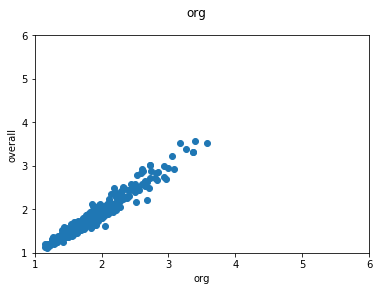

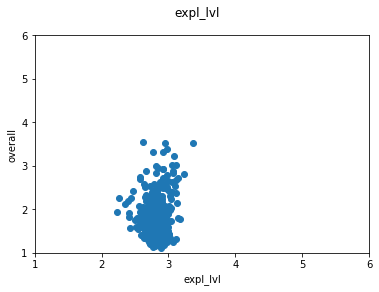

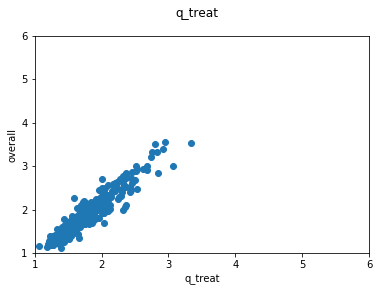

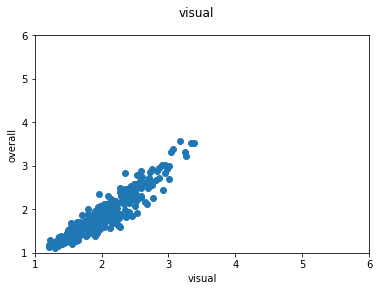

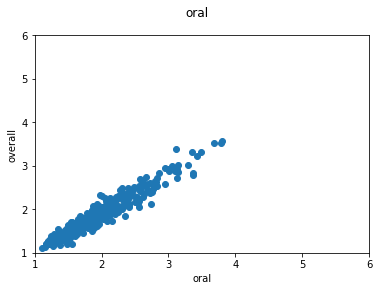

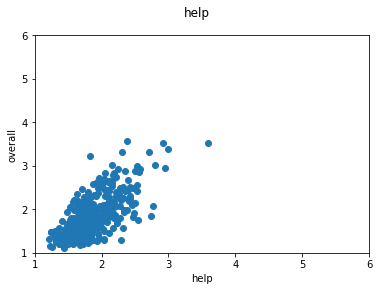

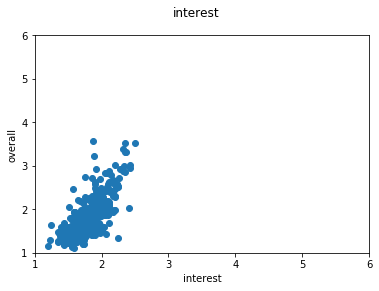

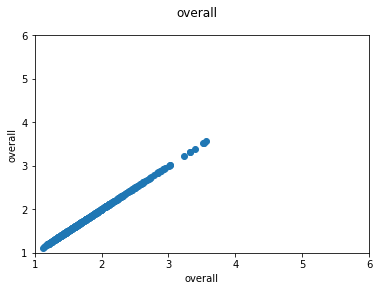

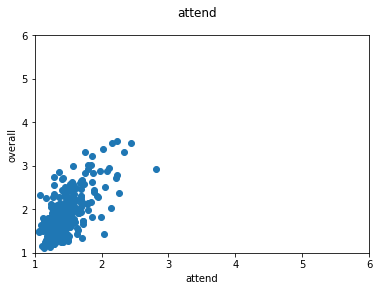

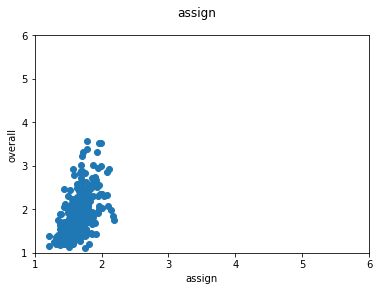

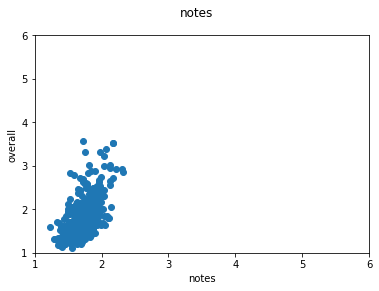

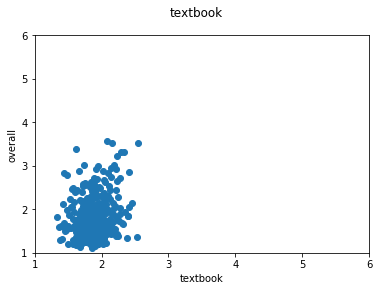

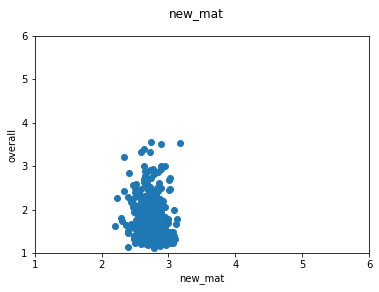

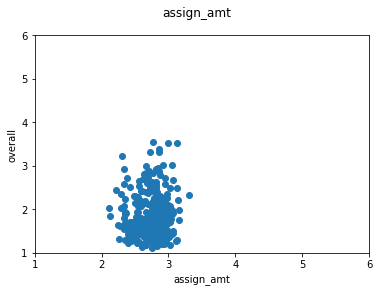

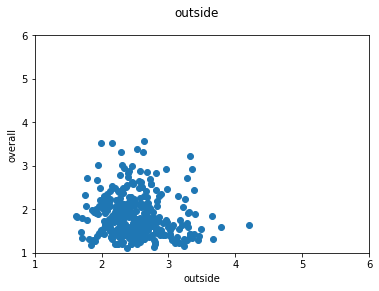

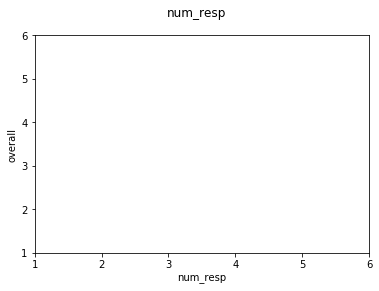

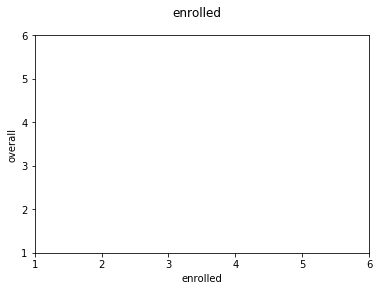

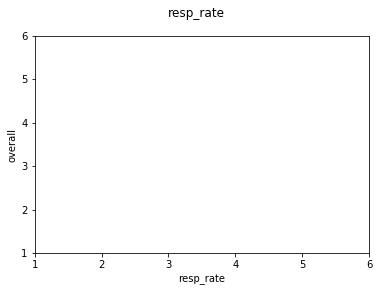

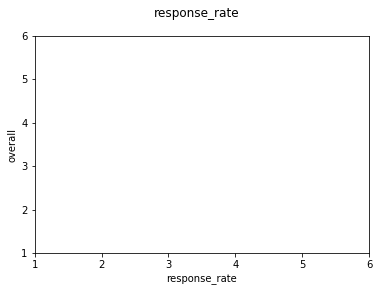

In [15]:
for col in instructors.columns[:-2]:
    fig, ax = plt.subplots()
    ax.scatter(instructors[col], instructors['overall'])
    fig.suptitle(col)
    plt.xlabel(col)
    plt.ylabel("overall")
    # Note: bad for non-survey graphs
    plt.xlim(1, 6)
    plt.ylim(1, 6)

# How correlated are oral and overall?

In [16]:
corr = df
corr = corr.groupby("ccode").filter(lambda x: len(x) >= 5)
print(len(courses), " courses considered")
corr = corr.groupby("ccode").corr()
corr.head(25)

163  courses considered


org  expl_lvl   q_treat    visual      oral  \
ccode                                                                           
['ACTSC 221'] org            1.000000  0.195325  0.802095  0.973325  0.910124   
              expl_lvl       0.195325  1.000000 -0.240277  0.230161  0.020218   
              q_treat        0.802095 -0.240277  1.000000  0.742036  0.846914   
              visual         0.973325  0.230161  0.742036  1.000000  0.901096   
              oral           0.910124  0.020218  0.846914  0.901096  1.000000   
              help           0.600388 -0.471500  0.843536  0.483454  0.631275   
              interest       0.734226 -0.111138  0.880835  0.722376  0.836186   
              overall        0.950472 -0.011162  0.927879  0.908096  0.922244   
              attend         0.055265  0.732112 -0.399817  0.003001 -0.221819   
              assign         0.815350 -0.238757  0.845160  0.796948  0.868270   
              notes          0.713085  0.247212  0.328581  0.698162  0.590590   
              textbook       0.185964 -0.643215  0.560233  0.097866  0.342646   
              new_mat       -0.480554  0.590681 -0.510741 -0.504793 -0.556222   
              assign_amt    -0.404861  0.468994 -0.521924 -0.412254 -0.653724   
              outside        0.527059 -0.059315  0.485326  0.615777  0.683837   
              num_resp      -0.085078 -0.252027 -0.161251 -0.216240 -0.229497   
              enrolled      -0.035630 -0.208147 -0.260005  0.040664  0.036720   
              resp_rate     -0.096268 -0.248641 -0.037888 -0.254413 -0.244810   
              response_rate -0.096268 -0.248641 -0.037888 -0.254413 -0.244810   
              salary         0.729340  0.331100  0.655669  0.754331  0.598403   
['ACTSC 231'] org            1.000000  0.293883  0.857336  0.749211  0.746988   
              expl_lvl       0.293883  1.000000  0.287562  0.169686  0.356879   
              q_treat        0.857336  0.287562  1.000000  0.693889  0.879122   
              visual         0.749211  0.169686  0.693889  1.000000  0.476518   
              oral           0.746988  0.356879  0.879122  0.476518  1.000000   

                                 help  interest   overall    attend    assign  \
ccode                                                                           
['ACTSC 221'] org            0.600388  0.734226  0.950472  0.055265  0.815350   
              expl_lvl      -0.471500 -0.111138 -0.011162  0.732112 -0.238757   
              q_treat        0.843536  0.880835  0.927879 -0.399817  0.845160   
              visual         0.483454  0.722376  0.908096  0.003001  0.796948   
              oral           0.631275  0.836186  0.922244 -0.221819  0.868270   
              help           1.000000  0.604024  0.761134 -0.322463  0.692123   
              interest       0.604024  1.000000  0.821305 -0.464991  0.888961   
              overall        0.761134  0.821305  1.000000 -0.147259  0.847914   
              attend        -0.322463 -0.464991 -0.147259  1.000000 -0.381573   
              assign         0.692123  0.888961  0.847914 -0.381573  1.000000   
              notes          0.263659  0.313061  0.585687  0.428085  0.499901   
              textbook       0.731962  0.414501  0.373741 -0.626934  0.403142   
              new_mat       -0.545864 -0.363706 -0.514743  0.469415 -0.610361   
              assign_amt    -0.553152 -0.379776 -0.498110  0.463943 -0.478050   
              outside        0.235355  0.386966  0.529028 -0.333220  0.425689   
              num_resp       0.048587 -0.255997 -0.116104  0.274835 -0.006763   
              enrolled      -0.235004 -0.286938 -0.171635 -0.047370 -0.018998   
              resp_rate      0.175291 -0.128478 -0.053202  0.213327  0.021584   
              response_rate  0.175291 -0.128478 -0.053202  0.213327  0.021584   
              salary         0.340769  0.727720  0.705029  0.005593  0.635901   
['ACTSC 231'] org            0.654628  0.468158  0.922190  0.488

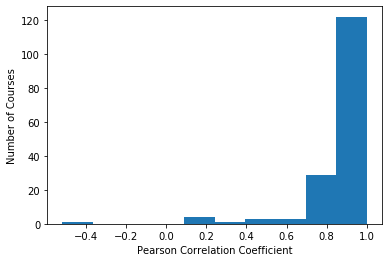

In [17]:
oral_overall_corr = corr.loc[(slice(None), 'oral'), ["overall"]]

plt.hist(oral_overall_corr["overall"])
plt.xlabel("Pearson Correlation Coefficient")
plt.ylabel("Number of Courses")
# plt.title("Correlation between Oral and Overall")

plt.savefig("img/analysis-oral_overall_corr.png")
plt.show()

In [45]:
oral_overall_corr.sort_values("overall").head(10)

overall
ccode                                  
['PMATH 348']            oral -0.515373
['SE 212']               oral  0.130992
['AMATH 271']            oral  0.184033
['MATH 145']             oral  0.215719
['CS 444', 'CS 644']     oral  0.219694
['PMATH 351']            oral  0.356860
['STAT 331', 'SYDE 334'] oral  0.481262
['STAT 334']             oral  0.492169
['PMATH 340']            oral  0.521441
['CS 200']               oral  0.577036

Only one negative correlation! Majority over 0.7.
Thus there is no course for which oral does not matter in overall (one of Peijun's suggestions).

Look at some low correlation:

In [44]:
# Only course with negative correlation
df[df.ccode == "['PMATH 348']"][["term", "ccode", "instructor", "org", "oral", "overall", "title"]]

term          ccode      instructor       org      oral   overall  \
625   1141  ['PMATH 348']    Ross Willard  1.206897  1.172414  1.206897   
1150  1151  ['PMATH 348']  Frank Zorzitto  1.625000  1.187500  1.375000   
1730  1161  ['PMATH 348']       Yu-Ru Liu  1.291667  1.708333  1.208333   
2346  1171  ['PMATH 348']    Blake Madill  1.472222  1.361111  1.333333   
2937  1181  ['PMATH 348']       Yu-Ru Liu  1.114286  1.542857  1.200000   

          title  
625   Professor  
1150  Professor  
1730  Professor  
2346        NaN  
2937  Professor

In [20]:
# Same instructor?
df[df.ccode == "['SE 212']"]

term       ccode instructor       org  expl_lvl   q_treat    visual  \
481   1139  ['SE 212']  Nancy Day  1.593750  2.365079  1.468750  1.718750   
771   1149  ['SE 212']  Nancy Day  1.200000  2.675000  1.400000  1.700000   
1304  1159  ['SE 212']  Nancy Day  1.444444  2.666667  1.185185  1.592593   
1305  1159  ['SE 212']  Nancy Day  1.440000  2.680000  1.600000  1.800000   
1898  1169  ['SE 212']  Nancy Day  1.285714  2.853659  1.261905  1.500000   
1899  1169  ['SE 212']  Nancy Day  1.394737  2.736842  1.368421  1.461538   
2773  1179  ['SE 212']  Nancy Day  1.272727  2.722222  1.272727  1.472727   
2774  1179  ['SE 212']  Nancy Day  1.476190  2.619048  1.190476  1.428571   

          oral      help  interest   overall    attend    assign     notes  \
481   1.451613  1.562500  1.983871  1.640625  1.343750  1.515625  1.714286   
771   1.350000  1.586207  1.775000  1.275000  1.325000  1.307692  1.500000   
1304  1.407407  1.800000  1.703704  1.230769  1.333333  1.296296  1.560000   
1305  1.400000  1.916667  1.720000  1.360000  1.400000  1.400000  1.631579   
1898  1.404762  1.925926  1.595238  1.285714  1.238095  1.404762  1.629630   
1899  1.289474  1.500000  1.842105  1.461538  1.358974  1.447368  1.642857   
2773  1.345455  1.387097  1.636364  1.272727  1.436364  1.127273  1.500000   
2774  1.238095  1.100000  1.761905  1.380952  1.047619  1.100000  1.333333   

      textbook   new_mat  assign_amt   outside  num_resp  enrolled  resp_rate  \
481   2.578947  2.174603    2.593750  2.213115        64       130   0.492308   
771   2.263158  2.450000    2.850000  2.150000        40        71   0.563380   
1304  2.625000  2.555556    2.814815  2.333333        27        55   0.490909   
1305  2.461538  2.520000    2.720000  2.440000        25        70   0.357143   
1898  2.666667  2.690476    2.785714  2.261905        42        62   0.677419   
1899  2.500000  2.564103    2.897436  2.102564        39        59   0.661017   
2773  2.558824  2.759259    2.854545  2.345455        55        85   0.647059   
2774  2.533333  2.571429    2.857143  2.238095        21        48   0.437500   

      response_rate title  salary  
481        0.492308   NaN     NaN  
771        0.563380   NaN     NaN  
1304       0.490909   NaN     NaN  
1305       0.357143   NaN     NaN  
1898       0.677419   NaN     NaN  
1899       0.661017   NaN     NaN  
2773       0.647059   NaN     NaN  
2774       0.437500   NaN     NaN

In [21]:
# Same instructor?
df[df.ccode == "['AMATH 271']"]

term          ccode      instructor       org  expl_lvl   q_treat  \
293   1139  ['AMATH 271']   Michael Waite  1.263158  2.842105  1.105263   
775   1149  ['AMATH 271']   Michael Waite  1.125000  2.733333  1.500000   
1334  1159  ['AMATH 271']   Michael Waite  1.363636  2.809524  1.681818   
1922  1169  ['AMATH 271']  Francis Poulin  1.523810  2.952381  1.428571   
2528  1179  ['AMATH 271']   Michael Waite  1.333333  2.933333  1.466667   

        visual      oral   help  interest   overall    attend    assign  \
293   1.526316  1.210526  1.500  1.631579  1.263158  1.052632  1.578947   
775   1.266667  1.312500  1.625  1.466667  1.250000  1.062500  1.750000   
1334  1.454545  1.272727  1.600  1.454545  1.409091  1.227273  1.772727   
1922  1.666667  1.523810  1.250  1.285714  1.333333  1.380952  1.333333   
2528  1.533333  1.333333  1.200  1.333333  1.333333  1.400000  1.200000   

         notes  textbook   new_mat  assign_amt   outside  num_resp  enrolled  \
293   1.500000  1.526316  3.111111    2.789474  2.157895        19        25   
775   1.000000  1.437500  2.937500    2.937500  2.125000        16        19   
1334  1.800000  1.636364  2.863636    2.590909  2.272727        22        33   
1922  1.000000  1.300000  2.904762    2.842105  2.666667        21        31   
2528  2.333333  1.600000  2.800000    2.466667  2.466667        15        21   

      resp_rate  response_rate                title     salary  
293    0.760000       0.760000  Associate Professor  137951.12  
775    0.842105       0.842105  Associate Professor  137951.12  
1334   0.666667       0.666667  Associate Professor  137951.12  
1922   0.677419       0.677419            Professor  164428.12  
2528   0.714286       0.714286  Associate Professor  137951.12

In [22]:
# DJao bad at oral but still liked
# Have taken with Snew
df[df.ccode == "['MATH 145']"]

term         ccode   instructor       org  expl_lvl   q_treat    visual  \
421   1139  ['MATH 145']    David Jao  1.913043  2.391304  1.478261  1.804348   
931   1149  ['MATH 145']    David Jao  2.000000  2.313725  1.490196  1.784314   
1508  1159  ['MATH 145']  Stephen New  1.386364  2.837209  1.454545  1.818182   
2085  1169  ['MATH 145']  Stephen New  1.355932  2.305085  1.220339  1.440678   
2105  1169  ['MATH 145']  Stephen New  1.526316  2.222222  1.526316  1.555556   
2626  1179  ['MATH 145']  Stephen New  1.509804  2.326923  1.250000  1.519231   
2627  1179  ['MATH 145']  Stephen New  1.666667  2.610169  1.385965  1.800000   

          oral      help  interest   overall    attend    assign     notes  \
421   1.466667  1.615385  1.234043  1.531915  1.085106  1.276596  1.617647   
931   1.480000  1.750000  1.200000  1.490196  1.392157  1.352941  1.756757   
1508  1.454545  1.424242  1.454545  1.431818  1.386364  1.302326  1.454545   
2085  1.271186  1.627451  1.241379  1.237288  1.135593  1.288136  1.255319   
2105  1.315789  1.555556  1.368421  1.578947  1.294118  1.666667  1.294118   
2626  1.423077  1.255319  1.403846  1.461538  1.260000  1.307692  1.282609   
2627  1.593220  1.200000  1.366667  1.400000  1.457627  1.288136  1.150943   

      textbook   new_mat  assign_amt   outside  num_resp  enrolled  resp_rate  \
421   2.000000  2.422222    2.304348  4.085106        47        65   0.723077   
931   1.578947  2.183673    2.100000  4.180000        51        56   0.910714   
1508  1.894737  2.863636    2.795455  3.093023        44        82   0.536585   
2085  1.500000  2.508475    2.627119  3.152542        59        96   0.614583   
2105  1.666667  2.526316    2.578947  3.263158        19        33   0.575758   
2626  1.692308  2.461538    2.692308  3.470588        52        76   0.684211   
2627  1.600000  2.474576    2.666667  3.534483        60        85   0.705882   

      response_rate      title     salary  
421        0.723077  Professor  141649.48  
931        0.910714  Professor  141649.48  
1508       0.536585   Lecturer  134661.60  
2085       0.614583   Lecturer  134661.60  
2105       0.575758   Lecturer  134661.60  
2626       0.684211   Lecturer  134661.60  
2627       0.705882   Lecturer  134661.60

In [23]:
# Lhotak bad at oral but still liked, also not a lot of focus on lectures
# Have taken a course with Lhotak
df[df.ccode == "['CS 444', 'CS 644']"]

term                 ccode     instructor       org  expl_lvl   q_treat  \
560   1141  ['CS 444', 'CS 644']  Ondrej Lhotak  1.230769  2.962963  1.444444   
1079  1151  ['CS 444', 'CS 644']   Brad Lushman  1.297297  3.000000  1.457143   
1678  1161  ['CS 444', 'CS 644']  Ondrej Lhotak  1.333333  2.958333  1.130435   
2255  1171  ['CS 444', 'CS 644']  Ondrej Lhotak  1.466667  2.966667  1.333333   
2854  1181  ['CS 444', 'CS 644']   Nomair Naeem  1.407407  2.888889  1.360000   

        visual      oral      help  interest   overall    attend    assign  \
560   2.037037  1.444444  1.500000  1.555556  1.370370  1.481481  1.296296   
1079  1.621622  1.270270  1.666667  1.459459  1.378378  1.378378  1.162162   
1678  1.652174  1.291667  1.000000  1.208333  1.166667  1.083333  1.260870   
2255  1.733333  1.466667  1.647059  1.500000  1.266667  1.482759  1.206897   
2854  1.500000  1.259259  1.333333  1.259259  1.259259  1.259259  1.185185   

         notes  textbook   new_mat  assign_amt   outside  num_resp  enrolled  \
560   1.750000  2.111111  2.884615    2.518519  4.296296        27        48   
1079  2.000000  2.400000  2.945946    2.750000  3.513514        37        51   
1678  1.666667  1.333333  3.043478    2.583333  3.958333        24        45   
2255  1.500000  1.857143  3.137931    2.586207  3.700000        30        52   
2854  1.000000  1.750000  3.192308    2.346154  4.037037        27        36   

      resp_rate  response_rate                title     salary  
560    0.562500       0.562500  Associate Professor  130109.99  
1079   0.725490       0.725490             Lecturer  138060.60  
1678   0.533333       0.533333  Associate Professor  130109.99  
2255   0.576923       0.576923  Associate Professor  130109.99  
2854   0.750000       0.750000             Lecturer  121400.04

In [24]:
df[df.ccode == "['PMATH 351']"]

term          ccode           instructor       org  expl_lvl   q_treat  \
446   1139  ['PMATH 351']       Alexandru Nica  1.081081  3.162162  1.486486   
750   1145  ['PMATH 351']      Laurent Marcoux  1.263158  2.210526  1.263158   
1283  1155  ['PMATH 351']  Mahmood Alaghmandan  1.555556  2.705882  1.722222   
1308  1159  ['PMATH 351']       Alexandru Nica  1.250000  2.975000  1.525000   
1882  1165  ['PMATH 351']       Alexandru Nica  1.125000  3.166667  1.478261   
2126  1169  ['PMATH 351']      Laurent Marcoux  1.526316  3.000000  1.705882   
2500  1175  ['PMATH 351']       Alexandru Nica  1.068182  3.113636  1.317073   
2764  1179  ['PMATH 351']          Nico Spronk  1.739130  2.478261  1.428571   
3096  1185  ['PMATH 351']         Kathryn Hare  1.312500  2.500000  1.551724   

        visual      oral      help  interest   overall    attend    assign  \
446   1.270270  1.444444  1.875000  1.485714  1.277778  1.135135  1.405405   
750   1.315789  1.368421  1.533333  1.368421  1.263158  1.315789  1.444444   
1283  1.666667  1.611111  1.692308  1.833333  1.722222  1.277778  1.588235   
1308  1.425000  1.512821  1.904762  1.487179  1.175000  1.225000  1.410256   
1882  1.250000  1.375000  1.866667  1.291667  1.166667  1.416667  1.250000   
2126  1.526316  1.368421  2.333333  1.600000  1.684211  1.736842  1.650000   
2500  1.340909  1.386364  1.882353  1.318182  1.136364  1.136364  1.272727   
2764  1.772727  1.565217  1.368421  1.590909  1.608696  1.260870  1.434783   
3096  1.562500  1.218750  1.600000  1.612903  1.406250  1.406250  1.343750   

         notes  textbook   new_mat  assign_amt   outside  num_resp  enrolled  \
446   1.162162  1.400000  3.081081    3.000000  2.405405        37        51   
750   1.333333  2.000000  2.421053    2.055556  3.210526        19        27   
1283  1.000000  2.000000  2.764706    2.833333  2.687500        18        26   
1308  1.189189  1.250000  3.076923    2.675000  2.550000        40        48   
1882  1.208333  1.181818  3.125000    2.916667  2.583333        24        31   
2126  1.125000  2.000000  2.500000    2.200000  3.263158        20        36   
2500  1.116279  1.266667  3.045455    2.930233  2.441860        44        51   
2764  1.600000  1.250000  2.272727    2.217391  3.363636        23        52   
3096  2.500000  2.000000  2.437500    2.375000  3.343750        32        73   

      resp_rate  response_rate      title     salary  
446    0.725490       0.725490  Professor  176320.48  
750    0.703704       0.703704  Professor  185672.32  
1283   0.692308       0.692308        NaN        NaN  
1308   0.833333       0.833333  Professor  176320.48  
1882   0.774194       0.774194  Professor  176320.48  
2126   0.555556       0.555556  Professor  185672.32  
2500   0.862745       0.862745  Professor  176320.48  
2764   0.442308       0.442308  Professor  158685.40  
3096   0.438356       0.438356  Professor  210100.82

# Outlier Instructors

In [25]:
instructor_corr = df
instructor_corr = instructor_corr.groupby("instructor").filter(lambda x: len(x) >= 5)
print(len(instructors), " instructors considered")
instructor_corr = instructor_corr.groupby("instructor").corr()
instructor_corr.head(25)

352  instructors considered


org  expl_lvl   q_treat    visual  \
instructor                                                                  
Ahmed Ayaz Ataullah org            1.000000 -0.108807  0.742042  0.256045   
                    expl_lvl      -0.108807  1.000000  0.090916 -0.063975   
                    q_treat        0.742042  0.090916  1.000000  0.681089   
                    visual         0.256045 -0.063975  0.681089  1.000000   
                    oral           0.133201  0.378268  0.669458  0.793042   
                    help           0.534471  0.014705  0.921508  0.873579   
                    interest       0.796134  0.479880  0.636078  0.019100   
                    overall        0.389853  0.346247  0.887860  0.634551   
                    attend        -0.101340 -0.013604 -0.091960 -0.290616   
                    assign        -0.525303  0.012831 -0.905683 -0.798885   
                    notes         -0.043522 -0.276186  0.050340  0.546111   
                    textbook       0.012535  0.340183 -0.406558 -0.405054   
                    new_mat       -0.041318  0.837613  0.445885  0.306284   
                    assign_amt     0.388314  0.628743  0.606843  0.379658   
                    outside        0.345034 -0.065780  0.857525  0.773992   
                    num_resp      -0.718738  0.200827 -0.917386 -0.678617   
                    enrolled      -0.413047 -0.184786 -0.833970 -0.558565   
                    resp_rate     -0.533667  0.493347 -0.229289 -0.226956   
                    response_rate -0.533667  0.493347 -0.229289 -0.226956   
                    salary              NaN       NaN       NaN       NaN   
Ahmed Ibrahim       org            1.000000  0.535670 -0.311073  0.082931   
                    expl_lvl       0.535670  1.000000 -0.557286 -0.053646   
                    q_treat       -0.311073 -0.557286  1.000000  0.184116   
                    visual         0.082931 -0.053646  0.184116  1.000000   
                    oral           0.575020  0.133526  0.160155  0.712789   

                                       oral      help  interest   overall  \
instructor                                                                  
Ahmed Ayaz Ataullah org            0.133201  0.534471  0.796134  0.389853   
                    expl_lvl       0.378268  0.014705  0.479880  0.346247   
                    q_treat        0.669458  0.921508  0.636078  0.887860   
                    visual         0.793042  0.873579  0.019100  0.634551   
                    oral           1.000000  0.716042  0.189770  0.777472   
                    help           0.716042  1.000000  0.376257  0.865892   
                    interest       0.189770  0.376257  1.000000  0.494172   
                    overall        0.777472  0.865892  0.494172  1.000000   
                    attend        -0.494852 -0.005344  0.043576  0.050880   
                    assign        -0.616895 -0.984621 -0.382206 -0.870109   
                    notes          0.481565  0.148153 -0.373566 -0.094631   
                    textbook      -0.158546 -0.576402  0.180699 -0.534081   
                    new_mat        0.759296  0.396889  0.404693  0.731894   
                    assign_amt     0.400148  0.625226  0.686466  0.689727   
                    outside        0.737097  0.912534  0.193008  0.900055   
                    num_resp      -0.637926 -0.823740 -0.428411 -0.725256   
                    enrolled      -0.519722 -0.862564 -0.462120 -0.922102   
                    resp_rate     -0.115635 -0.096713 -0.088412  0.161792   
                    response_rate -0.115635 -0.096713 -0.088412  0.161792   
                    salary              NaN       NaN       NaN       NaN   
Ahmed Ibrahim       org            0.575020  0.174628  0.062640 -0.004737   
                    expl_lvl       0.133526  0.280385 -0.256417 -0.631544   
                    q_treat        0.160155 -0.555442  0.504623  0.629878   
                    visual         

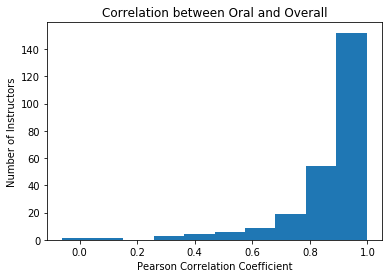

In [26]:
oral_overall_instructor_corr = instructor_corr.loc[(slice(None), 'oral'), ["overall"]]

plt.hist(oral_overall_instructor_corr["overall"])
plt.xlabel("Pearson Correlation Coefficient")
plt.ylabel("Number of Instructors")
plt.title("Correlation between Oral and Overall")
plt.show()

In [27]:
oral_overall_instructor_corr.sort_values("overall").head(10)

overall
instructor                    
Ian Goulden     oral -0.059564
Nancy Day       oral  0.130992
Ahmed Ibrahim   oral  0.280254
Bernard Wong    oral  0.285985
Ken Salem       oral  0.361298
Cecilia Cotton  oral  0.391838
Alfred Menezes  oral  0.403057
Penny Haxell    oral  0.414506
Gregor Richards oral  0.446100
Wayne Oldford   oral  0.476975

In [28]:
# Only instructor with negative correlation
df[df.instructor == "Ian Goulden"]

term         ccode   instructor       org  expl_lvl   q_treat    visual  \
1936  1169    ['CO 330']  Ian Goulden  1.809524  2.904762  1.095238  1.904762   
2117  1169  ['MATH 135']  Ian Goulden  1.459459  2.783784  1.277778  1.583333   
2607  1179  ['MATH 135']  Ian Goulden  1.441176  2.687500  1.371429  1.400000   
2645  1179  ['MATH 249']  Ian Goulden  1.333333  2.541667  1.250000  1.521739   
2997  1185  ['MATH 135']  Ian Goulden  1.454545  2.878788  1.454545  1.757576   

          oral      help  interest   overall    attend    assign     notes  \
1936  1.476190  1.555556  1.380952  1.333333  1.523810  1.333333  1.350000   
2117  1.432432  1.346154  1.621622  1.378378  1.432432  1.555556  1.434783   
2607  1.342857  1.166667  1.451613  1.382353  1.342857  1.485714  1.652174   
2645  1.416667  1.200000  1.250000  1.166667  1.416667  1.250000  1.136364   
2997  1.424242  1.310345  1.705882  1.545455  1.794118  1.588235  1.379310   

      textbook   new_mat  assign_amt   outside  num_resp  enrolled  resp_rate  \
1936  2.500000  2.809524    2.952381  2.238095        21        42   0.500000   
2117  1.387097  2.277778    2.405405  2.864865        37        59   0.627119   
2607  1.642857  2.575758    2.705882  2.885714        35        51   0.686275   
2645  1.500000  2.750000    2.750000  2.583333        24        45   0.533333   
2997  1.458333  2.878788    2.705882  2.454545        34        84   0.404762   

      response_rate      title     salary  
1936       0.500000  Professor  232397.28  
2117       0.627119  Professor  232397.28  
2607       0.686275  Professor  232397.28  
2645       0.533333  Professor  232397.28  
2997       0.404762  Professor  232397.28

# How correlated are organization and overall?

Even more than oral

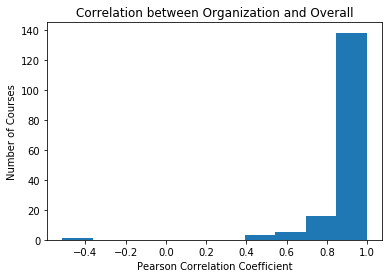

In [29]:
organization_overall_corr = corr.loc[(slice(None), 'org'), ["overall"]]

plt.hist(organization_overall_corr["overall"])
plt.xlabel("Pearson Correlation Coefficient")
plt.ylabel("Number of Courses")
plt.title("Correlation between Organization and Overall")
plt.show()

In [30]:
organization_overall_corr.sort_values("overall").head(10)

overall
ccode                             
['CS 444', 'CS 644'] org -0.513644
['MATH 145']         org  0.505874
['STAT 334']         org  0.508027
['CS 200']           org  0.525412
['CS 697']           org  0.583868
['COMM 321']         org  0.615111
['AMATH 271']        org  0.634871
['CS 452', 'CS 652'] org  0.669933
['STAT 316']         org  0.674166
['CS 846']           org  0.697639

Note same stuff: CS 444 disorganized (Lhotak) but less emphasis on lectures, Djao disorganized in MATH 145

# How correlated are everything with courses?

/home/jeffrey/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jeffrey/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/jeffrey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


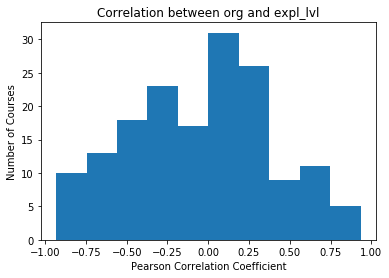

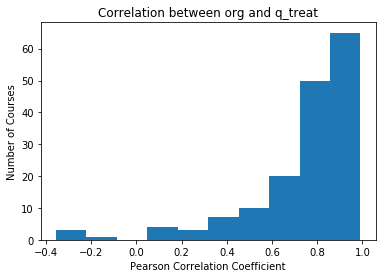

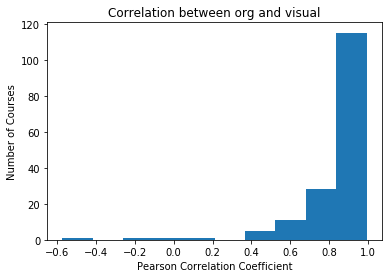

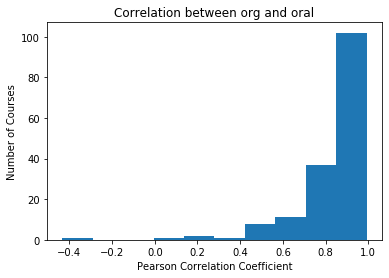

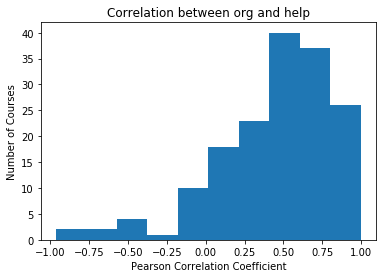

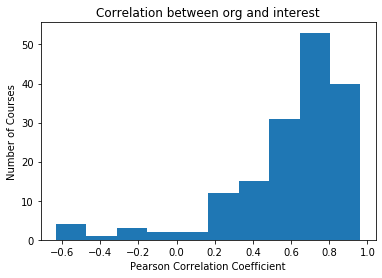

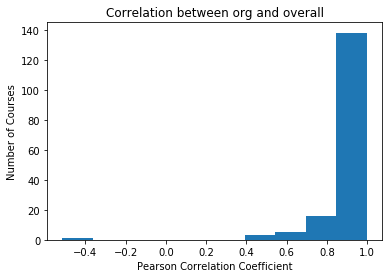

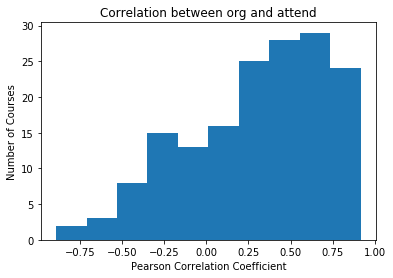

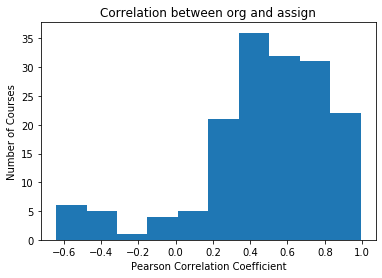

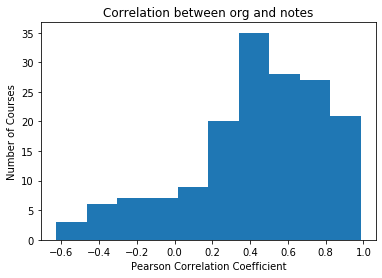

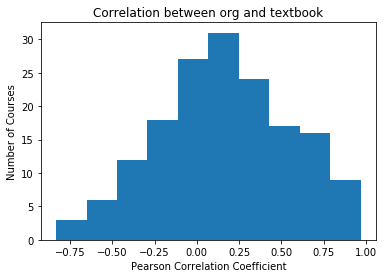

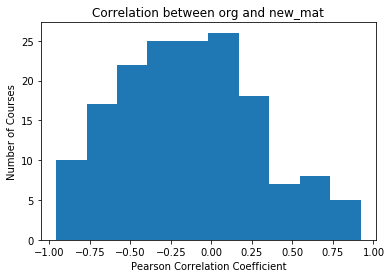

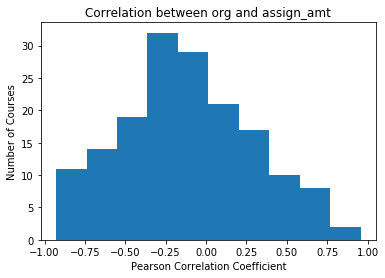

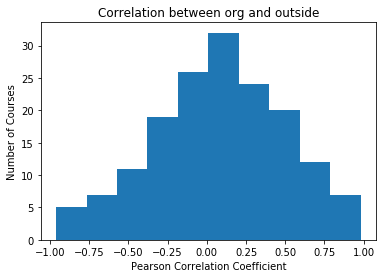

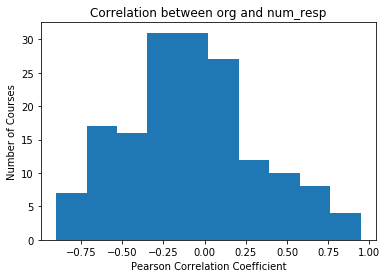

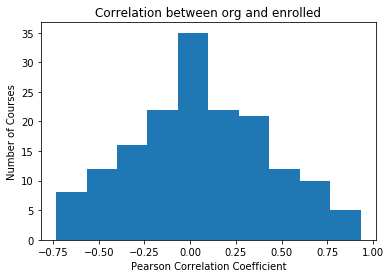

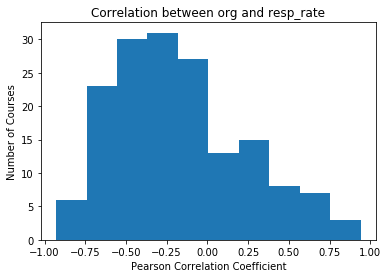

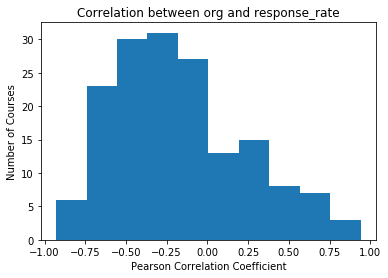

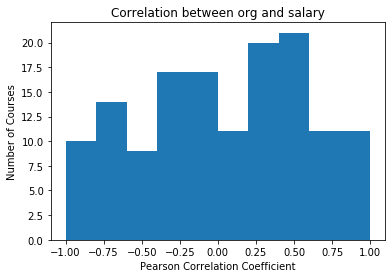

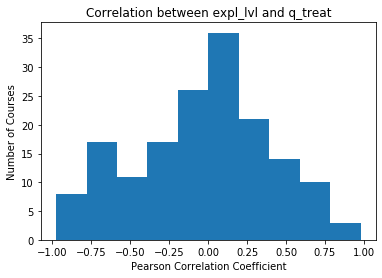

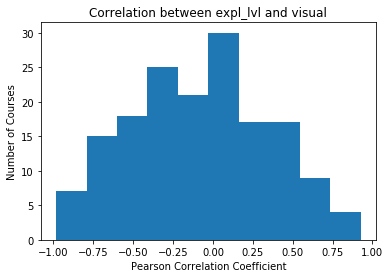

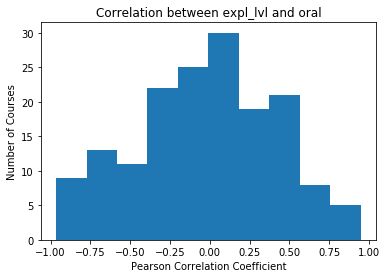

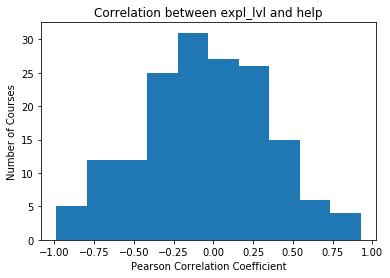

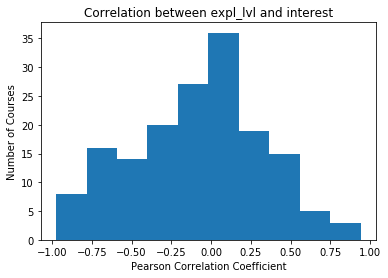

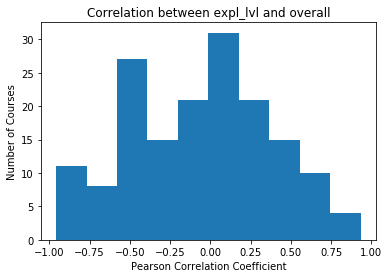

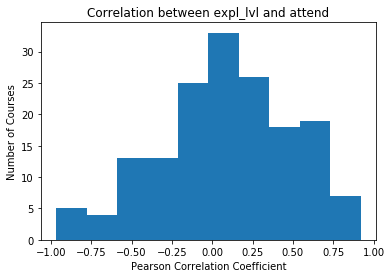

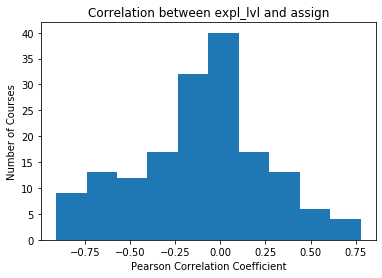

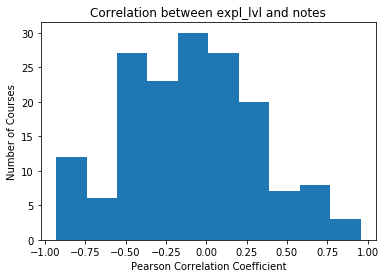

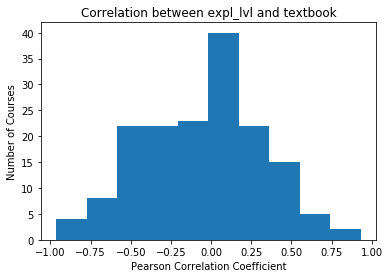

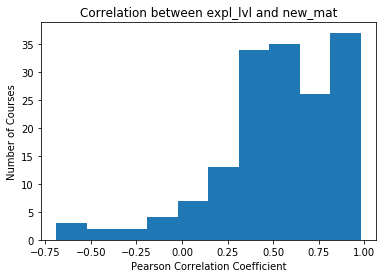

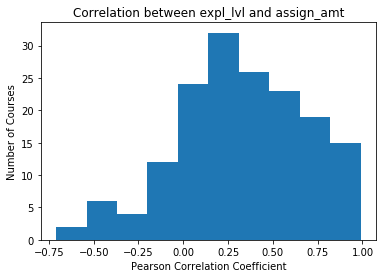

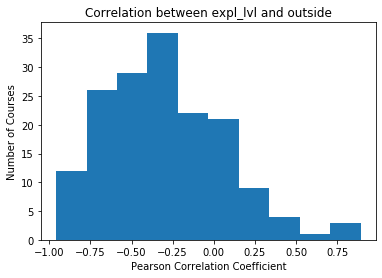

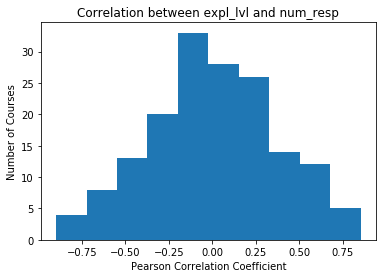

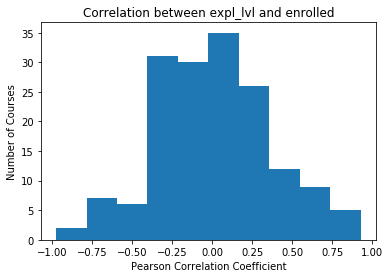

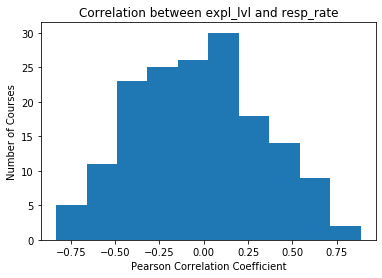

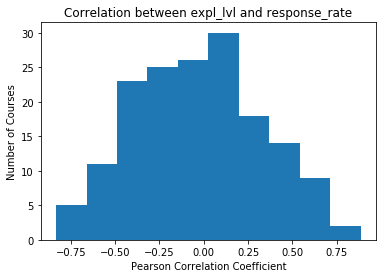

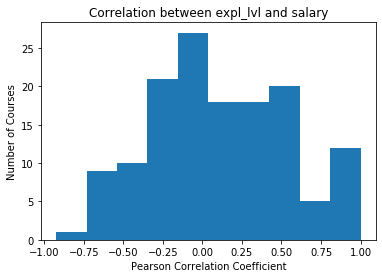

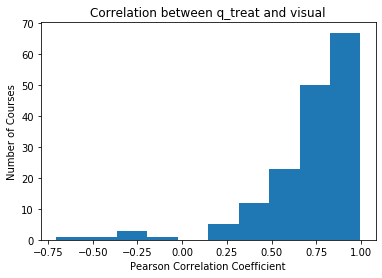

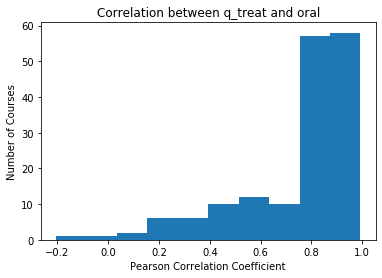

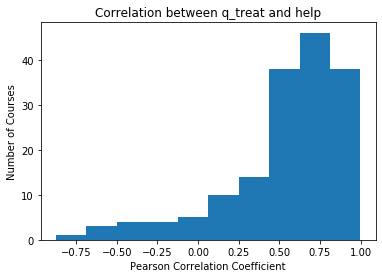

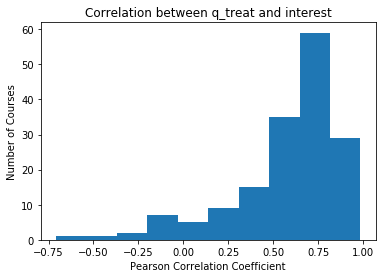

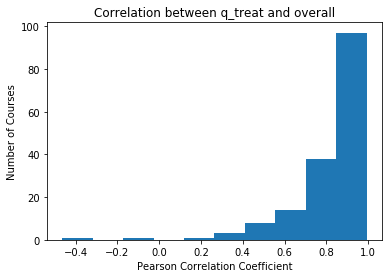

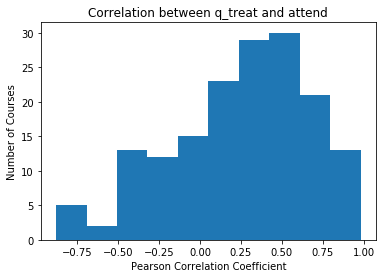

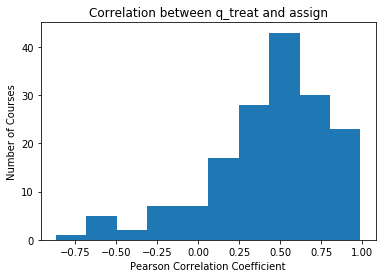

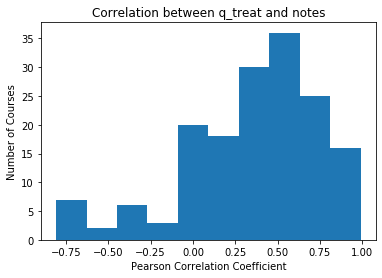

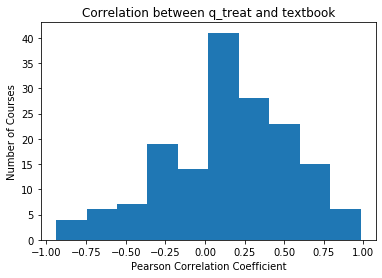

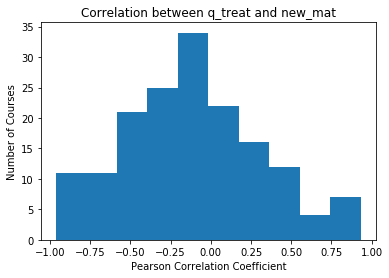

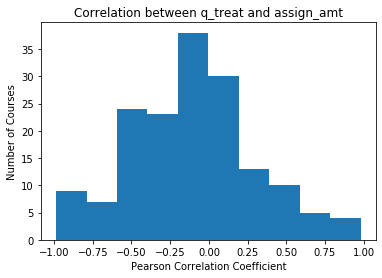

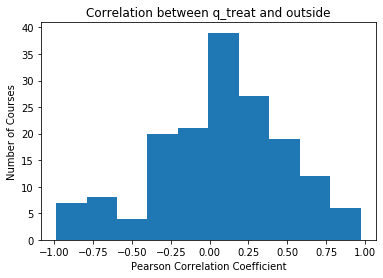

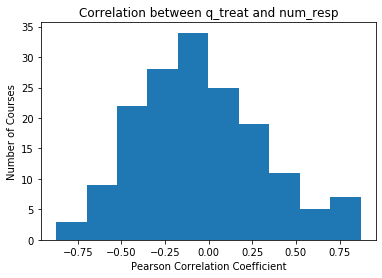

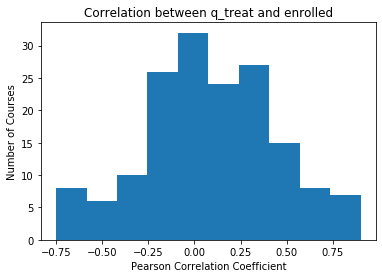

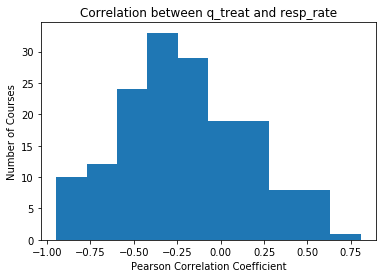

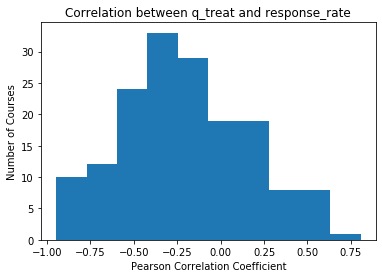

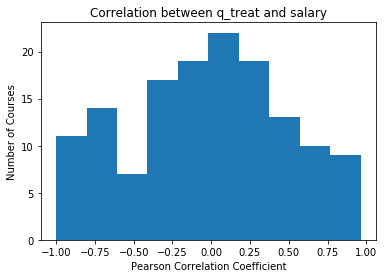

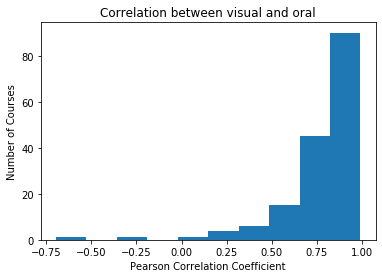

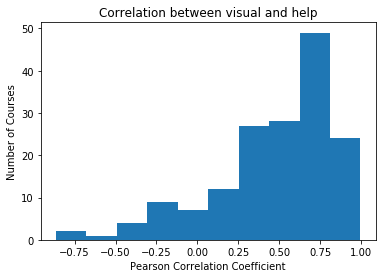

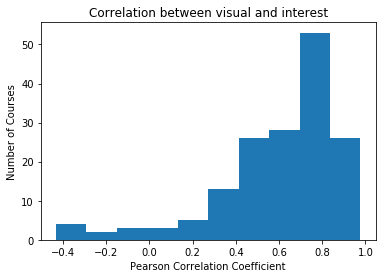

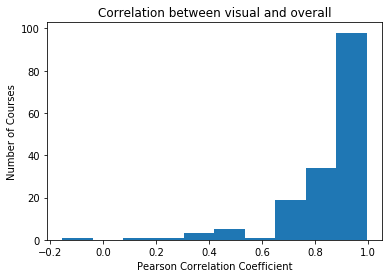

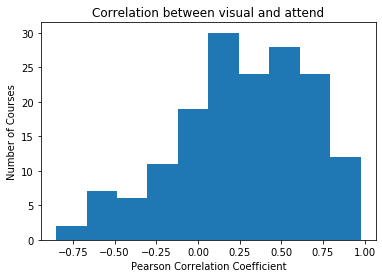

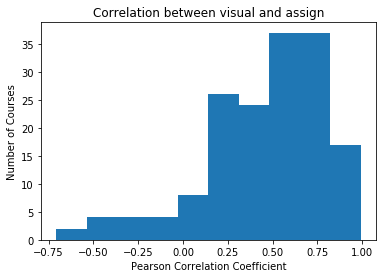

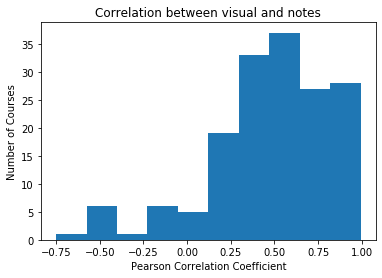

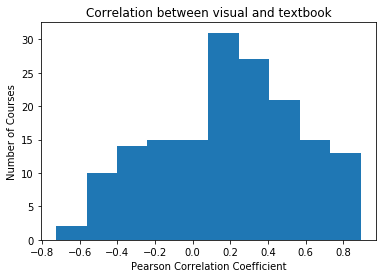

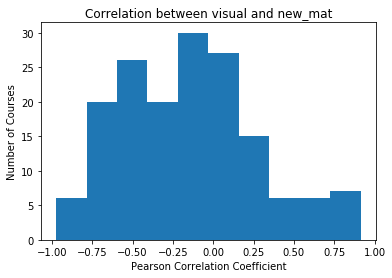

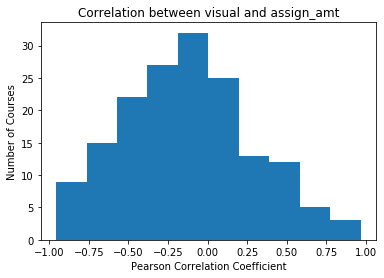

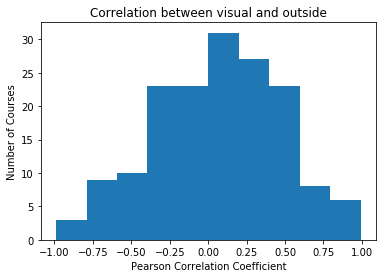

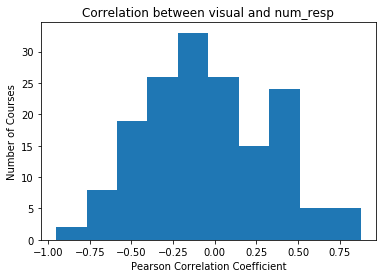

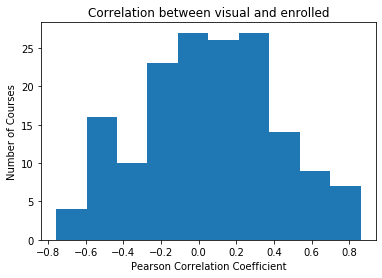

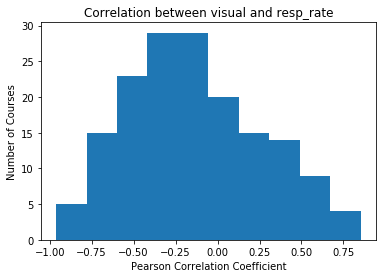

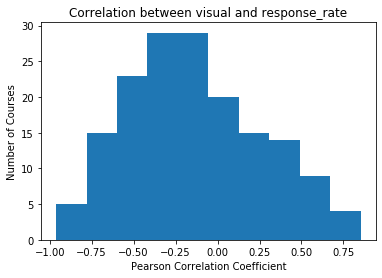

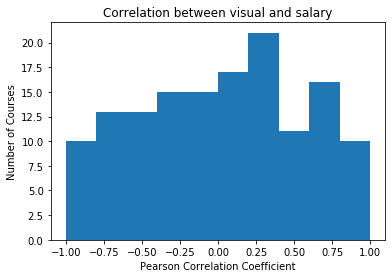

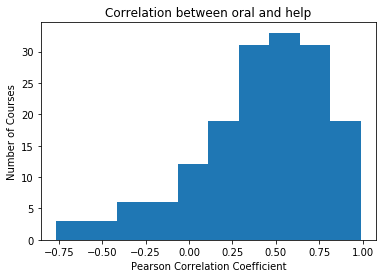

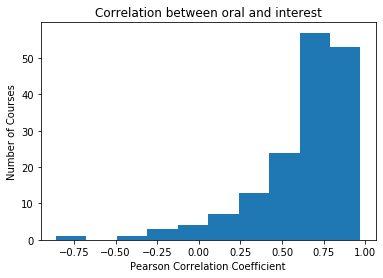

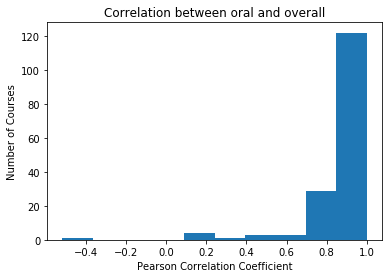

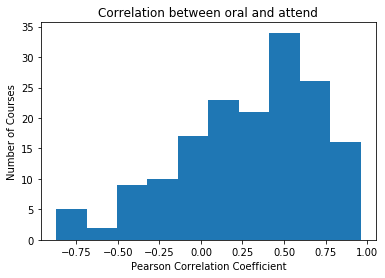

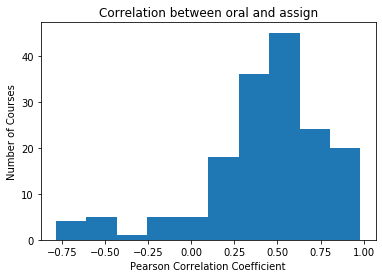

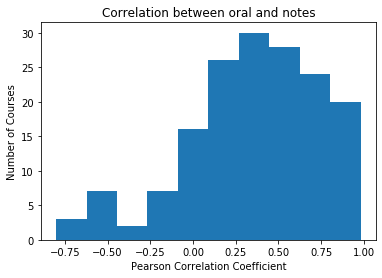

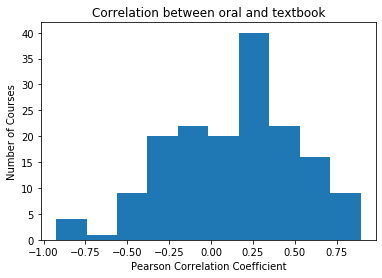

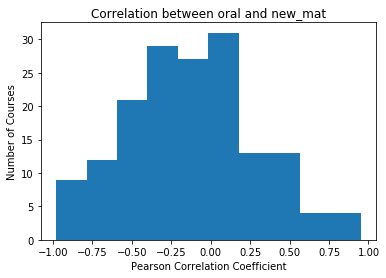

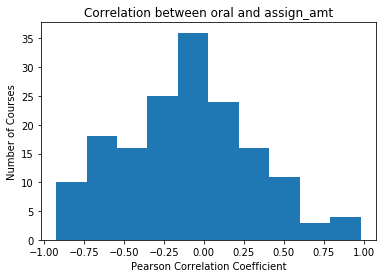

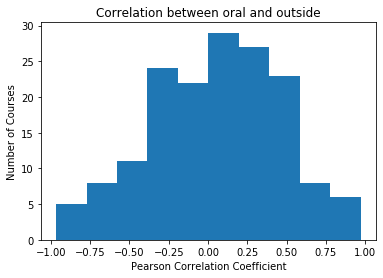

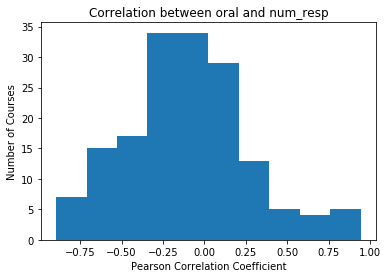

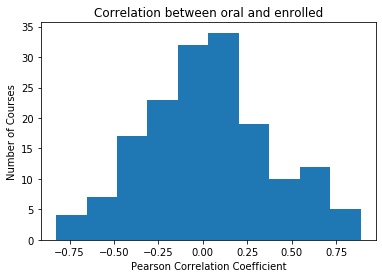

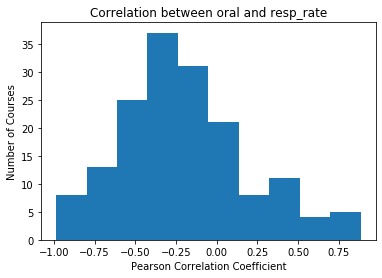

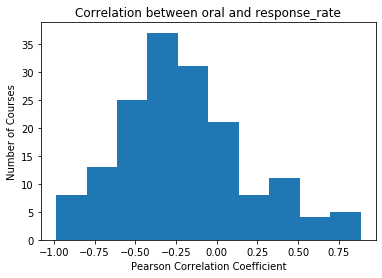

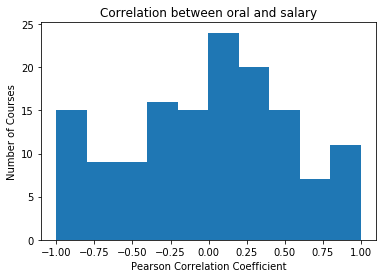

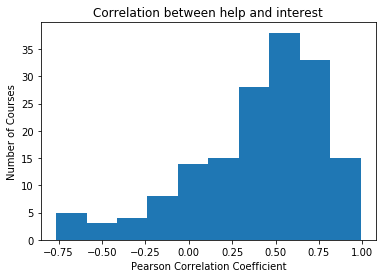

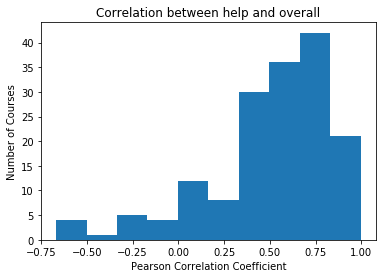

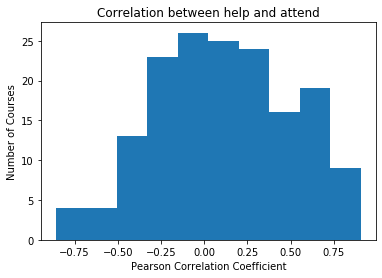

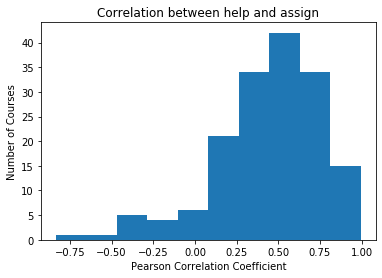

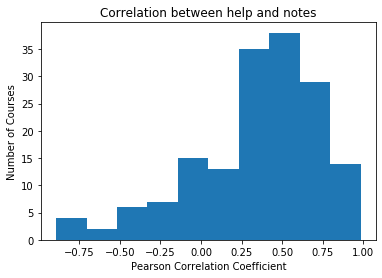

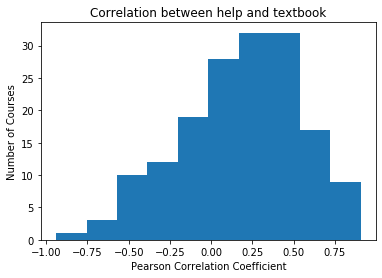

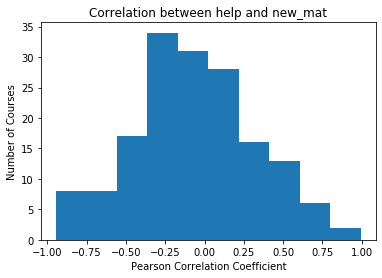

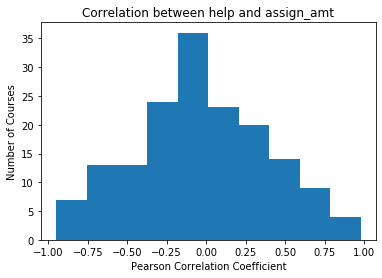

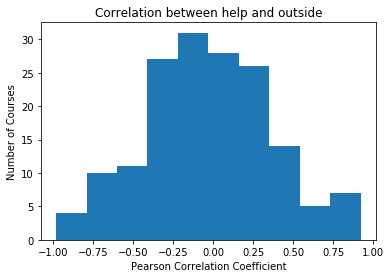

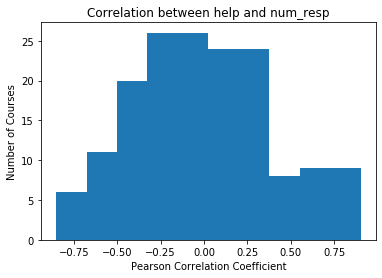

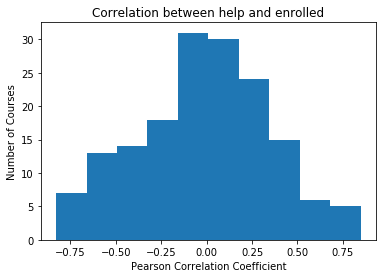

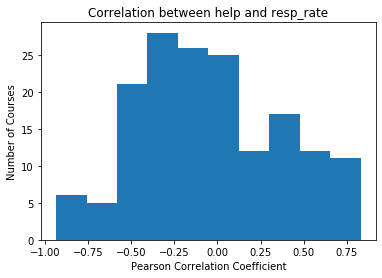

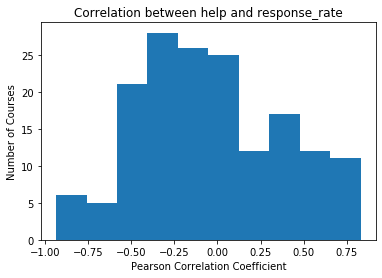

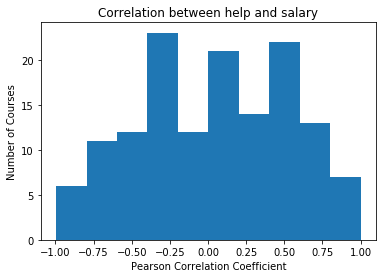

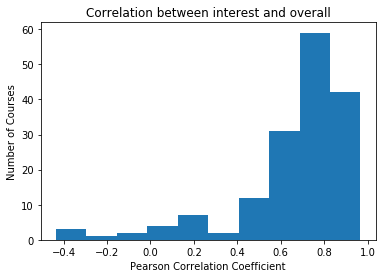

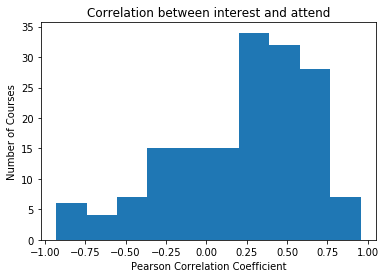

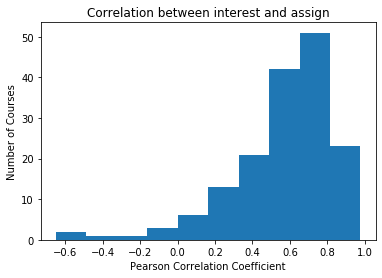

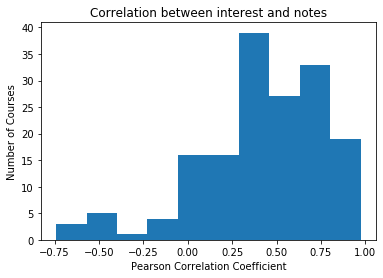

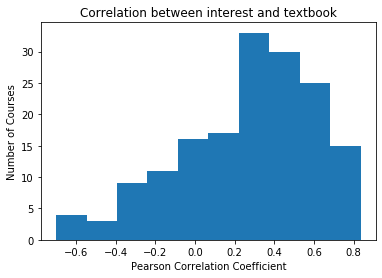

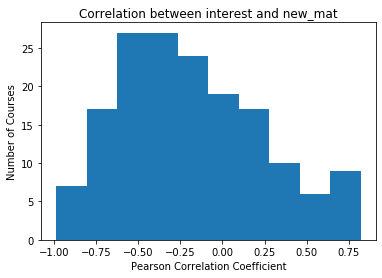

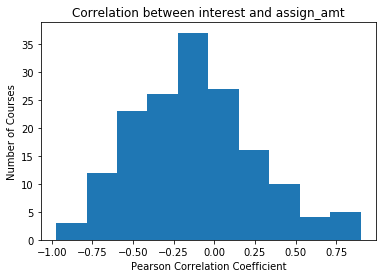

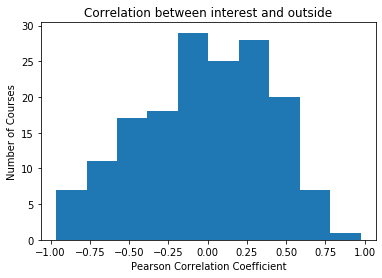

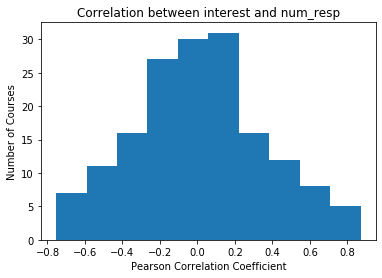

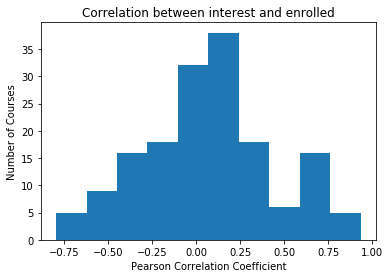

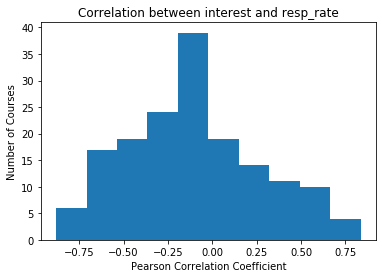

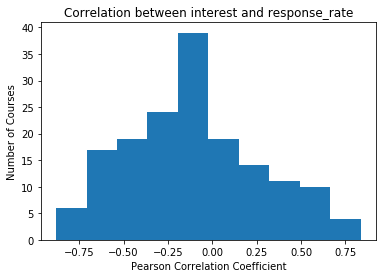

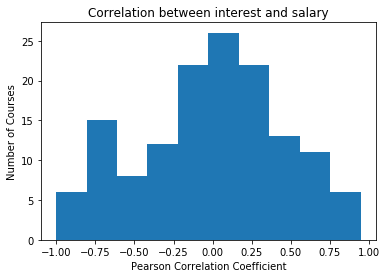

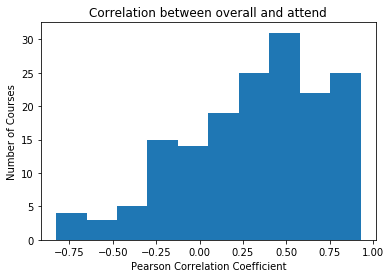

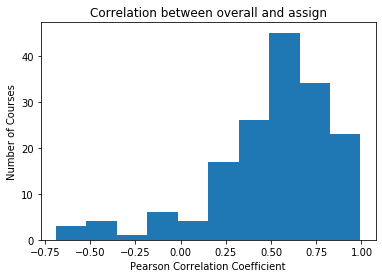

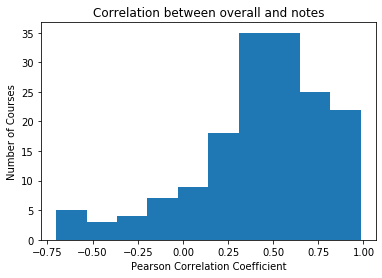

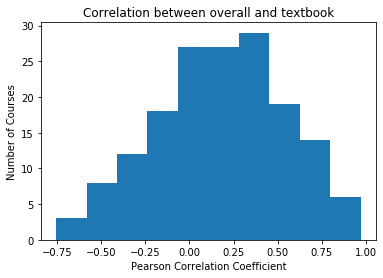

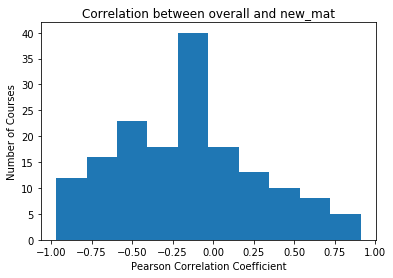

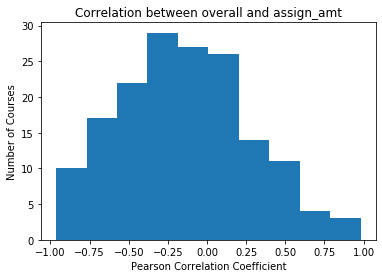

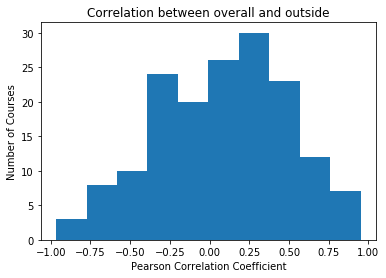

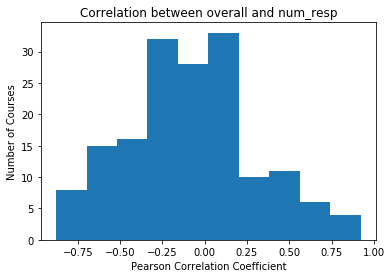

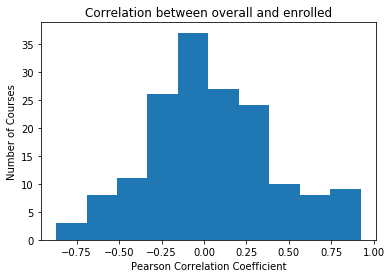

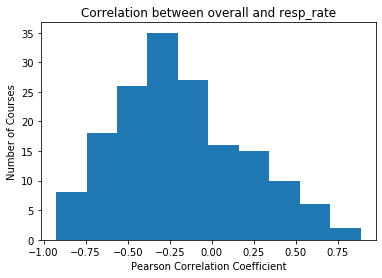

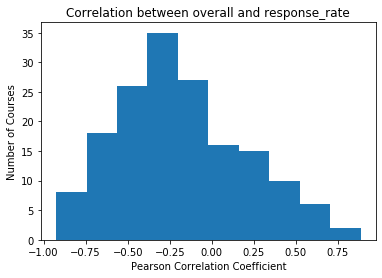

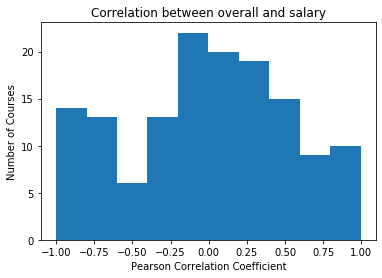

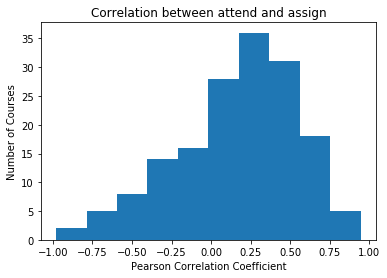

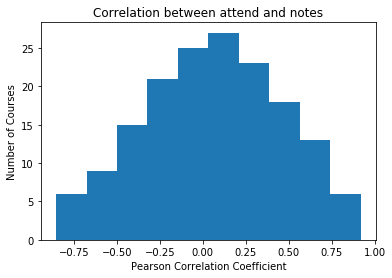

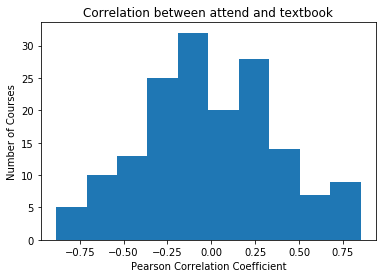

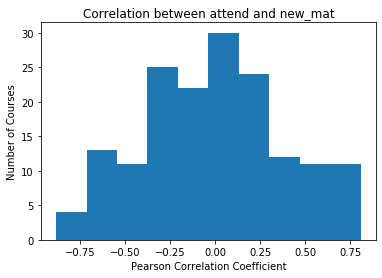

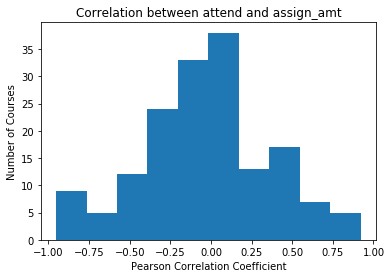

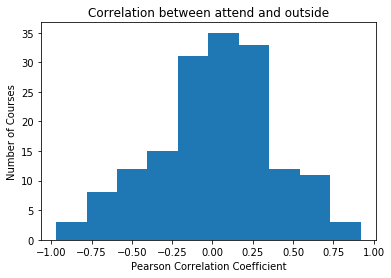

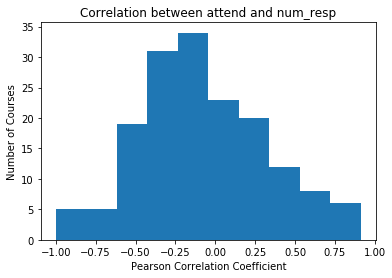

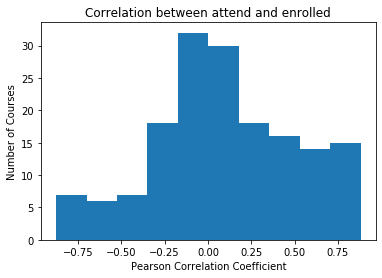

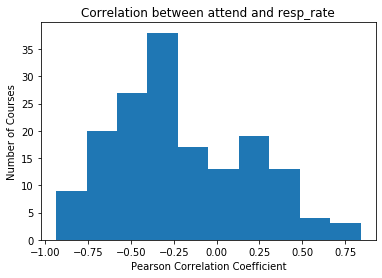

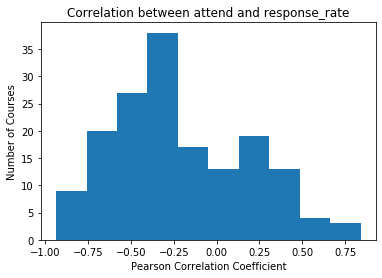

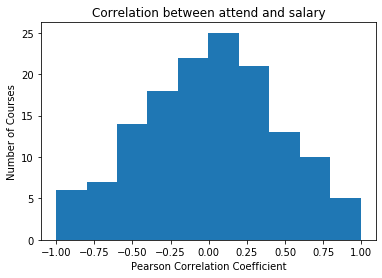

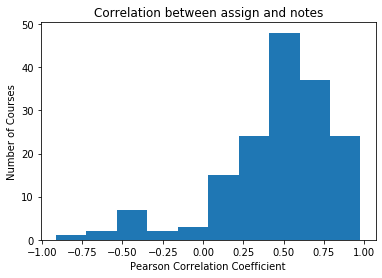

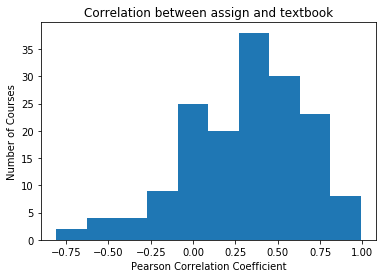

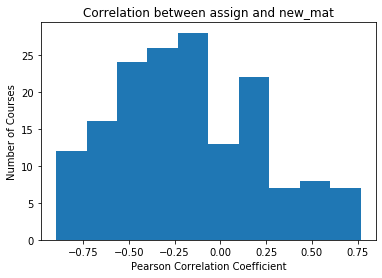

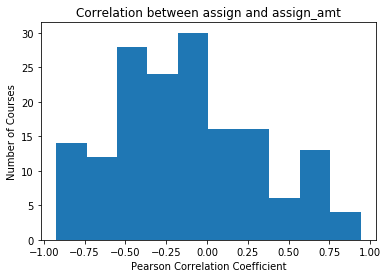

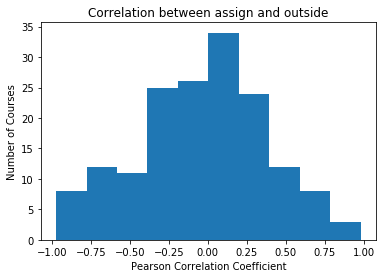

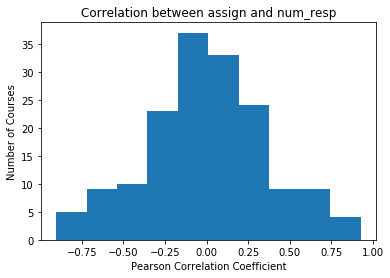

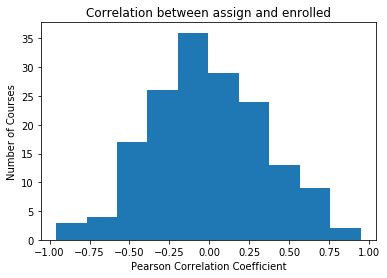

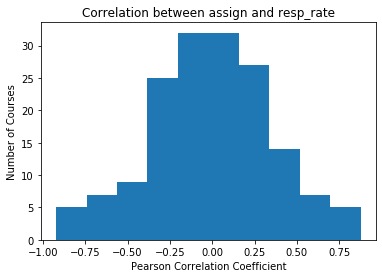

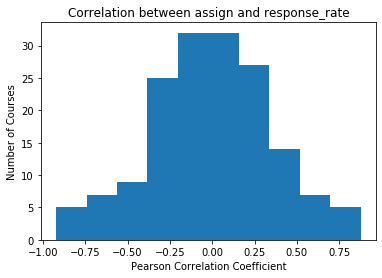

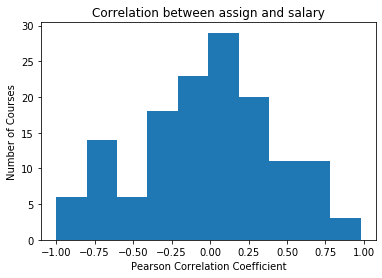

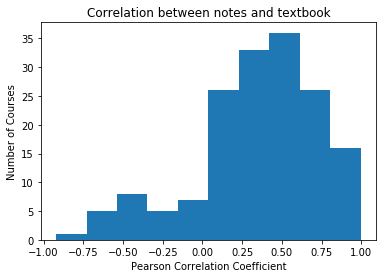

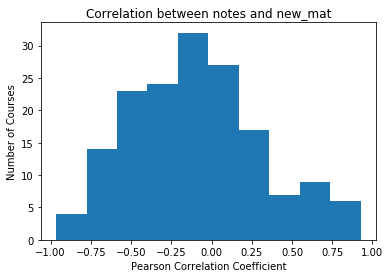

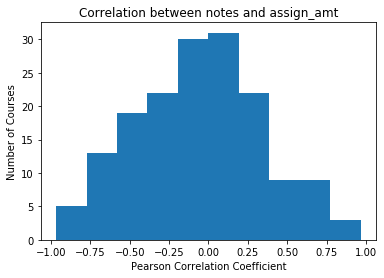

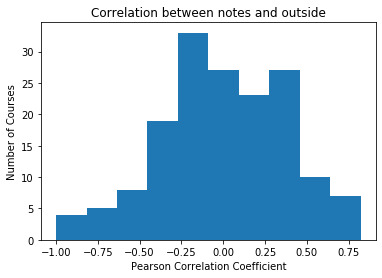

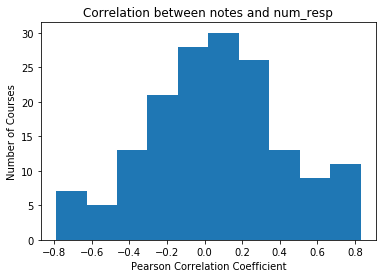

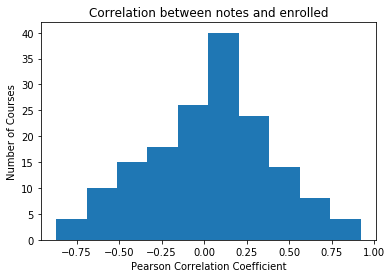

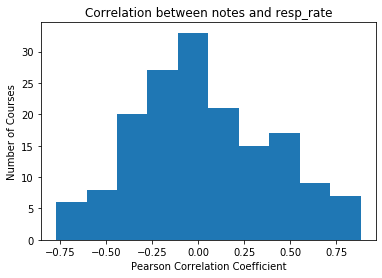

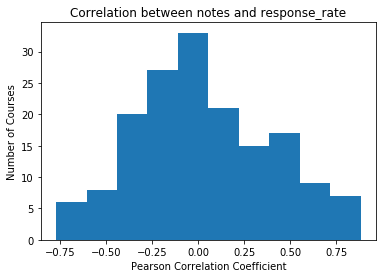

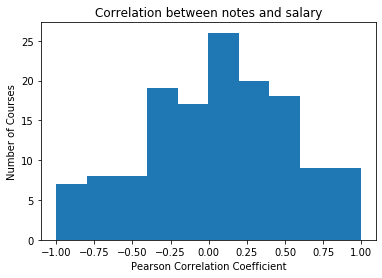

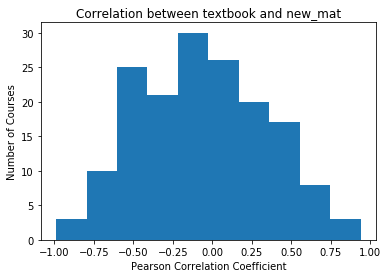

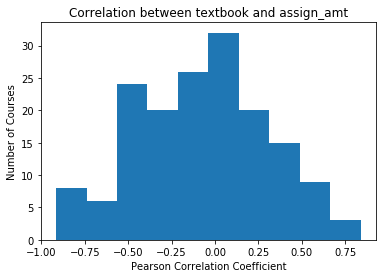

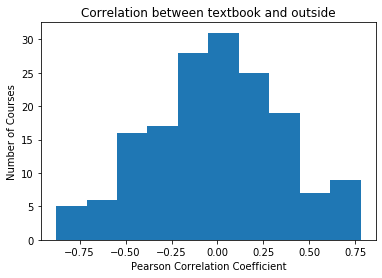

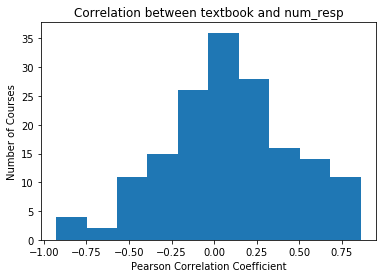

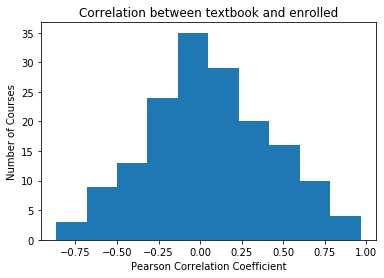

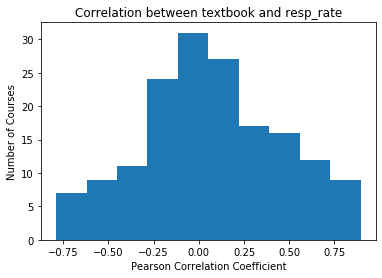

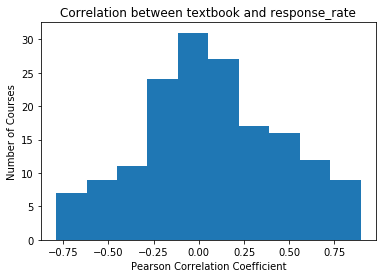

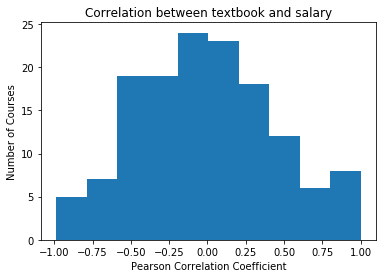

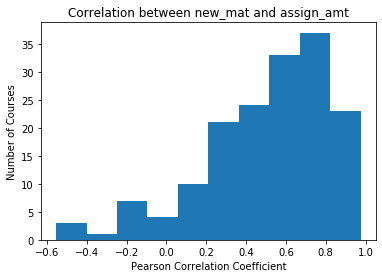

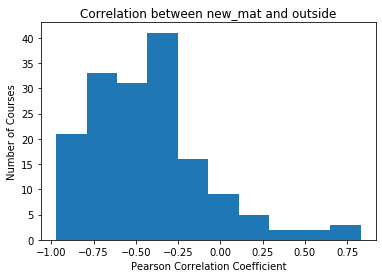

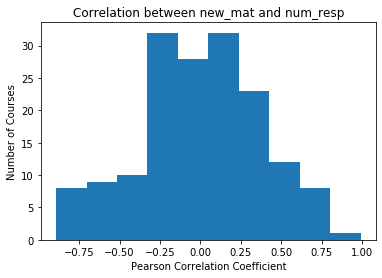

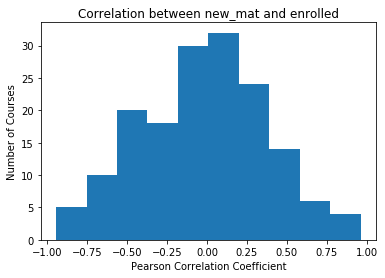

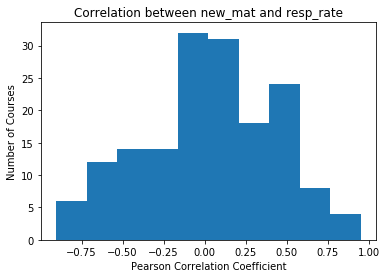

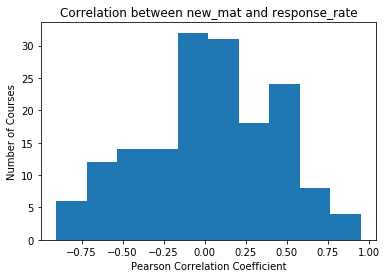

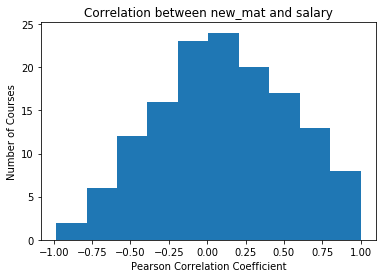

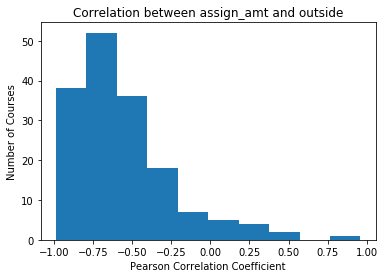

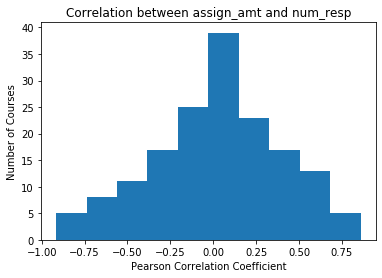

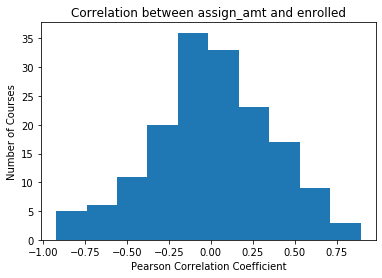

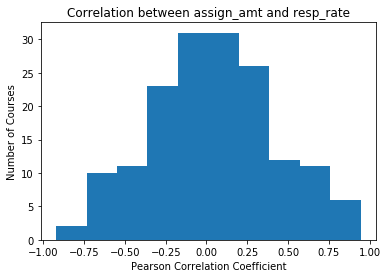

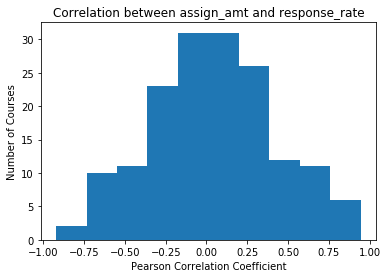

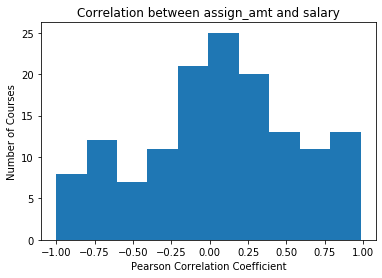

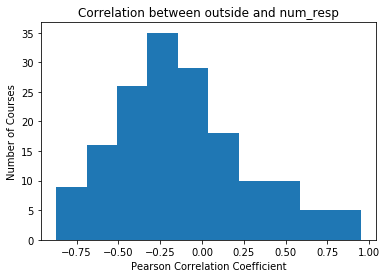

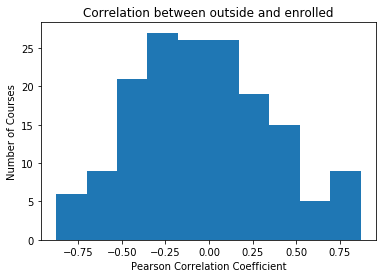

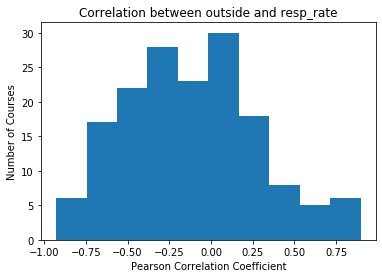

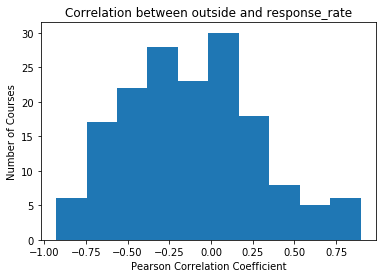

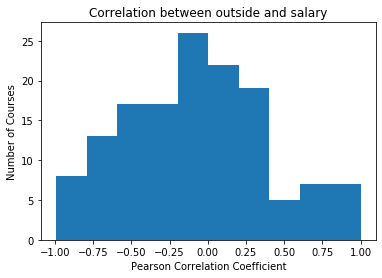

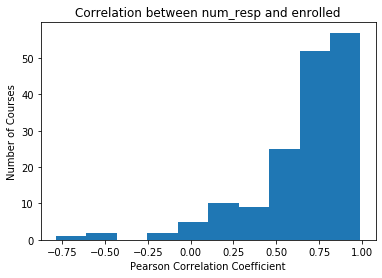

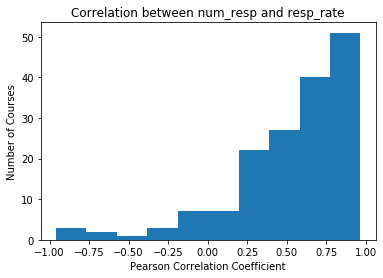

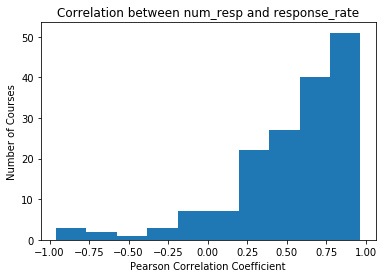

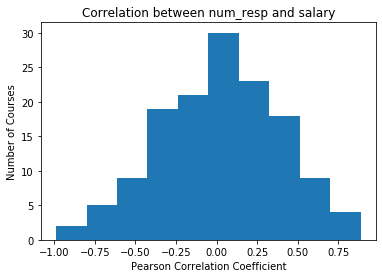

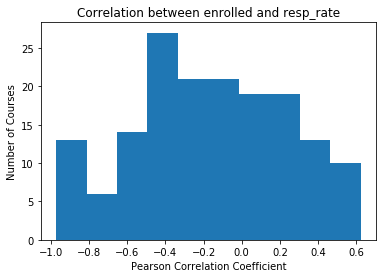

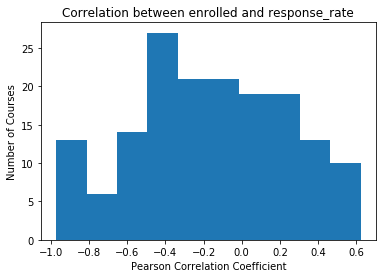

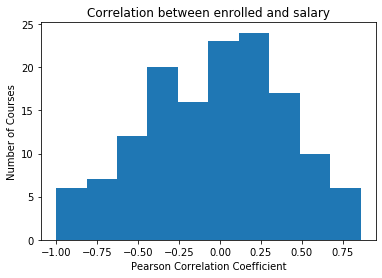

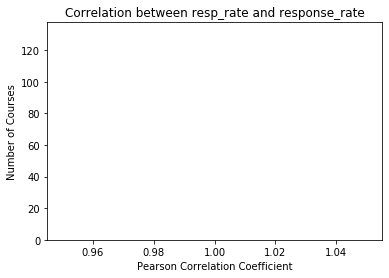

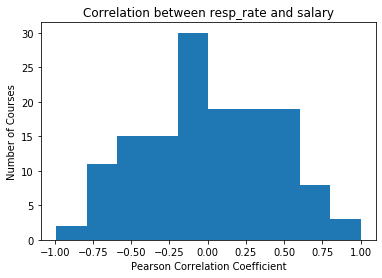

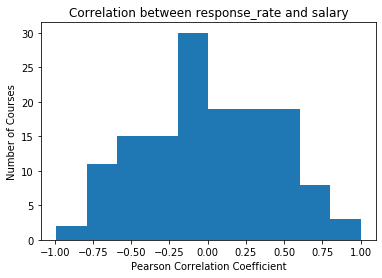

In [31]:
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        col1 = corr.columns[i]
        col2 = corr.columns[j]
        corr_ij = corr.loc[(slice(None), col1), [col2]]
        fig, ax = plt.subplots()
        ax.hist(corr_ij[col2])
        plt.xlabel("Pearson Correlation Coefficient")
        plt.ylabel("Number of Courses")
        plt.title("Correlation between {} and {}".format(corr.columns[i], corr.columns[j]))

# How correlated are everything with instructors?

/home/jeffrey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


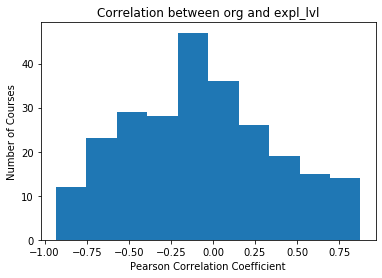

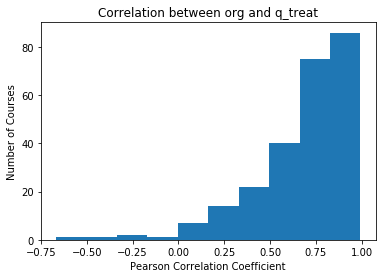

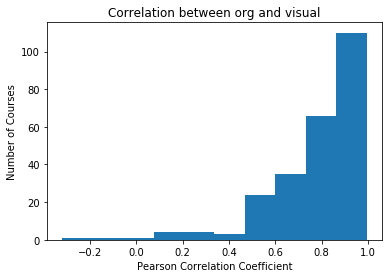

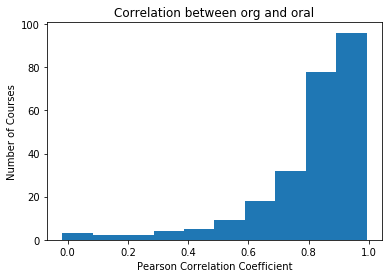

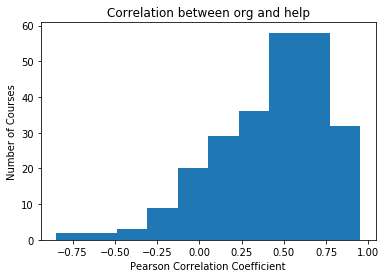

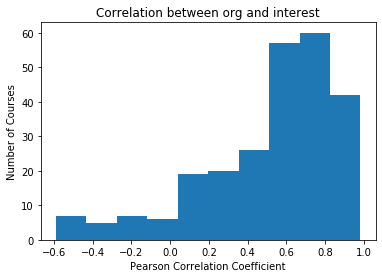

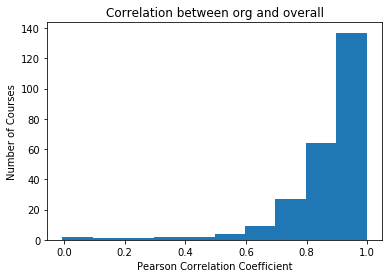

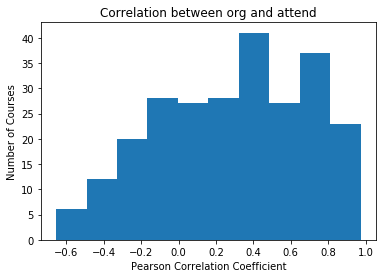

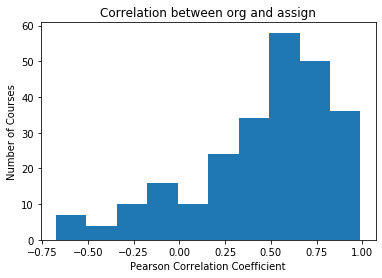

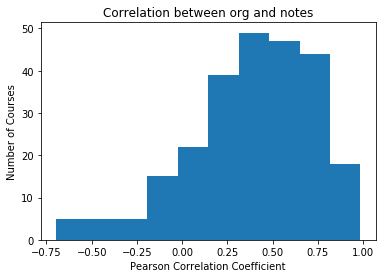

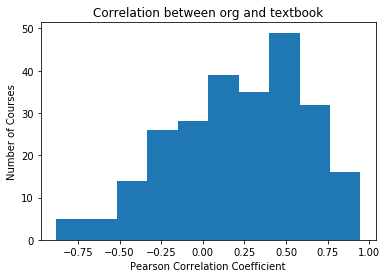

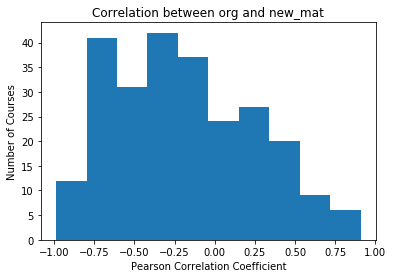

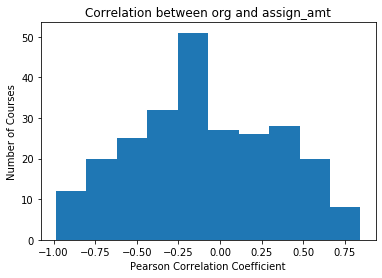

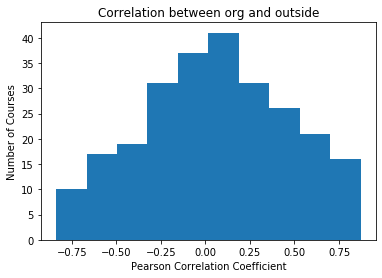

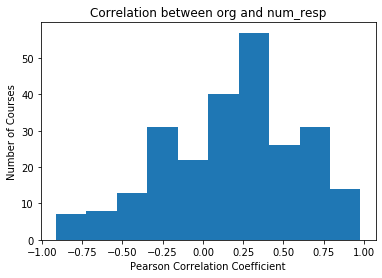

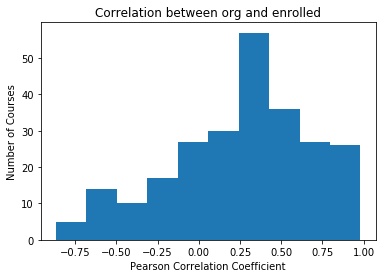

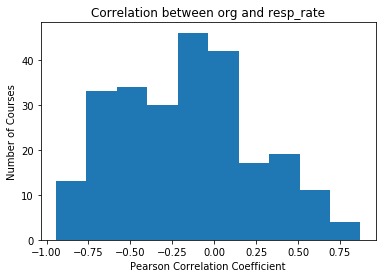

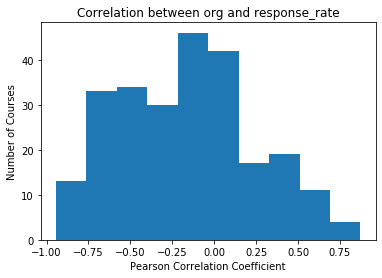

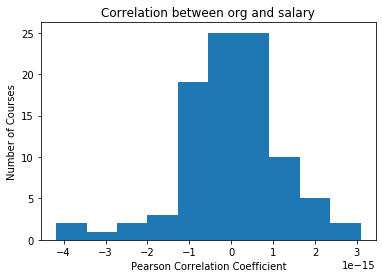

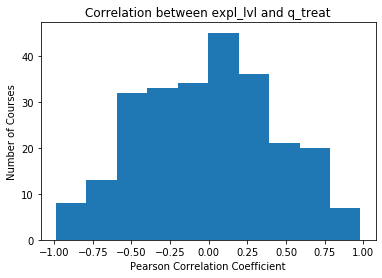

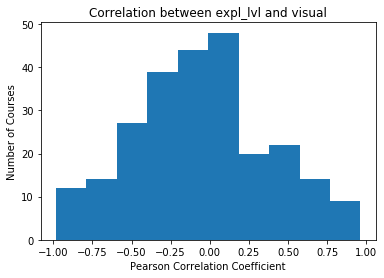

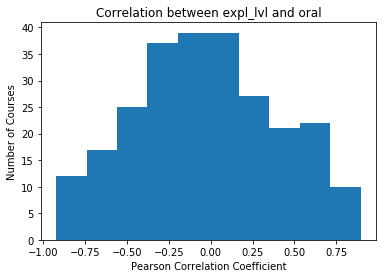

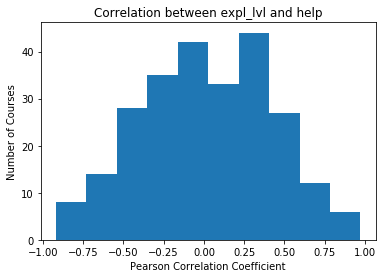

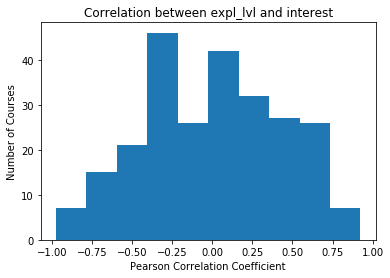

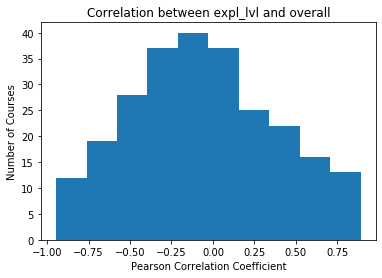

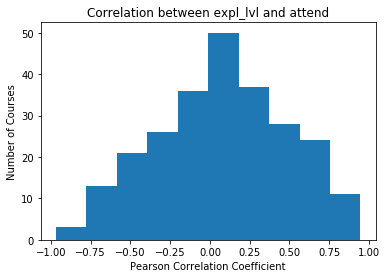

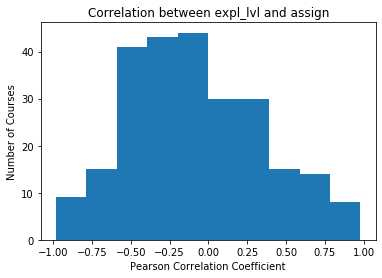

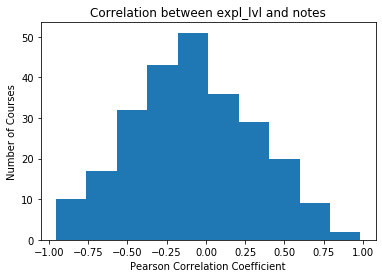

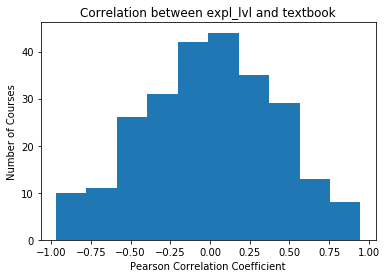

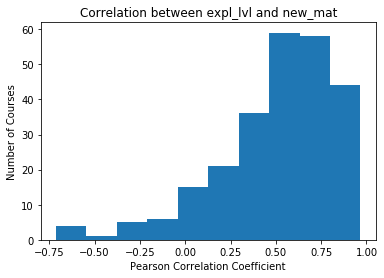

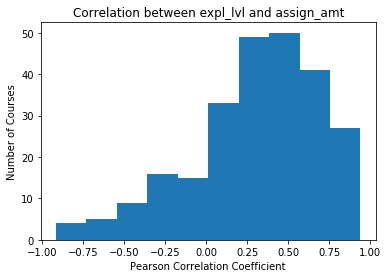

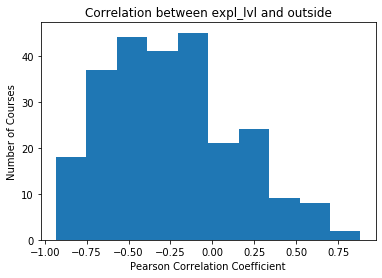

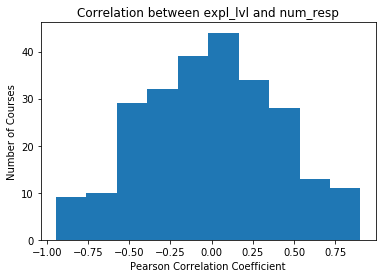

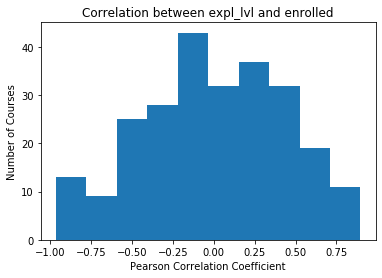

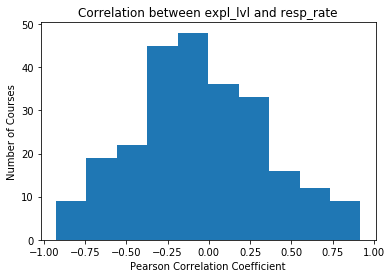

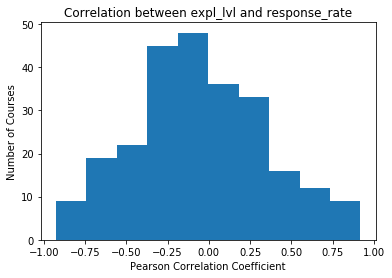

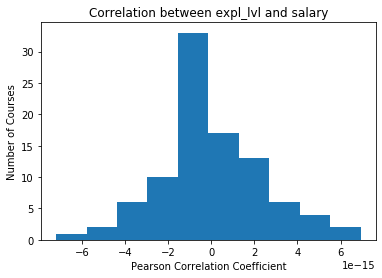

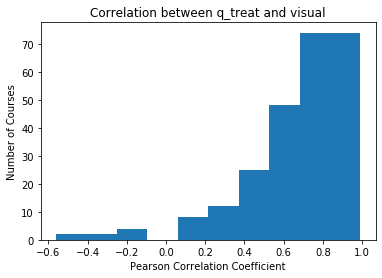

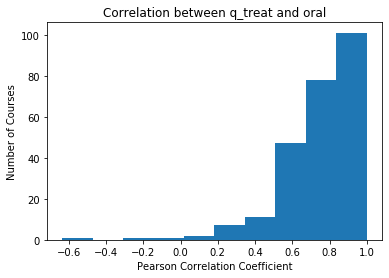

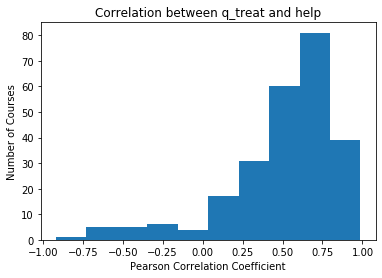

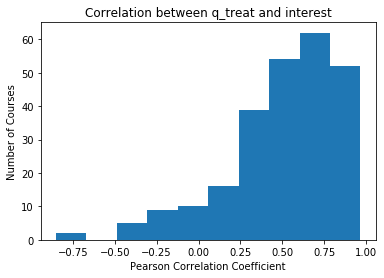

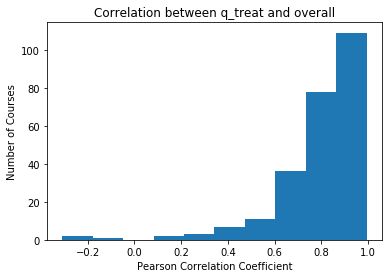

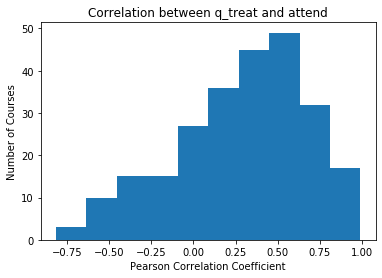

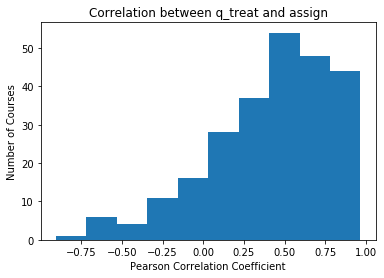

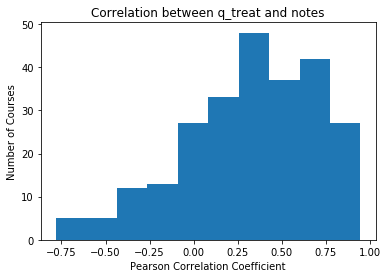

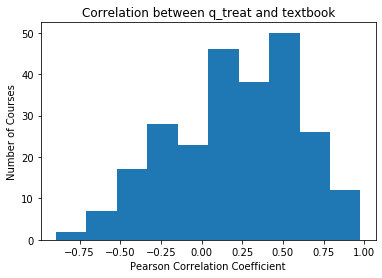

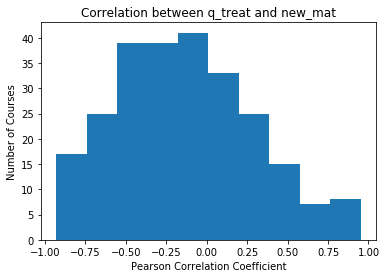

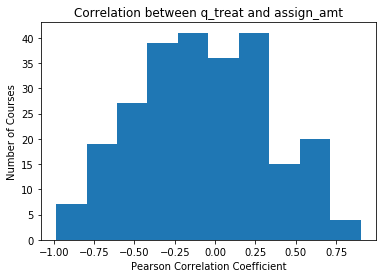

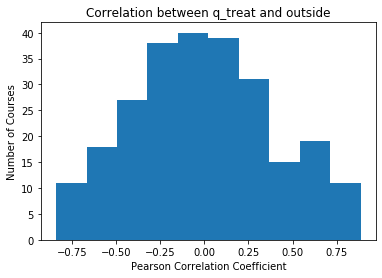

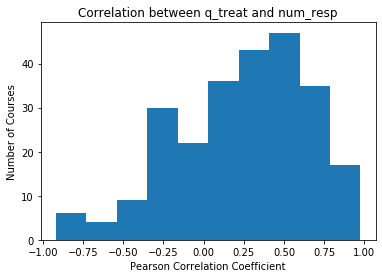

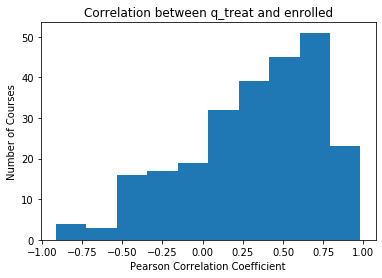

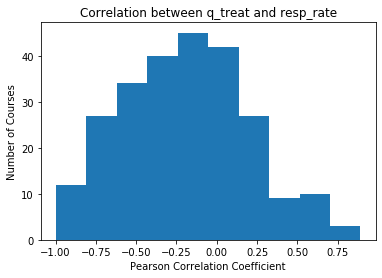

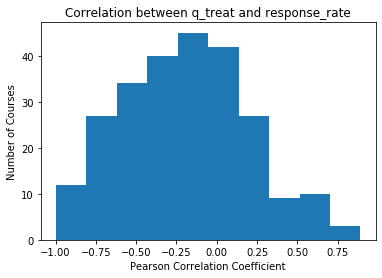

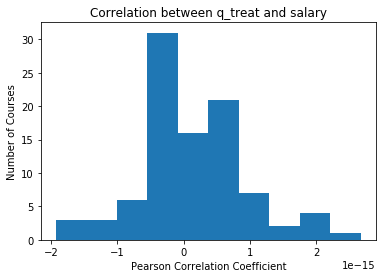

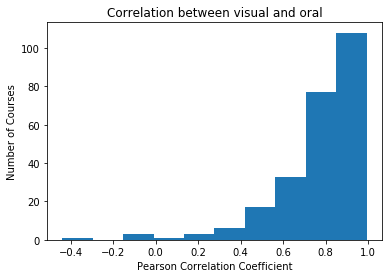

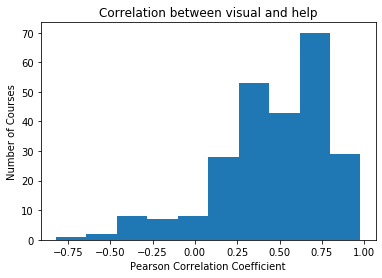

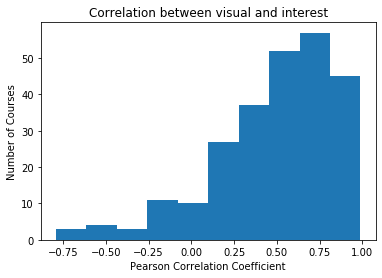

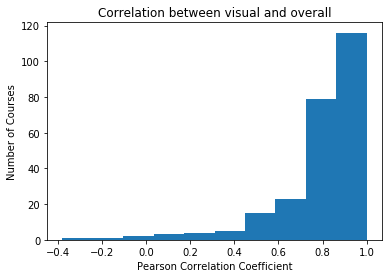

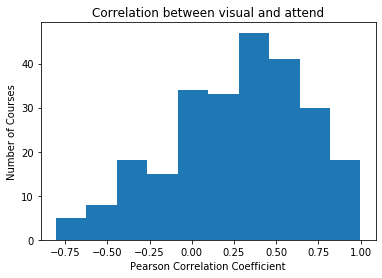

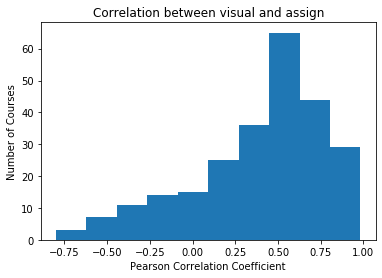

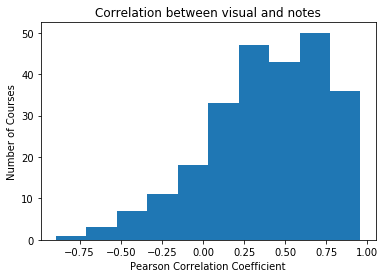

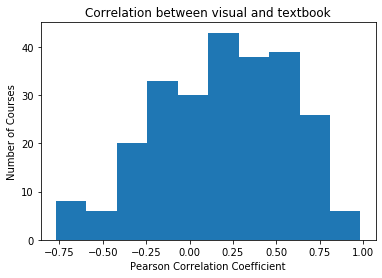

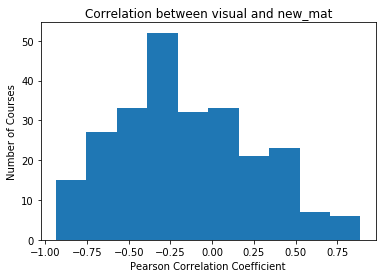

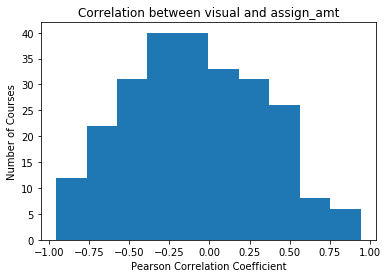

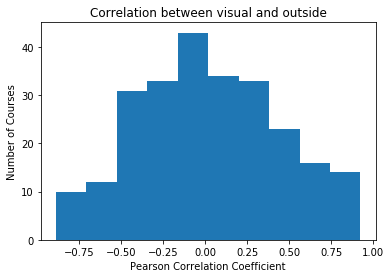

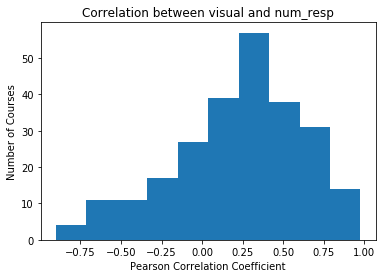

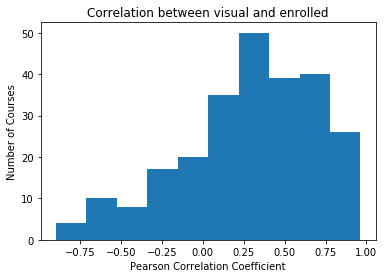

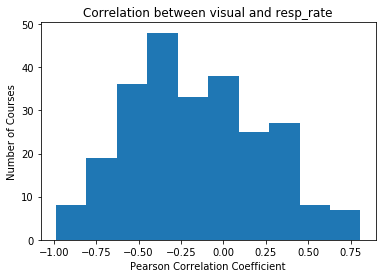

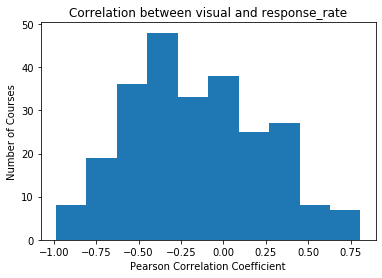

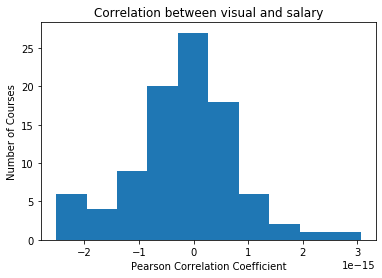

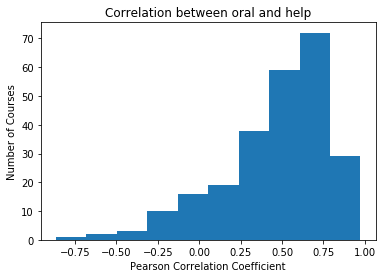

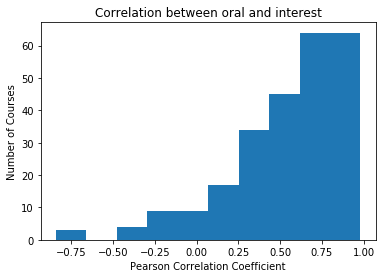

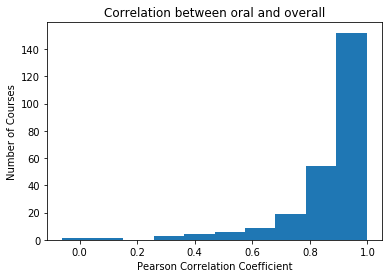

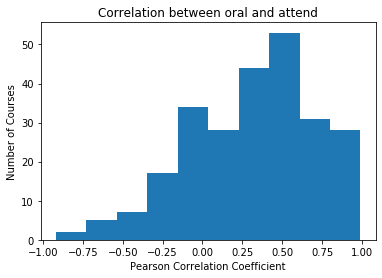

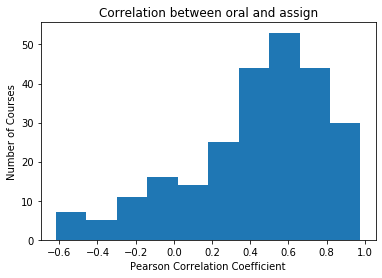

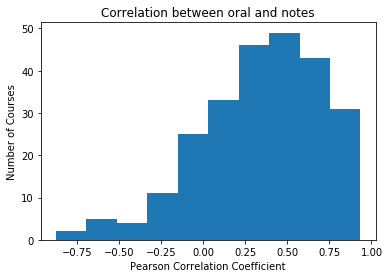

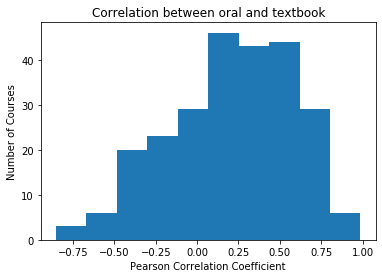

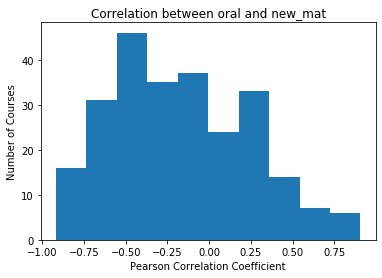

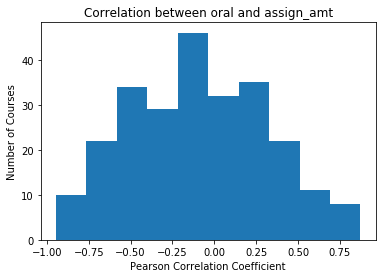

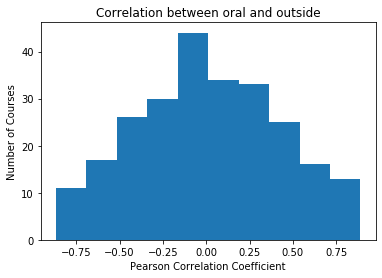

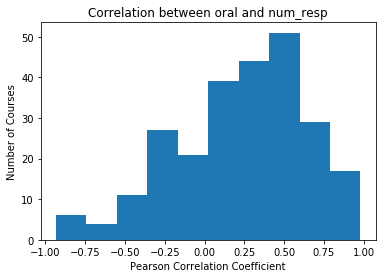

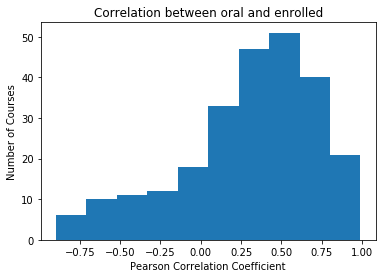

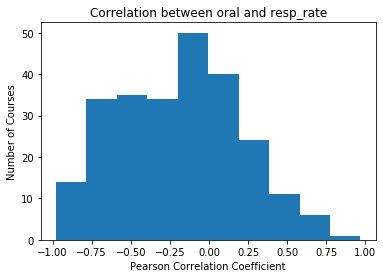

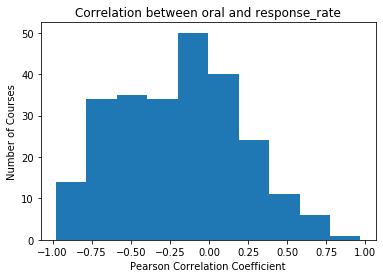

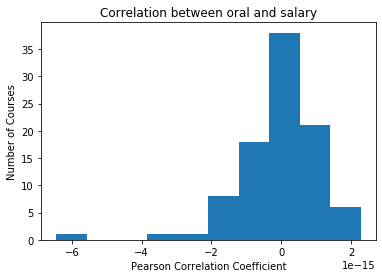

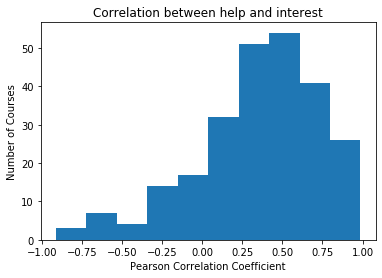

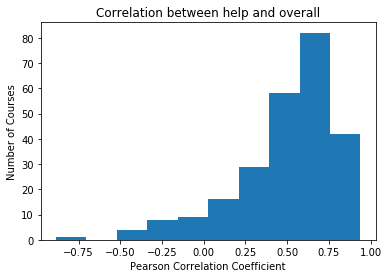

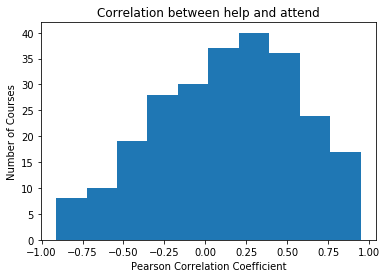

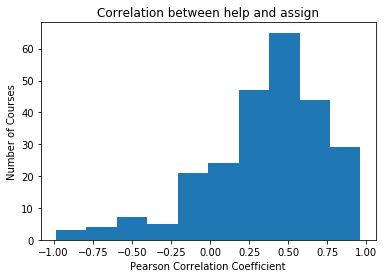

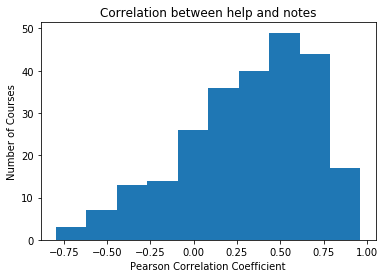

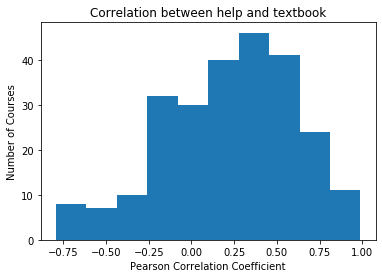

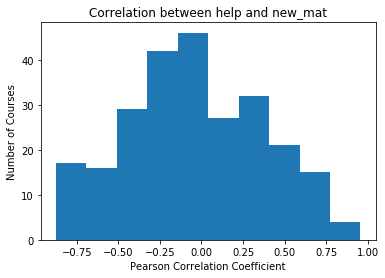

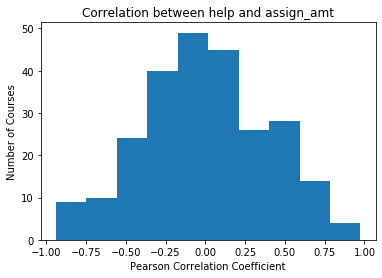

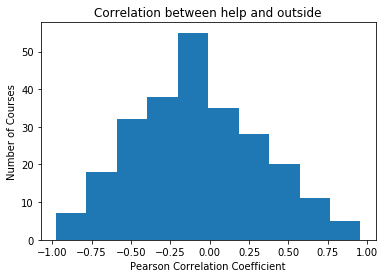

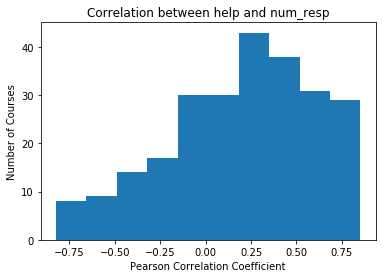

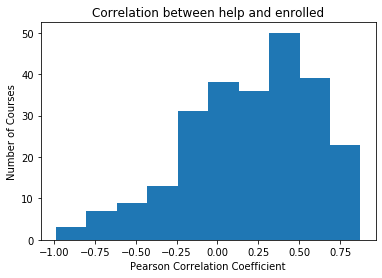

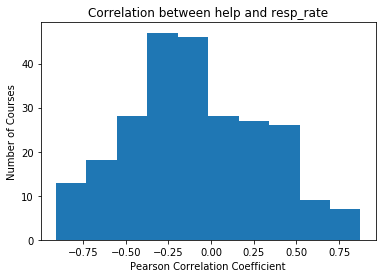

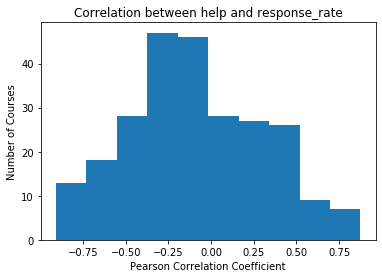

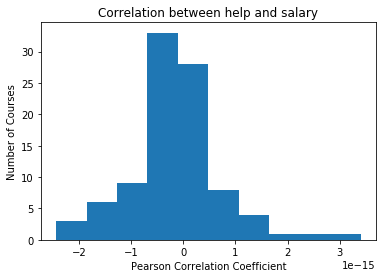

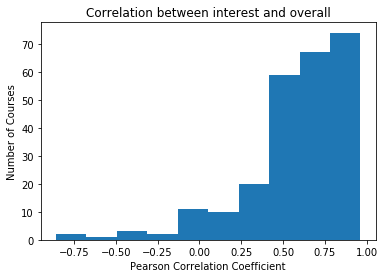

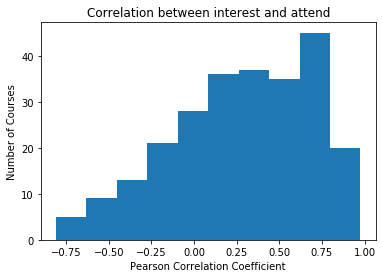

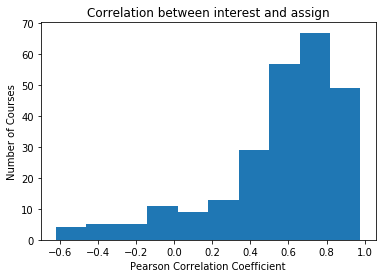

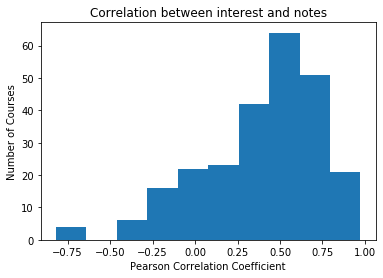

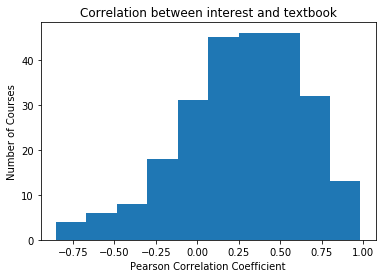

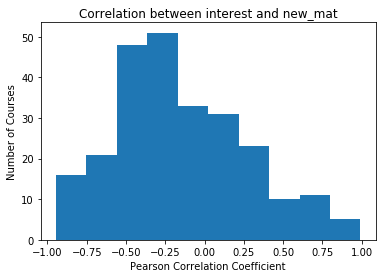

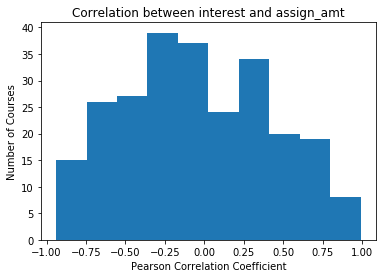

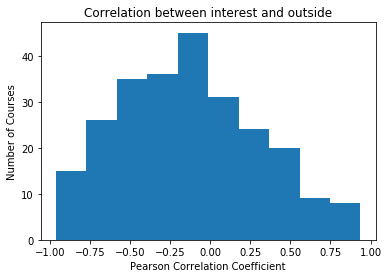

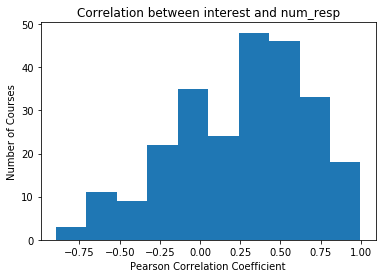

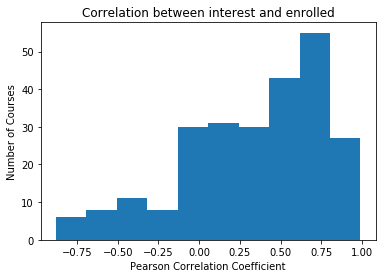

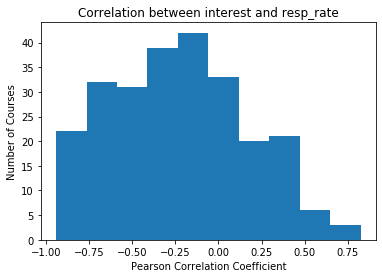

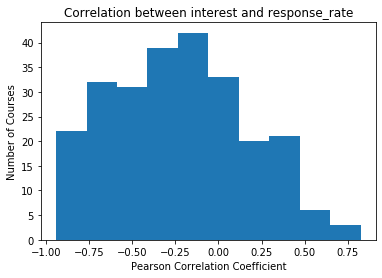

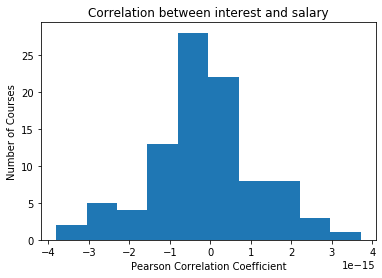

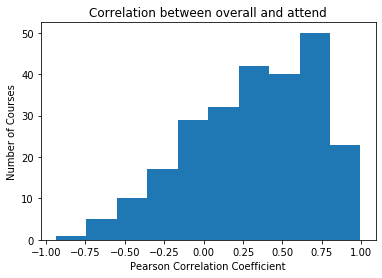

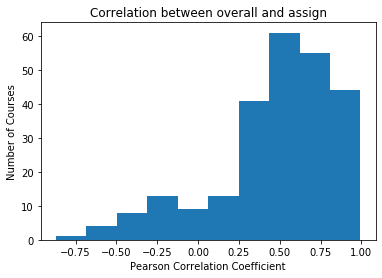

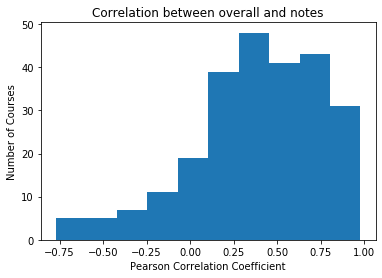

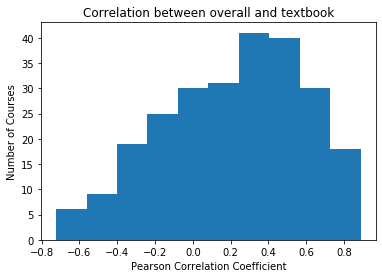

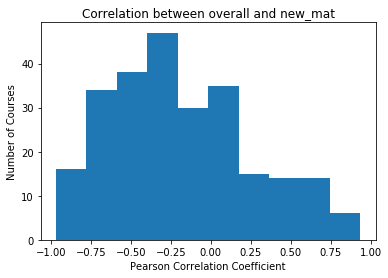

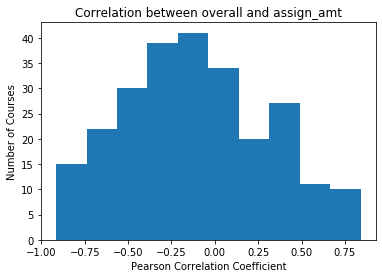

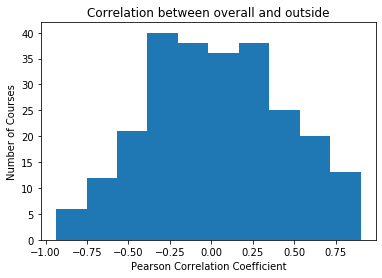

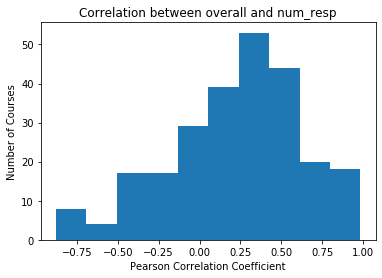

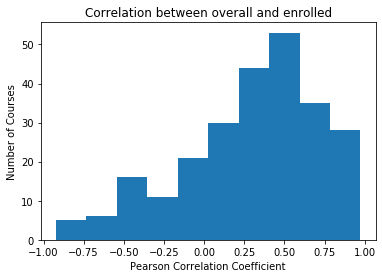

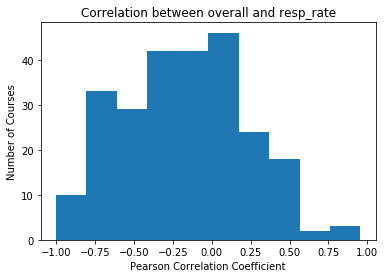

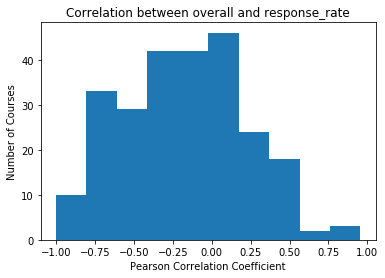

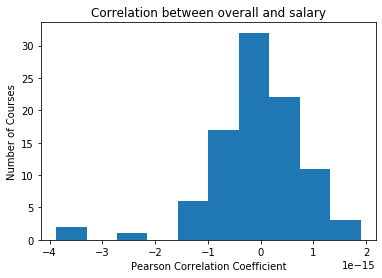

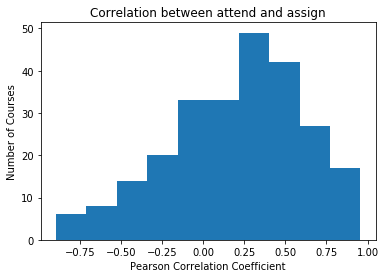

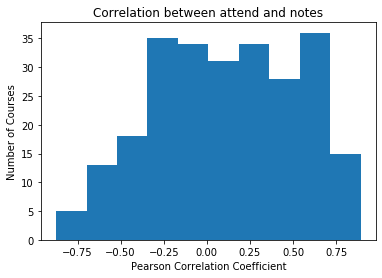

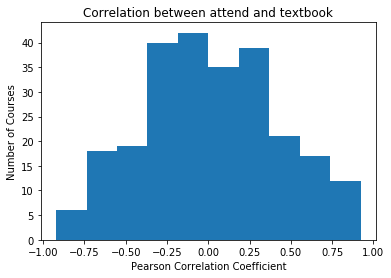

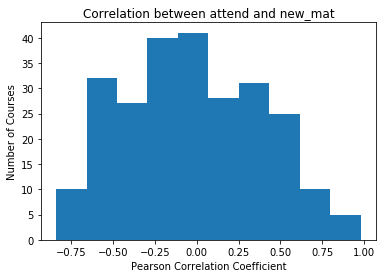

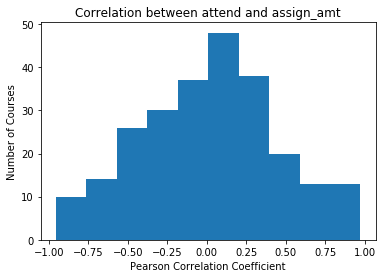

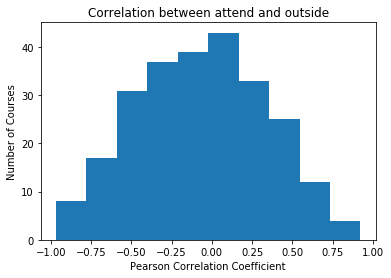

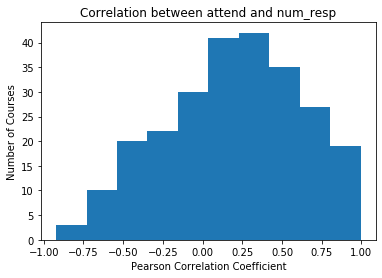

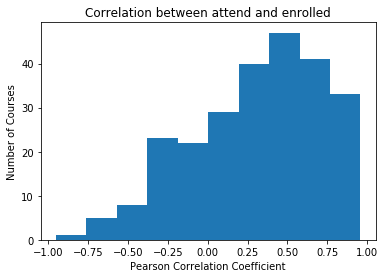

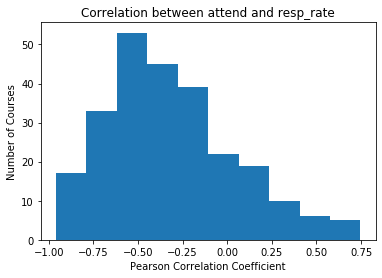

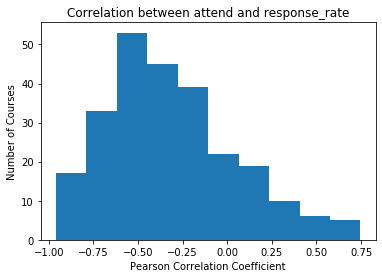

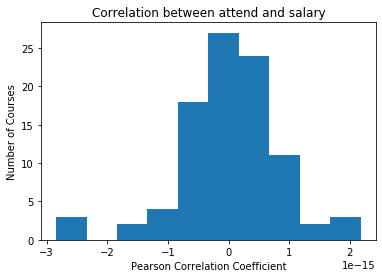

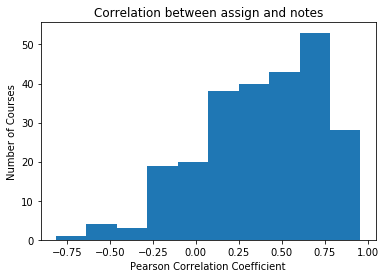

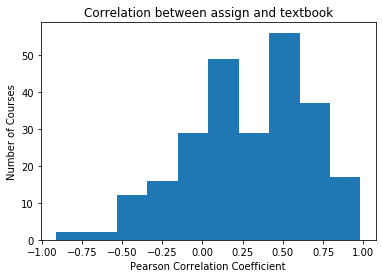

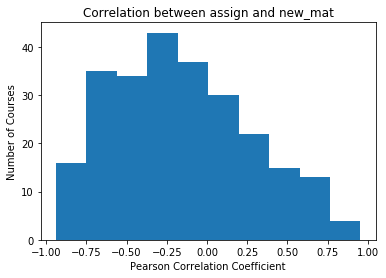

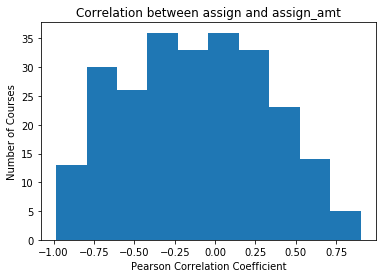

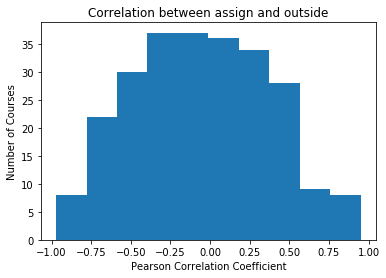

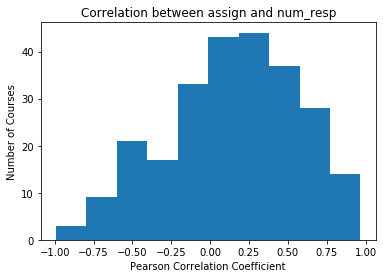

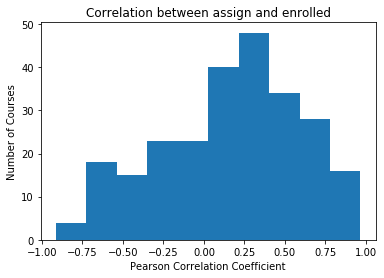

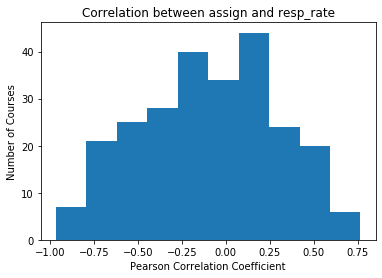

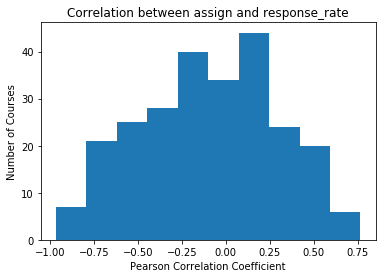

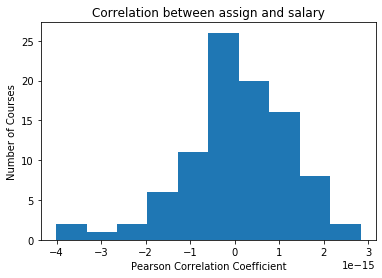

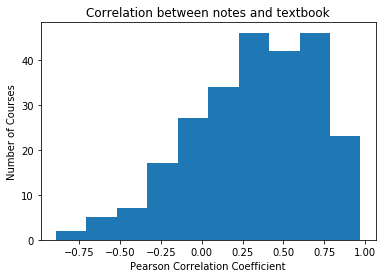

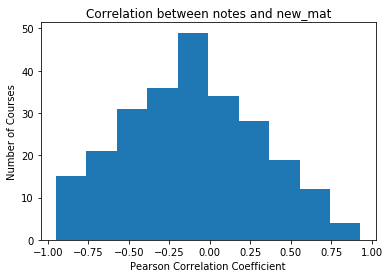

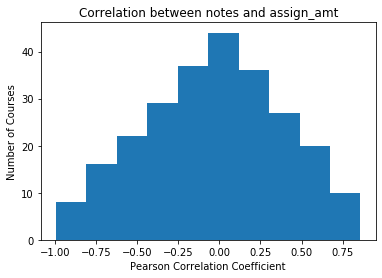

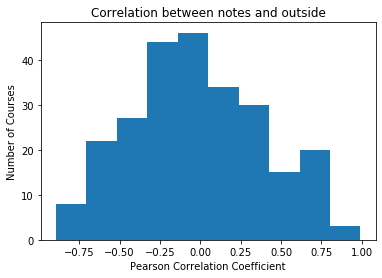

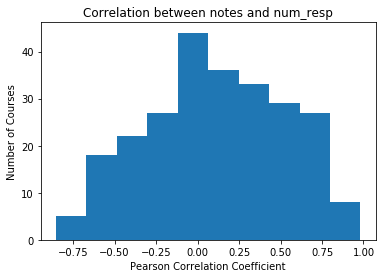

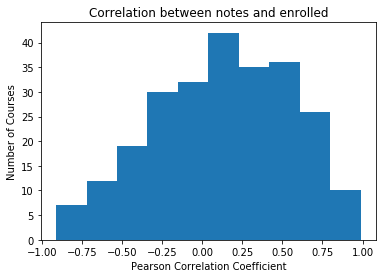

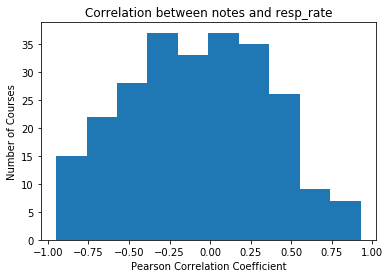

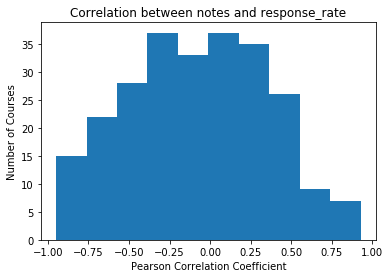

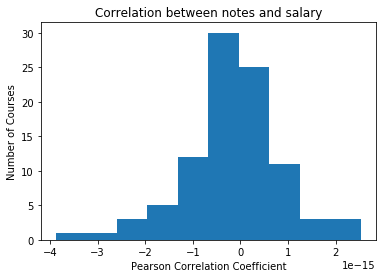

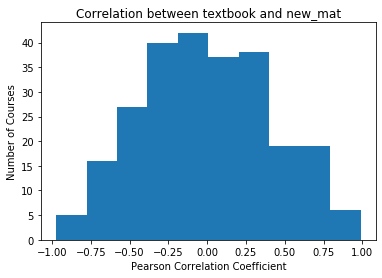

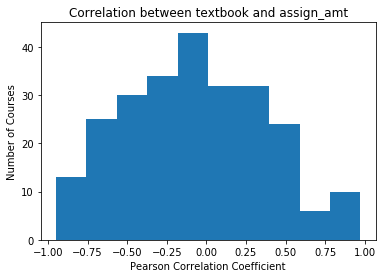

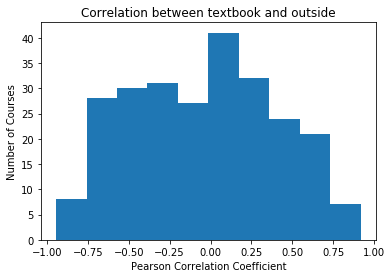

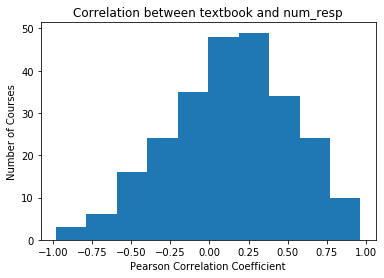

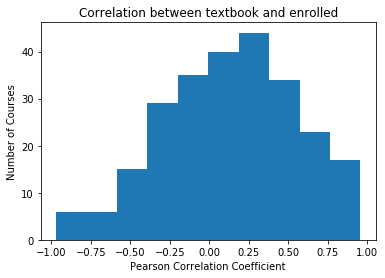

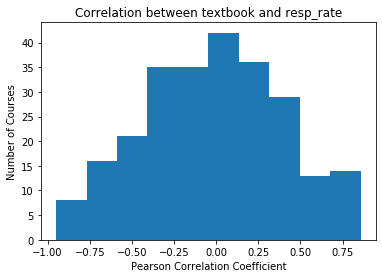

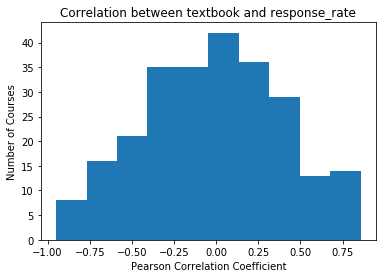

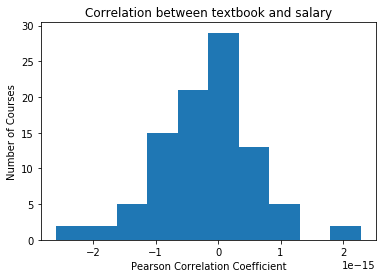

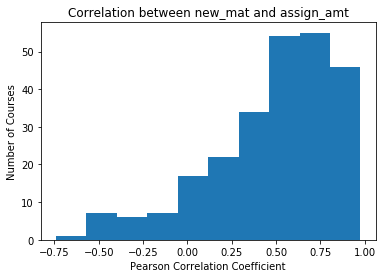

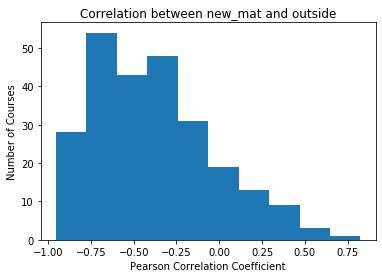

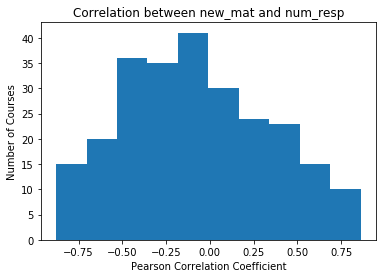

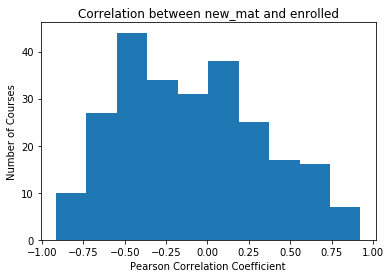

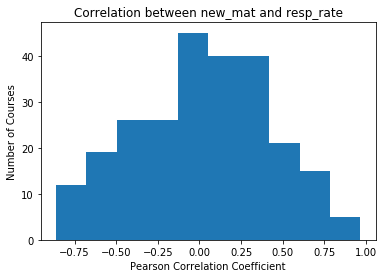

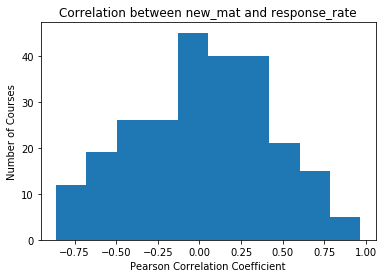

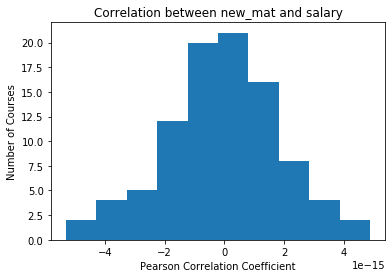

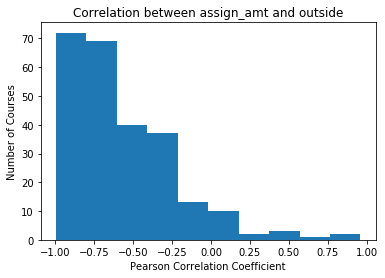

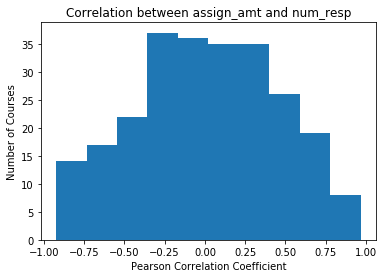

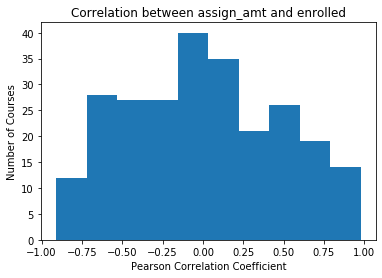

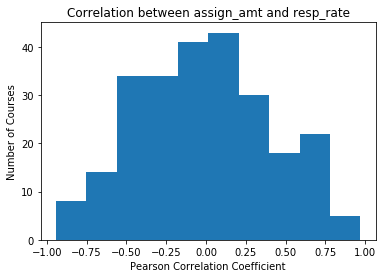

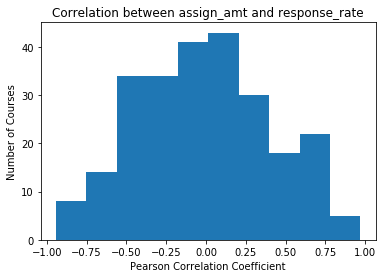

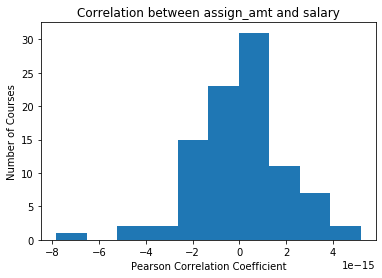

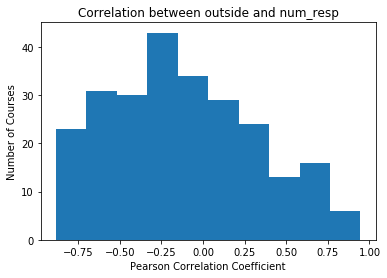

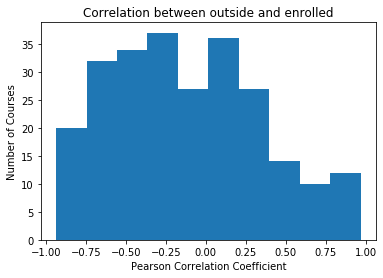

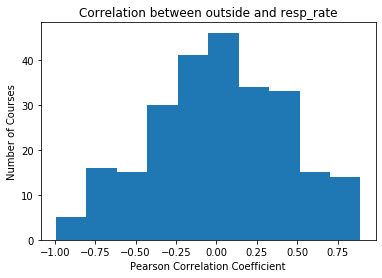

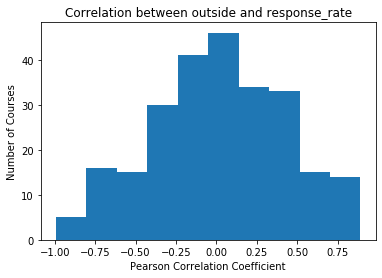

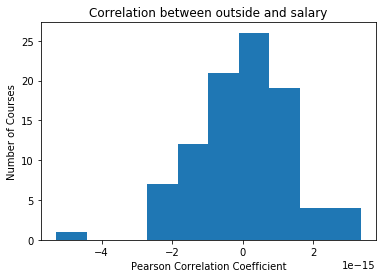

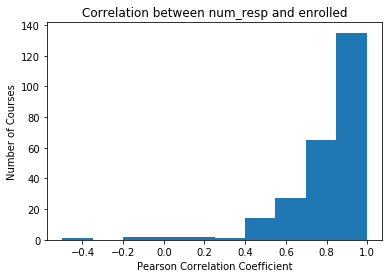

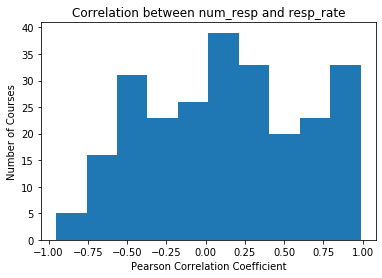

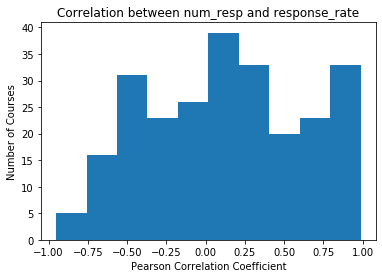

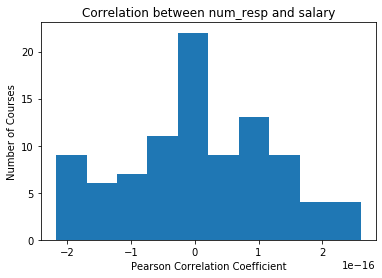

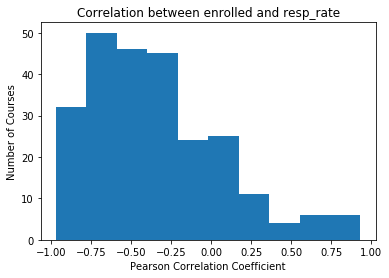

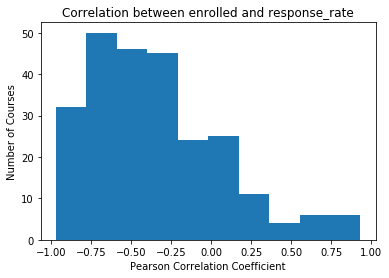

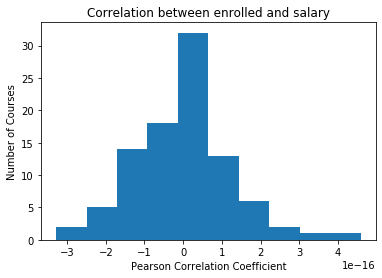

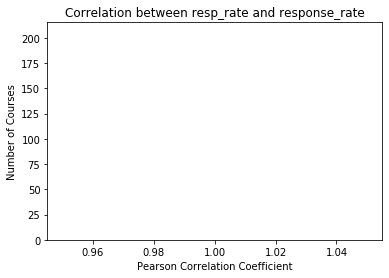

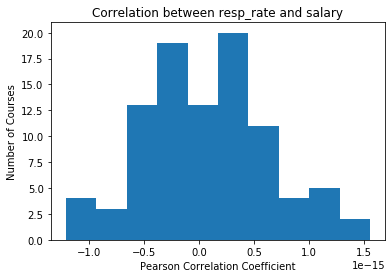

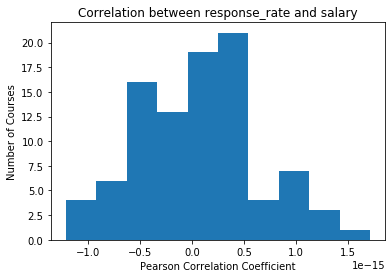

In [32]:
for i in range(len(instructor_corr.columns)):
    for j in range(i+1, len(instructor_corr.columns)):
        col1 = instructor_corr.columns[i]
        col2 = instructor_corr.columns[j]
        corr_ij = instructor_corr.loc[(slice(None), col1), [col2]]
        fig, ax = plt.subplots()
        ax.hist(corr_ij[col2])
        plt.xlabel("Pearson Correlation Coefficient")
        plt.ylabel("Number of Courses")
        plt.title("Correlation between {} and {}".format(instructor_corr.columns[i], instructor_corr.columns[j]))

# How correlated are overall and tenure?

In [33]:
instructors_with_tenure = instructors
# instructors_with_tenure = instructors_with_tenure[pd.notnull(instructors_with_tenure.title)]
instructors_with_tenure['tenure'] = instructors_with_tenure.title.isin(["Professor", "Associate Professor"])
# NOTE: NA title is considered non-tenure (most likely lecturer)
instructors_with_tenure

org  expl_lvl   q_treat    visual      oral  \
instructor                                                              
Adam Kolkiewicz      1.691446  2.429451  1.510890  1.950600  1.885041   
Adam Roegiest        1.862390  2.794451  1.832141  2.112739  1.795893   
Adriel Dean-Hall     2.314286  3.033968  2.013506  2.449048  2.227879   
Ahmad Alrefai        3.056345  3.086275  2.738697  3.266667  3.419231   
Ahmed Ayaz Ataullah  2.038713  2.891438  1.781366  2.207169  2.030823   
...                       ...       ...       ...       ...       ...   
Yongqiang Zhao       2.528832  2.978646  2.319363  2.535603  3.372615   
Yu-Ru Liu            1.197145  2.821639  1.272169  1.321815  1.556988   
Yuying Li            1.960933  2.715861  1.774758  1.957705  2.139680   
Zoran Miskovic       2.091865  2.706079  1.898208  2.355215  2.058806   
shahla Aliakbari     1.989065  2.942147  2.012334  1.970413  2.301955   

                         help  interest   overall    attend    assign  \
instructor                                                              
Adam Kolkiewicz      1.362193  1.635859  1.561237  1.243845  1.470170   
Adam Roegiest        2.033704  1.717994  1.856250  1.278992  1.531858   
Adriel Dean-Hall     2.418803  1.849768  2.234791  1.599206  1.598413   
Ahmad Alrefai        1.827778  1.891059  3.225774  1.857143  1.709017   
Ahmed Ayaz Ataullah  2.069040  2.168041  1.939435  1.687095  1.855265   
...                       ...       ...       ...       ...       ...   
Yongqiang Zhao       2.174633  2.140157  2.782748  2.225922  1.592265   
Yu-Ru Liu            1.496909  1.564590  1.196314  1.261687  1.435371   
Yuying Li            1.909725  1.861169  1.925709  1.316840  1.584824   
Zoran Miskovic       1.589352  1.804885  1.985581  1.394636  1.496159   
shahla Aliakbari     2.044691  2.049112  2.071537  1.591756  1.627996   

                        notes  textbook   new_mat  assign_amt   outside  \
instructor                                                                
Adam Kolkiewicz      1.471251  1.550505  2.583002    2.639731  2.495896   
Adam Roegiest        2.032509  2.391384  2.577641    2.122081  3.652393   
Adriel Dean-Hall     1.792929  2.055556  2.777233    2.349206  3.241270   
Ahmad Alrefai        2.039683  2.236467  2.333333    2.300389  3.327778   
Ahmed Ayaz Ataullah  1.856527  2.356944  2.887103    2.975629  1.891201   
...                       ...       ...       ...         ...       ...   
Yongqiang Zhao       1.582862  1.482985  2.648374    2.868856  2.269937   
Yu-Ru Liu            1.455396  1.691741  2.799067    2.828606  2.443619   
Yuying Li            1.917092  1.988098  2.641970    2.706899  2.633620   
Zoran Miskovic       1.586289  1.700740  2.724773    2.782907  2.409667   
shahla Aliakbari     1.695298  1.759112  2.941342    2.989404  1.954889   

                      num_resp    enrolled  resp_rate  response_rate  \
instructor                                                             
Adam Kolkiewicz      29.000000   72.333333   0.446812       0.446812   
Adam Roegiest        51.750000   90.500000   0.583992       0.583992   
Adriel Dean-Hall     25.000000   69.333333   0.359124       0.359124   
Ahmad Alrefai        32.000000   53.000000   0.558923       0.558923   
Ahmed Ayaz Ataullah  51.000000   98.166667   0.525865       0.525865   
...                        ...         ...        ...            ...   
Yongqiang Zhao       47.500000  105.750000   0.450451       0.450451   
Yu-Ru Liu            36.583333   70.583333   0.621454       0.621454   
Yuying Li            33.769231   69.000000   0.501887       0.501887   
Zoran Miskovic       35.375000   74.375000   0.540629       0.540629   
shahla Aliakbari     34.166667   71.833333   0.472461       0.472461   

                                   title     salary  tenure  
instructor                                                   
Adam Kolkiewicz      Associate Professor  175958.20    True  
Adam Roegiest              

In [34]:
print(instructors_with_tenure["tenure"].sum(), " instructors with tenure")
print(len(instructors_with_tenure), " instructors overall")

149  instructors with tenure
352  instructors overall


[1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25 3.5  3.75]


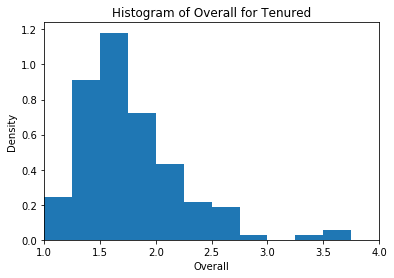

In [35]:
bins = np.arange(1, 4, 0.25)
print(bins)

plt.hist(instructors_with_tenure[instructors_with_tenure['tenure']]['overall'], bins=bins, density=True)
plt.title("Histogram of Overall for Tenured")
plt.xlabel("Overall")
plt.ylabel("Density")
plt.xlim(1, 4)
plt.show()

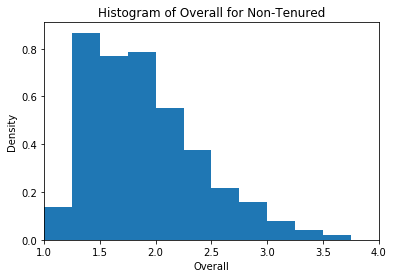

In [36]:
plt.hist(instructors_with_tenure[instructors_with_tenure['tenure'] == False]['overall'], bins=bins, density=True)
plt.title("Histogram of Overall for Non-Tenured")
plt.xlabel("Overall")
plt.ylabel("Density")
plt.xlim(1, 4)
# plt.ylim(0, 2)
plt.show()

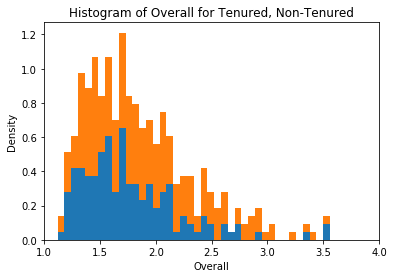

In [37]:
plt.hist([instructors_with_tenure[instructors_with_tenure['tenure']]['overall'],
          instructors_with_tenure[instructors_with_tenure['tenure'] == False]['overall']],
         stacked=True, density=True, bins=40)
plt.title("Histogram of Overall for Tenured, Non-Tenured")
plt.xlabel("Overall")
plt.ylabel("Density")
plt.xlim(1, 4)
# plt.ylim(0, 2)
plt.show()

Seems to have roughly the same distribution

# Fitting a OLS Linear Regression to Instructor Scores

In [38]:
### Predict course overall rating
from sklearn.linear_model import LinearRegression, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# feats=["help","interesting","visual","oral","q_treatment","expl_lvl","assign_helpful"]
feats=list(instructors.select_dtypes('number').columns)
[feats.remove(xx) for xx in ["salary","num_resp","enrolled","overall"]]
nonlinear_feats=["expl_lvl","new_mat","assign_amt"]
X=instructors[feats].copy()
# X[nonlinear_feats]=abs(X[nonlinear_feats]-3)
# X=X.drop(["org","oral","q_treat","visual","interest","help"],axis=1)
x1,x2,y1,y2=train_test_split(X,instructors.overall,random_state=42)
# ss=StandardScaler()
# x1=pd.DataFrame(ss.fit_transform(x1),columns=x1.columns)
# x2=ss.transform(x2)


# x1 = np.array(x1)
x1i = sm.add_constant(x1, prepend=False)
# lr=LinearRegression()
# lr=LassoCV(cv=10)
# lr=RidgeCV(alphas=10.**np.arange(-3,3))
lr=sm.OLS(y1,x1i)
res1=lr.fit()
# lr.fit(x1,y1)
# print(f"train error: {np.mean(np.square(lr.predict(x1)-y1))}")
# print(f"test error:  {np.mean(np.square(lr.predict(x2)-y2))}")

/home/jeffrey/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)
/home/jeffrey/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [39]:
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1193.
Date:                Tue, 03 Dec 2019   Prob (F-statistic):          1.71e-221
Time:                        22:03:59   Log-Likelihood:                 388.26
No. Observations:                 264   AIC:                            -744.5
Df Residuals:                     248   BIC:                            -687.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
org               0.4496      0.034     13.121      0.000       0.382       0.517
expl_lvl          0.0156      0.035      0.450      0.653      -0.053       0.084
q_treat           0.2861      0.029      9.934      0.000       0.229       0.343
visual            0.0530      0.030      1.781      0.076      -0.006       0.112
oral              0.2284      0.023     10.002      0.000       0.183       0.273
help              0.0641      0.019      3.391      0.001       0.027       0.101
interest          0.0716      0.031      2.309      0.022       0.011       0.133
attend            0.0636      0.025      2.575      0.011       0.015       0.112
assign            0.0138      0.033      0.418      0.676      -0.051       0.079
notes            -0.0120      0.029     -0.413      0.680      -0.069       0.045
textbook         -0.0143      0.019     -0.741      0.459      -0.052       0.024
new_mat          -0.0860      0.036     -2.409      0.017      -0.156      -0.016
assign_amt        0.0449      0.035      1.270      0.205      -0.025       0.115
outside           0.0304      0.019      1.585      0.114      -0.007       0.068
resp_rate         0.0312      0.022      1.448      0.149      -0.011       0.074
response_rate     0.0312      0.022      1.448      0.149      -0.011       0.074
const            -0.3971      0.173     -2.299      0.022      -0.737      -0.057
==============================================================================
Omnibus:                        9.319   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               13.250
Skew:                          -0.242   Prob(JB):                      0.00133
Kurtosis:                       3.985   Cond. No.                     4.94e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.84e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Are there instructors with high overall but low oral/organization/q_treat?

In [40]:
instructors['oral_overall_diff'] = abs(instructors.oral - instructors.overall)
instructors.sort_values('oral_overall_diff', ascending=False).head(10)

org  expl_lvl   q_treat    visual      oral      help  \
instructor                                                                      
Jun Cai            1.860965  2.800261  2.370089  2.038479  2.743495  2.159251   
Yongqiang Zhao     2.528832  2.978646  2.319363  2.535603  3.372615  2.174633   
Keiko Katsuragawa  2.591005  3.232424  2.365152  2.349733  3.358622  2.047840   
Chengguo Weng      2.073316  2.701836  1.785745  2.021977  2.561130  1.524867   
Wentang Kuo        1.896738  2.733411  1.608030  2.027229  2.349703  1.649656   
Dan Berry          1.842453  3.039489  1.521467  1.845659  2.157320  1.407244   
Eugene Zima        2.728750  2.915534  2.279769  2.860737  3.123398  1.957815   
Stefanie Roos      2.128788  2.858225  1.825909  2.409091  2.545615  1.607143   
Alexey Popov       1.536845  2.804986  1.478505  1.660487  1.860651  1.718454   
Kai Cheong Chan    2.260906  2.663170  1.729019  2.193680  2.560869  1.649140   

                   interest   overall    attend    assign     notes  textbook  \
instructor                                                                      
Jun Cai            1.942349  2.115228  1.242098  1.448077  1.497500  1.942544   
Yongqiang Zhao     2.140157  2.782748  2.225922  1.592265  1.582862  1.482985   
Keiko Katsuragawa  2.058084  2.825195  1.878968  1.747368  1.801016  2.102941   
Chengguo Weng      1.920839  2.048792  1.250717  1.615968  1.580288  1.831698   
Wentang Kuo        1.827895  1.838225  1.341877  1.573442  1.761180  1.780370   
Dan Berry          1.922897  1.725005  1.727108  1.760429  1.666584  1.687500   
Eugene Zima        1.853714  2.716349  2.221061  1.700708  1.681126  1.889560   
Stefanie Roos      1.726190  2.142857  1.699439  1.686966  1.640523  2.455556   
Alexey Popov       1.954701  1.491799  1.187780  1.612378  1.775871  1.750866   
Kai Cheong Chan    2.063889  2.192222  1.496487  1.681428  1.741019  1.755279   

                    new_mat  assign_amt   outside   num_resp    enrolled  \
instructor                                                                 
Jun Cai            2.822488    2.960028  2.041861  44.666667   80.400000   
Yongqiang Zhao     2.648374    2.868856  2.269937  47.500000  105.750000   
Keiko Katsuragawa  2.787512    2.635536  2.806009  43.333333   83.666667   
Chengguo Weng      2.551875    2.878312  2.233425  43.333333   64.250000   
Wentang Kuo        2.783810    2.898716  2.430585  41.181818   66.181818   
Dan Berry          2.983212    2.944371  2.033522  19.625000   35.375000   
Eugene Zima        2.641369    2.376867  3.282782  26.200000   71.600000   
Stefanie Roos      2.583028    2.501467  2.685592  27.000000   65.333333   
Alexey Popov       2.586397    2.736216  2.380103  35.333333  102.666667   
Kai Cheong Chan    2.435253    2.650586  2.430222  47.833333  107.166667   

                   resp_rate  response_rate                title     salary  \
instructor                                                                    
Jun Cai             0.554537       0.554537            Professor  161277.18   
Yongqiang Zhao      0.450451       0.450451                  NaN        NaN   
Keiko Katsuragawa   0.498470       0.498470                  NaN        NaN   
Chengguo Weng       0.735841       0.735841  Associate Professor  140255.20   
Wentang Kuo         0.663094       0.663094  Associate Professor  138421.36   
Dan Berry           0.615903       0.615903            Professor  211431.60   
Eugene Zima         0.355349       0.355349                  NaN        NaN   
Stefanie Roos       0.414975       0.414975                  NaN        NaN   
Alexey Popov        0.350134       0.350134                  NaN        NaN   
Kai Cheong Chan     0.451461       0.451461                  NaN        NaN   

                   tenure  oral_overall_diff  
instructor                                    
Jun Cai              True           0.628267  
Yongqiang Zhao      False           0.589867  
Keiko Katsuragawa   False   

In [41]:
instructors.loc[instructors.overall <= 2].sort_values("oral", ascending=False)

org  expl_lvl   q_treat    visual      oral  \
instructor                                                                 
Wentang Kuo             1.896738  2.733411  1.608030  2.027229  2.349703   
Bin Ma                  2.089297  2.678866  1.715021  2.117367  2.252515   
Reaz Ahmed              1.801473  2.928545  1.653837  1.894143  2.202090   
Ale Vicente Colmenares  1.919531  3.023718  1.831530  2.104894  2.180571   
Dan Berry               1.842453  3.039489  1.521467  1.845659  2.157320   
...                          ...       ...       ...       ...       ...   
Ian Goldberg            1.289732  2.861212  1.280382  1.553255  1.184197   
Serge D'Alessio         1.193128  2.737205  1.270564  1.358905  1.176648   
Dan Wolczuk             1.207637  2.729387  1.249949  1.337045  1.166642   
Ryan Trelford           1.159747  2.765813  1.181136  1.217932  1.154595   
Mike Eden               1.188465  2.893684  1.390644  1.312118  1.117061   

                            help  interest   overall    attend    assign  \
instructor                                                                 
Wentang Kuo             1.649656  1.827895  1.838225  1.341877  1.573442   
Bin Ma                  1.694139  1.600534  1.942192  1.489364  1.570750   
Reaz Ahmed              1.911013  1.623119  1.885998  1.381061  1.383654   
Ale Vicente Colmenares  1.774505  2.082773  1.989437  1.797502  1.634650   
Dan Berry               1.407244  1.922897  1.725005  1.727108  1.760429   
...                          ...       ...       ...       ...       ...   
Ian Goldberg            1.720713  1.442928  1.197750  1.288312  1.568630   
Serge D'Alessio         1.573970  1.715995  1.207769  1.222357  1.813433   
Dan Wolczuk             1.463594  1.717613  1.212337  1.273049  1.528371   
Ryan Trelford           1.256128  1.555816  1.142239  1.237763  1.508855   
Mike Eden               1.445196  1.584819  1.119274  1.146512  1.749026   

                           notes  textbook   new_mat  assign_amt   outside  \
instructor                                                                   
Wentang Kuo             1.761180  1.780370  2.783810    2.898716  2.430585   
Bin Ma                  1.501988  1.786436  2.756701    2.669234  2.681627   
Reaz Ahmed              1.525768  2.279412  2.865318    2.347169  3.401960   
Ale Vicente Colmenares  1.680080  1.478540  2.635256    2.769733  2.296371   
Dan Berry               1.666584  1.687500  2.983212    2.944371  2.033522   
...                          ...       ...       ...         ...       ...   
Ian Goldberg            1.550573  2.028366  2.689423    2.631288  2.799973   
Serge D'Alessio         1.693712  1.943517  2.847955    2.896614  2.204775   
Dan Wolczuk             1.417843  1.493876  2.594489    2.839023  2.299368   
Ryan Trelford           1.406723  1.679158  2.400236    2.601578  2.779316   
Mike Eden               1.559806  1.863190  2.789561    2.749924  2.386004   

                          num_resp    enrolled  resp_rate  response_rate  \
instructor                                                                 
Wentang Kuo              41.181818   66.181818   0.663094       0.663094   
Bin Ma                   27.142857   63.571429   0.484697       0.484697   
Reaz Ahmed               44.500000   89.750000   0.471901       0.471901   
Ale Vicente Colmenares   28.750000   83.000000   0.334581       0.334581   
Dan Berry                19.625000   35.375000   0.615903       0.615903   
...                            ...         ...        ...            ...   
Ian Goldberg             37.333333   58.500000   0.671585       0.671585   
Serge D'Alessio          98.666667  142.333333   0.720621       0.720621   
Dan Wolczuk              80.040000  125.720000   0.628943       0.628943   
Ryan Trelford            43.000000   57.333333   0.749869       0.749869   
Mike Eden               100.250000  119.750000   0.829380       0.829380   

                                      title    

In [42]:
instructors['org_overall_diff'] = abs(instructors.org - instructors.overall)
instructors.sort_values('org_overall_diff', ascending=False).head(10)

org  expl_lvl   q_treat    visual      oral  \
instructor                                                             
Richard Mann        2.679620  2.784444  1.738997  2.390420  2.316940   
Jack Robinson       2.059207  2.872961  1.588248  2.264318  1.927585   
Edward Chan         3.178010  3.364158  3.338336  3.383198  3.674685   
Huma Kamal          2.508142  3.131927  1.837662  2.646495  2.091081   
Cheng Zhang         2.601201  2.917073  2.678139  2.758076  3.123524   
Bojana Bislimovska  2.717631  3.113444  3.064407  2.941794  3.147810   
Maite Dupuis        2.720009  3.046810  2.508512  2.900577  3.295538   
Herb Tang           2.191670  2.838046  2.300371  2.271236  2.592834   
Marek Stastna       1.843685  2.860557  1.337992  2.131815  1.694444   
Gladimir Baranoski  1.919710  2.574942  1.514825  2.244940  1.743666   

                        help  interest   overall    attend    assign  \
instructor                                                             
Richard Mann        1.591825  1.653102  2.213457  1.557426  1.702646   
Jack Robinson       1.530853  1.933194  1.617078  1.112824  1.390256   
Edward Chan         3.584168  2.503185  3.528951  2.153415  1.964959   
Huma Kamal          1.709967  1.931614  2.158130  1.542836  1.674269   
Cheng Zhang         2.250183  1.915889  2.924575  1.790699  1.575762   
Bojana Bislimovska  2.795139  2.203290  3.015788  1.844338  1.688449   
Maite Dupuis        2.162509  2.428844  3.017096  1.792850  1.873870   
Herb Tang           2.019689  2.215559  2.482397  1.493864  1.630506   
Marek Stastna       1.669473  1.628108  1.565045  1.171843  1.693409   
Gladimir Baranoski  1.735368  1.251031  1.650056  1.100677  1.375771   

                       notes  textbook   new_mat  assign_amt   outside  \
instructor                                                               
Richard Mann        1.946952  1.845584  2.925238    3.135359  1.973782   
Jack Robinson       1.500660  1.388381  2.818028    2.567617  2.494266   
Edward Chan         2.169561  2.541667  3.167059    3.124004  1.989216   
Huma Kamal          1.997666  1.733333  2.812427    2.648977  2.488596   
Cheng Zhang         2.218045  2.222222  2.726984    2.335749  3.353307   
Bojana Bislimovska  2.130502  2.181082  2.950843    3.054340  1.946065   
Maite Dupuis        1.813554  1.735922  2.884455    2.912121  2.305877   
Herb Tang           1.886508  1.976961  2.592044    2.720500  2.557978   
Marek Stastna       1.847619  1.722658  2.866632    2.899586  2.379509   
Gladimir Baranoski  1.928324  1.808642  2.363010    2.246925  4.204576   

                     num_resp    enrolled  resp_rate  response_rate  \
instructor                                                            
Richard Mann        29.400000   50.000000   0.608214       0.608214   
Jack Robinson       59.833333  105.166667   0.561511       0.561511   
Edward Chan         29.222222   67.666667   0.437235       0.437235   
Huma Kamal          24.333333   65.666667   0.368386       0.368386   
Cheng Zhang         40.666667   85.000000   0.483709       0.483709   
Bojana Bislimovska  58.500000  115.000000   0.509870       0.509870   
Maite Dupuis        54.333333  110.666667   0.447665       0.447665   
Herb Tang           29.500000   91.250000   0.351901       0.351901   
Marek Stastna       25.666667   30.666667   0.826190       0.826190   
Gladimir Baranoski  22.000000   42.777778   0.523264       0.523264   

                                  title     salary  tenure  oral_overall_diff  \
instructor                                                                      
Richard Mann        Associate Professor  174827.52    True           0.103482   
Jack Robinson                       NaN        NaN   False           0.310508   
Edward Chan         Associate Professor  106852.60    True           0.145734   
Huma Kamal                          NaN        NaN   False           0.067050   
Cheng Zhang                         NaN        NaN   False         

In [43]:
instructors['q_treat_overall_diff'] = abs(instructors.q_treat - instructors.overall)
instructors.sort_values('q_treat_overall_diff', ascending=False).head(10)

org  expl_lvl   q_treat    visual      oral      help  \
instructor                                                                      
David Toman        3.568939  2.942616  2.798706  3.339353  3.787306  2.912378   
Henry Wolkowicz    2.957951  2.575073  2.006685  3.003592  2.576197  2.034366   
Marius Hofert      2.316872  2.255131  1.587386  2.593388  2.214440  1.842193   
Iakov Nekrich      3.402525  2.623310  2.952174  3.167540  3.802020  2.379630   
Daniela Maftuleac  3.370017  2.917910  2.747960  3.251545  3.484428  2.300345   
Maite Dupuis       2.720009  3.046810  2.508512  2.900577  3.295538  2.162509   
Ming Li            2.518820  2.974825  1.964411  2.347626  2.773601  1.708333   
Jonathan Buss      3.369061  2.775801  2.831158  3.032351  3.346061  2.705758   
Joseph Emerson     2.703098  2.858809  2.008487  2.518758  2.310060  2.463004   
Ahmad Alrefai      3.056345  3.086275  2.738697  3.266667  3.419231  1.827778   

                   interest   overall    attend    assign     notes  textbook  \
instructor                                                                      
David Toman        2.353946  3.515953  2.441121  1.995574  2.173448  2.158163   
Henry Wolkowicz    1.973818  2.707123  1.415892  1.903077  1.729852  1.924964   
Marius Hofert      1.905468  2.272258  1.485900  1.634862  1.924027  1.928416   
Iakov Nekrich      1.869484  3.560606  2.229108  1.779293  1.728291  2.082011   
Daniela Maftuleac  2.351258  3.326026  1.751051  1.932467  1.981012  2.336911   
Maite Dupuis       2.428844  3.017096  1.792850  1.873870  1.813554  1.735922   
Ming Li            1.575059  2.459064  1.700084  1.438221  1.655754  1.557143   
Jonathan Buss      2.361340  3.323612  2.334630  1.727223  1.759150  2.288791   
Joseph Emerson     1.898777  2.500230  1.546579  1.792973  1.903947  1.574630   
Ahmad Alrefai      1.891059  3.225774  1.857143  1.709017  2.039683  2.236467   

                    new_mat  assign_amt   outside   num_resp    enrolled  \
instructor                                                                 
David Toman        2.881445    2.998889  2.158207  27.142857   80.428571   
Henry Wolkowicz    2.685439    2.626313  2.730398  20.666667   57.000000   
Marius Hofert      2.225768    2.917764  2.443721  38.777778   75.777778   
Iakov Nekrich      2.741475    2.764379  2.638422  26.333333   66.333333   
Daniela Maftuleac  2.592987    2.725540  2.617861  40.333333   92.111111   
Maite Dupuis       2.884455    2.912121  2.305877  54.333333  110.666667   
Ming Li            3.002570    2.803828  2.984760  26.333333   62.000000   
Jonathan Buss      2.720516    2.857278  2.293918  26.583333   67.416667   
Joseph Emerson     2.822511    3.120789  2.206147  36.000000   80.600000   
Ahmad Alrefai      2.333333    2.300389  3.327778  32.000000   53.000000   

                   resp_rate  response_rate                title     salary  \
instructor                                                                    
David Toman         0.339855       0.339855            Professor  178001.88   
Henry Wolkowicz     0.479153       0.479153            Professor  192536.76   
Marius Hofert       0.596863       0.596863  Assistant Professor  130033.40   
Iakov Nekrich       0.406560       0.406560                  NaN        NaN   
Daniela Maftuleac   0.434513       0.434513                  NaN        NaN   
Maite Dupuis        0.447665       0.447665                  NaN        NaN   
Ming Li             0.458600       0.458600            Professor  230360.04   
Jonathan Buss       0.412242       0.412242  Associate Professor  170870.16   
Joseph Emerson      0.563124       0.563124  Associate Professor  175578.18   
Ahmad Alrefai       0.558923       0.558923                  NaN        NaN   

                   tenure  oral_overall_diff  org_overall_diff  \
instructor                                                       
David Toman          True           0.271353          0.052986   
Henry Wolkowicz   